# Midterm Deliverable: EPA - GHG Emissions


**Due Date:** 2-9-2025

**Group Members**
* Migus Wong
* Michael Yoo
* David Van Dyke
* Ethan Norton

**Chosen Dataset :** [EPA - GHG Emissions](https://www.epa.gov/ghgreporting/data-sets)

## Table of Contents

>[Midterm Deliverable: EPA - GHG Emissions](#scrollTo=GuDBR3_ZR0P7)

>>[Table of Contents](#scrollTo=KVOpEm8dYT9o)

>>[Data Loading and Imports](#scrollTo=IavVxfAuYqLz)

>>[Null Analysis](#scrollTo=B-aYW5wwV_-I)

>>[EDA](#scrollTo=veOK4LeAbBWm)

>>[State Analysis](#scrollTo=eXXTkqVKLRfx)

>>[Outlier Detection](#scrollTo=jFcq7-JbLv2J)

>>[Top 20 by State](#scrollTo=s_yZw9THSl3_)

>>[Monitoring Status](#scrollTo=pSfoUcneUt4h)

>>[Random Forest Modeling](#scrollTo=5thjdjioNmJ0)




# Importing drive

In [7]:
#Code to link colab notebook to google drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
!mkdir -p "/content/drive/MyDrive/ColabFiles"
!pip install nbconvert

Mounted at /content/drive


In [8]:
import pandas as pd
!pip install openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Imports

In [ ]:
import pandas as pd
import glob
from tqdm import tqdm  # For progress bar

# Create an empty list to store dataframes
dfs = []

# Years we're working with
years = range(2010, 2024)

# Read each file
for year in tqdm(years, desc="Reading files"):
    file_path = f'/content/drive/MyDrive/MSDS422 - Group 1/Final Project/Data/ghgp_data_{year}.xlsx'

    # Read the file
    temp_df = pd.read_excel(file_path, skiprows=3)

    # Add year column
    temp_df['Year'] = year

    # Append to list
    dfs.append(temp_df)

# Merge all dataframes
merged_df = pd.concat(dfs, ignore_index=True)

# Print info about the merged dataset
print("\nMerged Dataset Info:")
print(f"Total rows: {len(merged_df)}")
print(f"Total unique facilities: {merged_df['Facility Id'].nunique()}")
print("\nRows per year:")
print(merged_df['Year'].value_counts().sort_index())

# Check for any missing Facility IDs
print(f"\nMissing Facility IDs: {merged_df['Facility Id'].isnull().sum()}")

# Basic statistics over time
yearly_stats = merged_df.groupby('Year').agg({
    'Facility Id': 'count',
    'Total reported direct emissions': ['mean', 'sum']
}).round(2)

print("\nYearly Statistics:")
print(yearly_stats)

# Optional: Save merged dataset
# merged_df.to_csv('merged_emissions_2010_2023.csv', index=False)

# Create a plot showing number of facilities over time
plt.figure(figsize=(12, 6))
merged_df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Facilities Reporting by Year')
plt.xlabel('Year')
plt.ylabel('Number of Facilities')
plt.grid(True)
plt.show()

# Create a plot showing average emissions over time
plt.figure(figsize=(12, 6))
yearly_avg = merged_df.groupby('Year')['Total reported direct emissions'].mean()
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.grid(True)
plt.show()

Reading files:  14%|█▍        | 2/14 [00:17<01:44,  8.68s/it]

In [5]:
# Examine the merged dataset
print("Column names in the merged DataFrame:")
for col in merged_df.columns:
    print(f"- {col}")

# Display the first few rows of data with selected important columns
important_cols = ['Facility Id', 'Facility Name', 'State', 'Year',
                 'Total reported direct emissions', 'Industry Type (sectors)']
print("\nFirst few rows of data (selected columns):")
print(merged_df[important_cols].head())

# Display basic information about the dataset
print("\nDataset Info:")
print(merged_df.info())

# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(merged_df.describe())

# Show number of facilities per year
print("\nNumber of facilities per year:")
year_counts = merged_df.groupby('Year')['Facility Id'].count()
print(year_counts)

# Show number of unique facilities
print(f"\nTotal unique facilities across all years: {merged_df['Facility Id'].nunique()}")

# Check for missing values
print("\nMissing values in each column:")
missing_values = merged_df.isnull().sum()
missing_percentages = (missing_values / len(merged_df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentages
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Column names in the merged DataFrame:
- Facility Id
- FRS Id
- Facility Name
- City
- State
- Zip Code
- Address
- County
- Latitude
- Longitude
- Primary NAICS Code
- Industry Type (subparts)
- Industry Type (sectors)
- Total reported direct emissions
- CO2 emissions (non-biogenic) 
- Methane (CH4) emissions 
- Nitrous Oxide (N2O) emissions 
- HFC emissions
- PFC emissions
- SF6 emissions 
- NF3 emissions
- Other Fully Fluorinated GHG emissions
- HFE emissions
- Very Short-lived Compounds emissions
- Other GHGs (metric tons CO2e)
- Biogenic CO2 emissions (metric tons)
- Stationary Combustion
- Electricity Generation
- Adipic Acid Production
- Aluminum Production
- Ammonia Manufacturing
- Cement Production
- Ferroalloy Production
- Glass Production
- HCFC–22 Production from HFC–23 Destruction
- Hydrogen Production
- Iron and Steel Production
- Lead Production
- Lime Production
- Miscellaneous Use of Carbonates
- Nitric Acid Production
- Petrochemical Production
- Petroleum Refining
- P

# Null Analysis


Null Analysis (sorted by most nulls to least):
                                                    Null Count Null Percentage
Silicon Carbide Production                               94364          99.99%
Adipic Acid Production                                   94342          99.96%
Soda Ash Manufacturing                                   94323          99.94%
HCFC–22 Production from HFC–23 Destruction               94314          99.93%
Petroleum and Natural Gas Systems – LNG Storage          94310          99.93%
...                                                        ...             ...
Is some CO2 reported as emissions from the affe...           0            0.0%
Is some CO2 collected on-site and used to manuf...           0            0.0%
Industry Type (sectors)                                      0            0.0%
Total reported direct emissions                              0            0.0%
Facility Id                                                  0            0.0%

[67

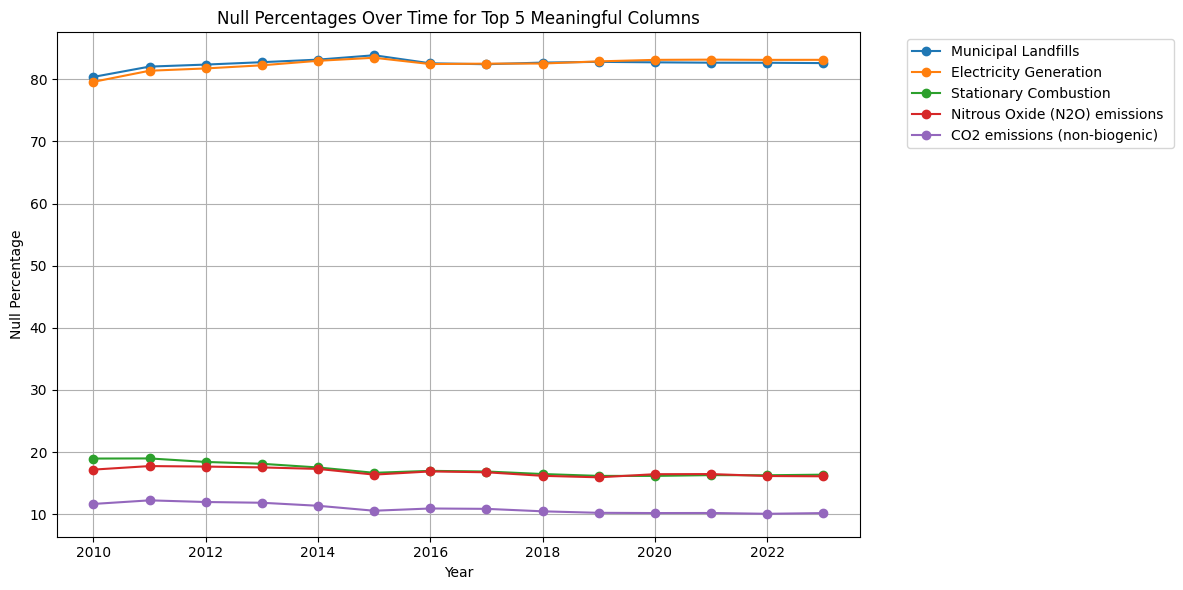


Columns with Complete Data (no nulls):
- Zip Code
- State
- Facility Name
- City
- Year
- Latitude
- Longitude
- Industry Type (subparts)
- Does the facility employ continuous emissions monitoring? 
- Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?
- Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)
- Industry Type (sectors)
- Total reported direct emissions
- Facility Id


In [6]:
# Create a DataFrame with null counts and percentages
null_analysis = pd.DataFrame({
    'Null Count': merged_df.isnull().sum(),
    'Null Percentage': (merged_df.isnull().sum() / len(merged_df) * 100).round(2)
})

# Sort by null count in descending order
null_analysis = null_analysis.sort_values('Null Count', ascending=False)

# Add % symbol to percentage column
null_analysis['Null Percentage'] = null_analysis['Null Percentage'].apply(lambda x: f"{x}%")

# Print overall null analysis
print("\nNull Analysis (sorted by most nulls to least):")
print(null_analysis)

# Get columns with less than 90% nulls (more meaningful for analysis)
meaningful_columns = null_analysis[
    null_analysis['Null Count'] / len(merged_df) < 0.9
].index.tolist()[:5]

print("\nDetailed Analysis for Top 5 Columns with Meaningful Data (less than 90% nulls):")
for column in meaningful_columns:
    print(f"\n{column}")
    print("-" * 50)

    # Calculate nulls by year
    yearly_stats = merged_df.groupby('Year').agg({
        column: lambda x: x.isna().sum()
    }).rename(columns={column: 'Null Count'})

    # Calculate total records per year
    yearly_total = merged_df.groupby('Year').size()

    # Calculate percentages
    yearly_stats['Total Records'] = yearly_total
    yearly_stats['Null Percentage'] = (yearly_stats['Null Count'] / yearly_stats['Total Records'] * 100).round(2)

    print(yearly_stats)

# Visualize null percentages over time for meaningful columns
plt.figure(figsize=(12, 6))
for column in meaningful_columns:
    yearly_nulls = merged_df.groupby('Year').agg({
        column: lambda x: x.isna().sum()
    })
    yearly_total = merged_df.groupby('Year').size()
    yearly_percentages = (yearly_nulls[column] / yearly_total * 100)

    plt.plot(yearly_percentages.index, yearly_percentages.values, marker='o', label=column)

plt.title('Null Percentages Over Time for Top 5 Meaningful Columns')
plt.xlabel('Year')
plt.ylabel('Null Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary of columns with complete data
complete_columns = null_analysis[null_analysis['Null Count'] == 0].index.tolist()
print("\nColumns with Complete Data (no nulls):")
for col in complete_columns:
    print(f"- {col}")

In [7]:
# Get columns to drop (>70% nulls)
columns_to_drop = null_analysis[
    null_analysis['Null Count'] / len(merged_df) > 0.7
].index.tolist()

# Drop the columns
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)

print("\nColumns dropped:", columns_to_drop)
print("\nAfter dropping columns - Shape:", merged_df_cleaned.shape)

# Show updated null analysis
null_analysis_after = pd.DataFrame({
    'Null Count': merged_df_cleaned.isnull().sum(),
    'Null Percentage': (merged_df_cleaned.isnull().sum() / len(merged_df_cleaned) * 100).round(2)
})
null_analysis_after = null_analysis_after.sort_values('Null Count', ascending=False)
null_analysis_after['Null Percentage'] = null_analysis_after['Null Percentage'].apply(lambda x: f"{x}%")

print("\nUpdated Null Analysis:")
print(null_analysis_after)

# Print summary of remaining columns
print("\nRemaining columns with highest null percentages (top 10):")
print(null_analysis_after.head(10))

print("\nNumber of columns:")
print(f"Original: {len(merged_df.columns)}")
print(f"After dropping: {len(merged_df_cleaned.columns)}")
print(f"Columns removed: {len(columns_to_drop)}")

# Optional: Save cleaned dataset
# merged_df_cleaned.to_csv('cleaned_emissions_2010_2023.csv', index=False)


Columns dropped: ['Silicon Carbide Production', 'Adipic Acid Production', 'Soda Ash Manufacturing', 'HCFC–22 Production from HFC–23 Destruction', 'Petroleum and Natural Gas Systems – LNG Storage', 'Manufacture of Electric Transmission and Distribution Equipment', 'Zinc Production', 'Titanium Dioxide Production', 'Other GHGs (metric tons CO2e)', 'Petroleum and Natural Gas Systems – LNG Import/Export', 'Aluminum Production', 'Magnesium Production', 'Ferroalloy Production', 'Miscellaneous Use of Carbonates', 'Phosphoric Acid Production', 'Lead Production', 'Fluorinated GHG Production', 'HFE emissions', 'Very Short-lived Compounds emissions', 'Ammonia Manufacturing', 'Nitric Acid Production', 'Petroleum and Natural Gas Systems – Underground Storage', 'NF3 emissions', 'Other Fully Fluorinated GHG emissions', 'Electronics Manufacture', 'SF6 emissions ', 'HFC emissions', 'PFC emissions', 'Petrochemical Production', 'Lime Production', 'Underground Coal Mines', 'Cement Production', 'Glass Prod

# EDA

In [8]:
# Print all column names
print("Available columns in cleaned DataFrame:")
for col in merged_df_cleaned.columns:
    print(f"'{col}'")

# Check for trailing/leading spaces
print("\nColumn names with whitespace visible:")
for col in merged_df_cleaned.columns:
    print(f"Length: {len(col)}, Name: '{col}'")

# Create state mapping
state_mapping = {state: i+1 for i, state in enumerate(sorted(merged_df_cleaned['State'].unique()))}

# Create copy of cleaned dataframe
df_encoded = merged_df_cleaned.copy()

# Encode states
df_encoded['State'] = df_encoded['State'].map(state_mapping)

# Print state mapping
print("\nState Mapping:")
for state, number in sorted(state_mapping.items(), key=lambda x: x[1]):
    print(f"{state}: {number}")

# Find Y/N columns in the cleaned dataset
yn_columns = []
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  # Check if column is string type
        unique_vals = df_encoded[col].unique()
        if set(unique_vals) - {None, np.nan} == {'Y', 'N'}:  # Check if only Y/N values
            yn_columns.append(col)

print("\nY/N Columns found:")
for col in yn_columns:
    print(f"'{col}'")

# Encode Y/N columns
for col in yn_columns:
    df_encoded[col] = df_encoded[col].map({'Y': 1, 'N': 0})

# Print sample of encoded data
print("\nSample of encoded data:")
sample_cols = ['State'] + yn_columns[:2]  # State and first two Y/N columns
print(df_encoded[sample_cols].head())

# Print summary of encoding
print("\nEncoding Summary:")
print(f"Total columns: {len(df_encoded.columns)}")
print(f"States encoded: {len(state_mapping)}")
print(f"Y/N columns encoded: {len(yn_columns)}")

# Optional: verify encoding
print("\nVerification of encoding:")
print("State values:", sorted(df_encoded['State'].unique()))
if yn_columns:
    print("Y/N column values:", sorted(df_encoded[yn_columns[0]].unique()))

Available columns in cleaned DataFrame:
'Facility Id'
'FRS Id'
'Facility Name'
'City'
'State'
'Zip Code'
'Address'
'County'
'Latitude'
'Longitude'
'Primary NAICS Code'
'Industry Type (subparts)'
'Industry Type (sectors)'
'Total reported direct emissions'
'CO2 emissions (non-biogenic) '
'Methane (CH4) emissions '
'Nitrous Oxide (N2O) emissions '
'Stationary Combustion'
'Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)'
'Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?'
'Does the facility employ continuous emissions monitoring? '
'Year'

Column names with whitespace visible:
Length: 11, Name: 'Facility Id'
Length: 6, Name: 'FRS Id'
Length: 13, Name: 'Facility Name'
Length: 4, Name: 'City'
Length: 5, Name: 'State'
Length: 8, N

Sample of encoded data:
   State  Year  \
0     46  2010   
1     36  2010   
2     34  2010   
3     34  2010   
4     34  2010   

   Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)  \
0                                                  0                                                                                                                                    
1                                                  0                                                                                                                                    
2                                                  0                                                                                                                                    
3                                                  0                                                                           

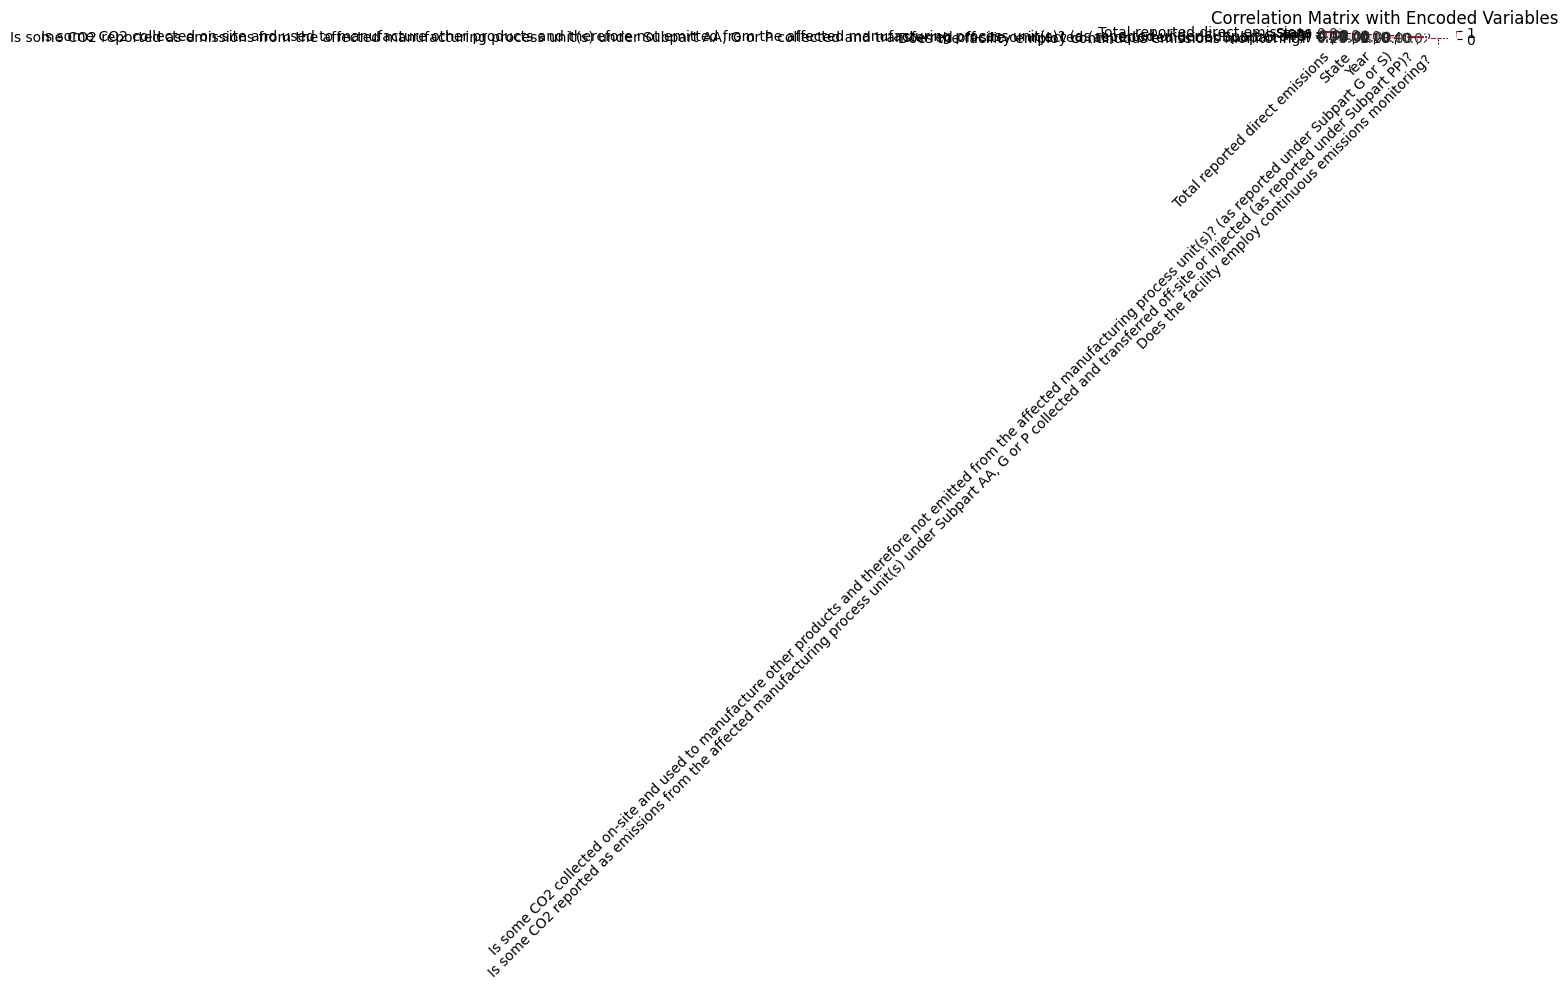


Average emissions by year:
Year
2010    507634.056745
2011    464395.974229
2012    430593.606392
2013    427369.475215
2014    419658.292722
2015    405888.371075
2016    426680.552974
2017    421504.729301
2018    422249.545243
2019    399399.303833
2020    366485.108930
2021    386508.389461
2022    384445.642306
2023    368290.636520
Name: Total reported direct emissions, dtype: float64


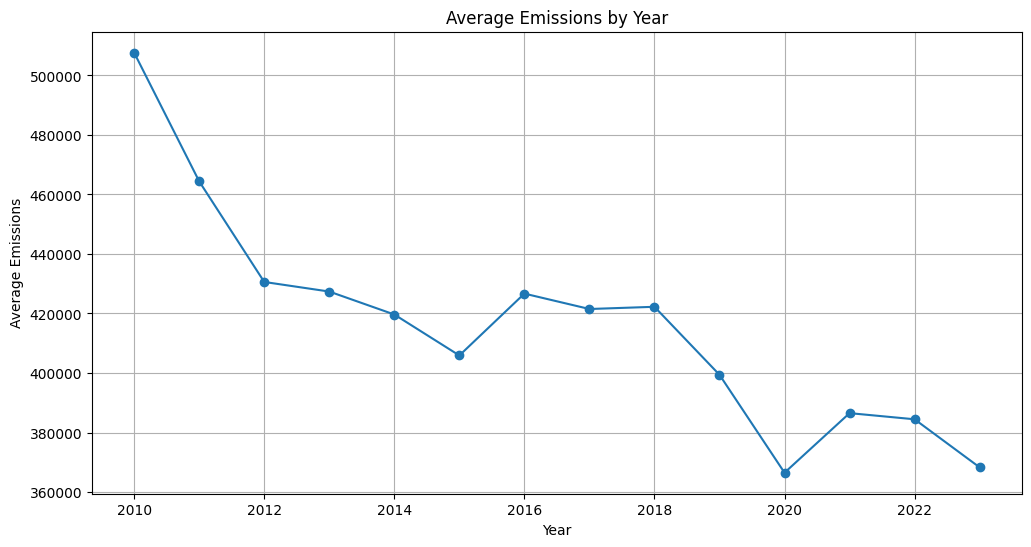


Top 5 states by average emissions:
MO: 718,665.02
FL: 716,305.58
IN: 716,112.42
WV: 710,833.06
ND: 667,042.58


In [9]:
# Create state mapping
state_mapping = {state: i+1 for i, state in enumerate(sorted(merged_df_cleaned['State'].unique()))}

# Create copy of cleaned dataframe
df_encoded = merged_df_cleaned.copy()

# Encode states
df_encoded['State'] = df_encoded['State'].map(state_mapping)

# Define Y/N columns with exact names
yn_columns = [
    'Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)',
    'Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?',
    'Does the facility employ continuous emissions monitoring? '
]

# Convert Y/N to 1/0
for col in yn_columns:
    df_encoded[col] = df_encoded[col].map({'Y': 1, 'N': 0})

# Print sample of encoded data
print("Sample of encoded data:")
print(df_encoded[['State', 'Year'] + yn_columns].head())

# Print state mapping
print("\nState Mapping:")
for state, number in sorted(state_mapping.items(), key=lambda x: x[1]):
    print(f"{state}: {number}")

# Calculate correlations with target variable
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
target = 'Total reported direct emissions'

# Calculate correlations and sort
correlations = df_encoded[numeric_cols].corr()[target].sort_values(ascending=False)
print("\nCorrelations with Total reported direct emissions:")
print(correlations)

# Create correlation heatmap
plt.figure(figsize=(15, 10))
selected_cols = ['Total reported direct emissions', 'State', 'Year'] + yn_columns
correlation_matrix = df_encoded[selected_cols].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            mask=np.triu(np.ones_like(correlation_matrix), k=1))
plt.title('Correlation Matrix with Encoded Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional analysis: Trends over time
print("\nAverage emissions by year:")
yearly_avg = df_encoded.groupby('Year')[target].mean()
print(yearly_avg)

# Plot emissions trend
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.grid(True)
plt.show()

# State analysis
print("\nTop 5 states by average emissions:")
state_avg = df_encoded.groupby('State')[target].mean().sort_values(ascending=False)
state_names = {v: k for k, v in state_mapping.items()}
top_states = state_avg.head()
for state_code, avg_emissions in top_states.items():
    print(f"{state_names[state_code]}: {avg_emissions:,.2f}")

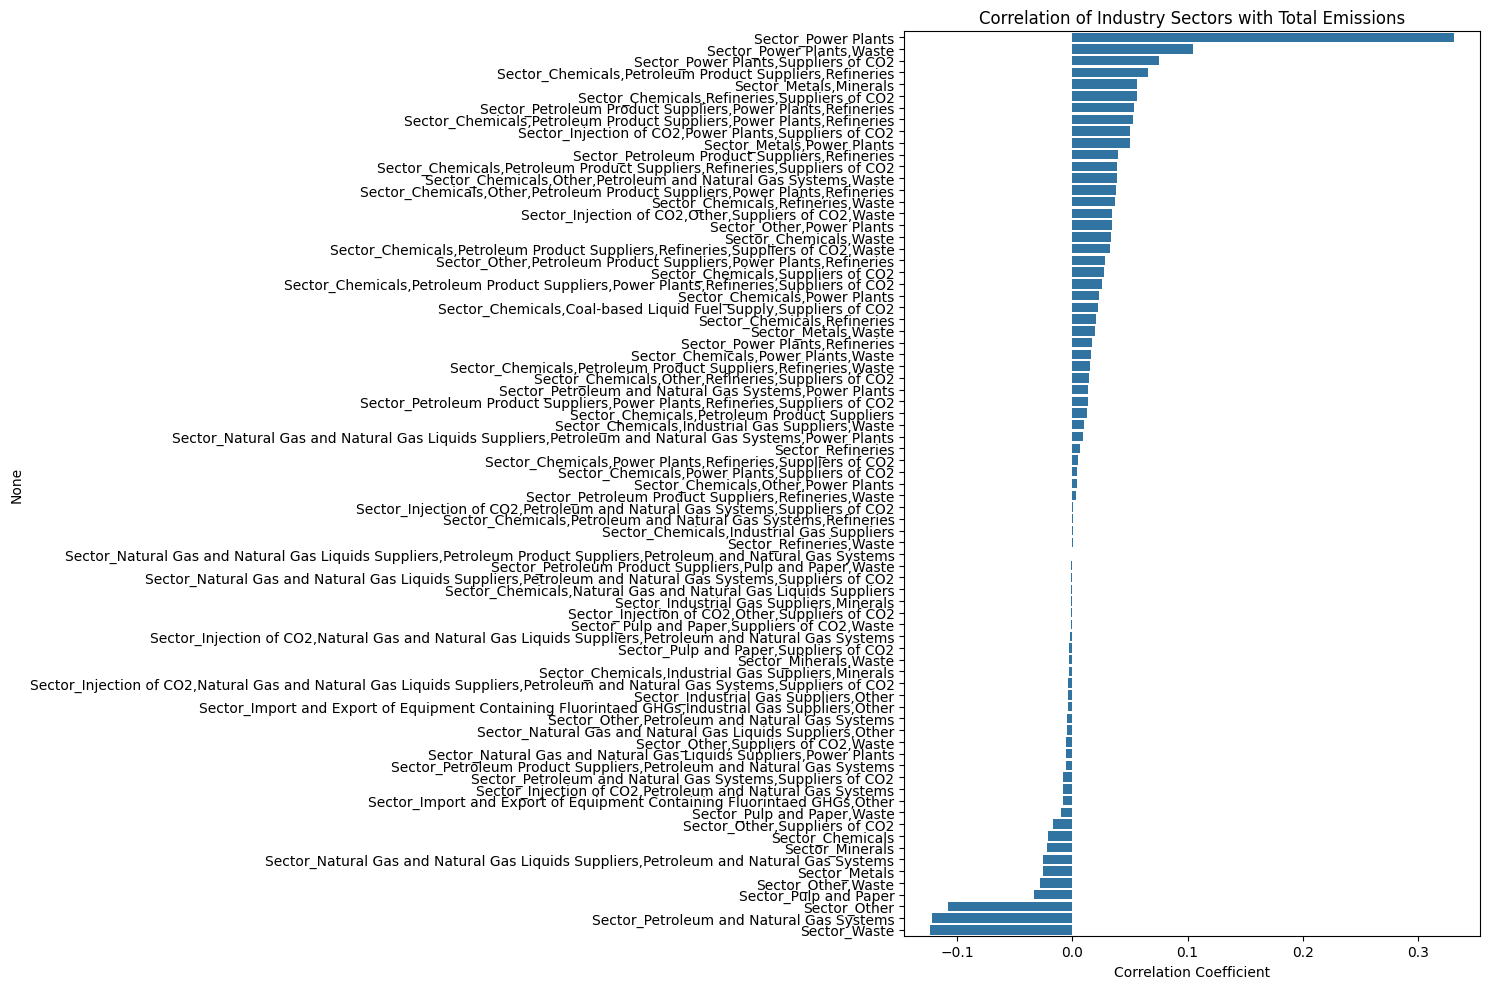


Correlations with Total Emissions by Sector:
Sector_Power Plants: 0.331
Sector_Power Plants,Waste: 0.104
Sector_Power Plants,Suppliers of CO2: 0.075
Sector_Chemicals,Petroleum Product Suppliers,Refineries: 0.065
Sector_Metals,Minerals: 0.056
Sector_Chemicals,Refineries,Suppliers of CO2: 0.056
Sector_Petroleum Product Suppliers,Power Plants,Refineries: 0.053
Sector_Chemicals,Petroleum Product Suppliers,Power Plants,Refineries: 0.053
Sector_Injection of CO2,Power Plants,Suppliers of CO2: 0.050
Sector_Metals,Power Plants: 0.050
Sector_Petroleum Product Suppliers,Refineries: 0.039
Sector_Chemicals,Petroleum Product Suppliers,Refineries,Suppliers of CO2: 0.039
Sector_Chemicals,Other,Petroleum and Natural Gas Systems,Waste: 0.038
Sector_Chemicals,Other,Petroleum Product Suppliers,Power Plants,Refineries: 0.038
Sector_Chemicals,Refineries,Waste: 0.037
Sector_Injection of CO2,Other,Suppliers of CO2,Waste: 0.035
Sector_Other,Power Plants: 0.034
Sector_Chemicals,Waste: 0.034
Sector_Chemicals,Pe

<ipython-input-16-9b1cb28c307c>:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

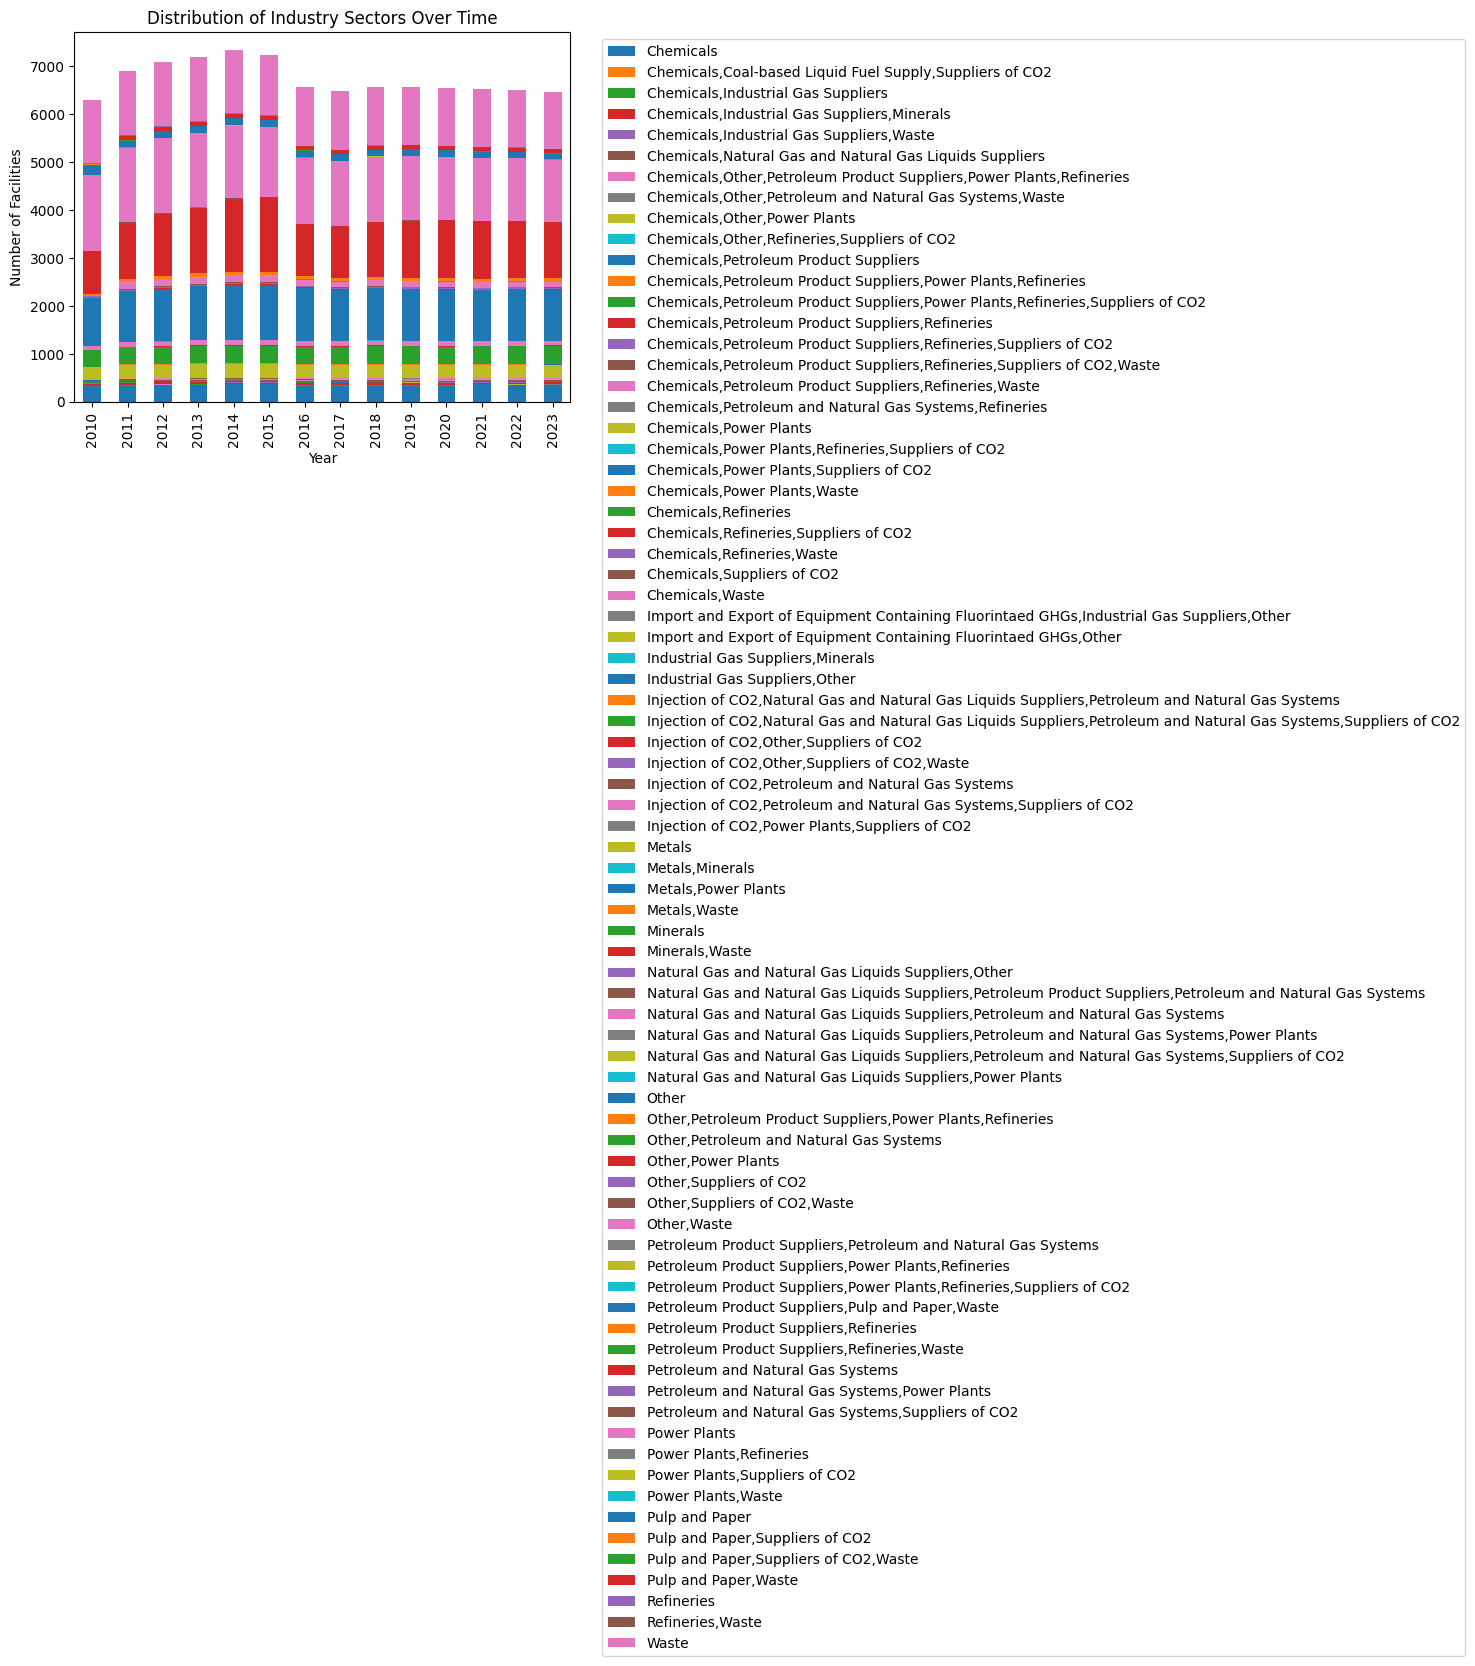

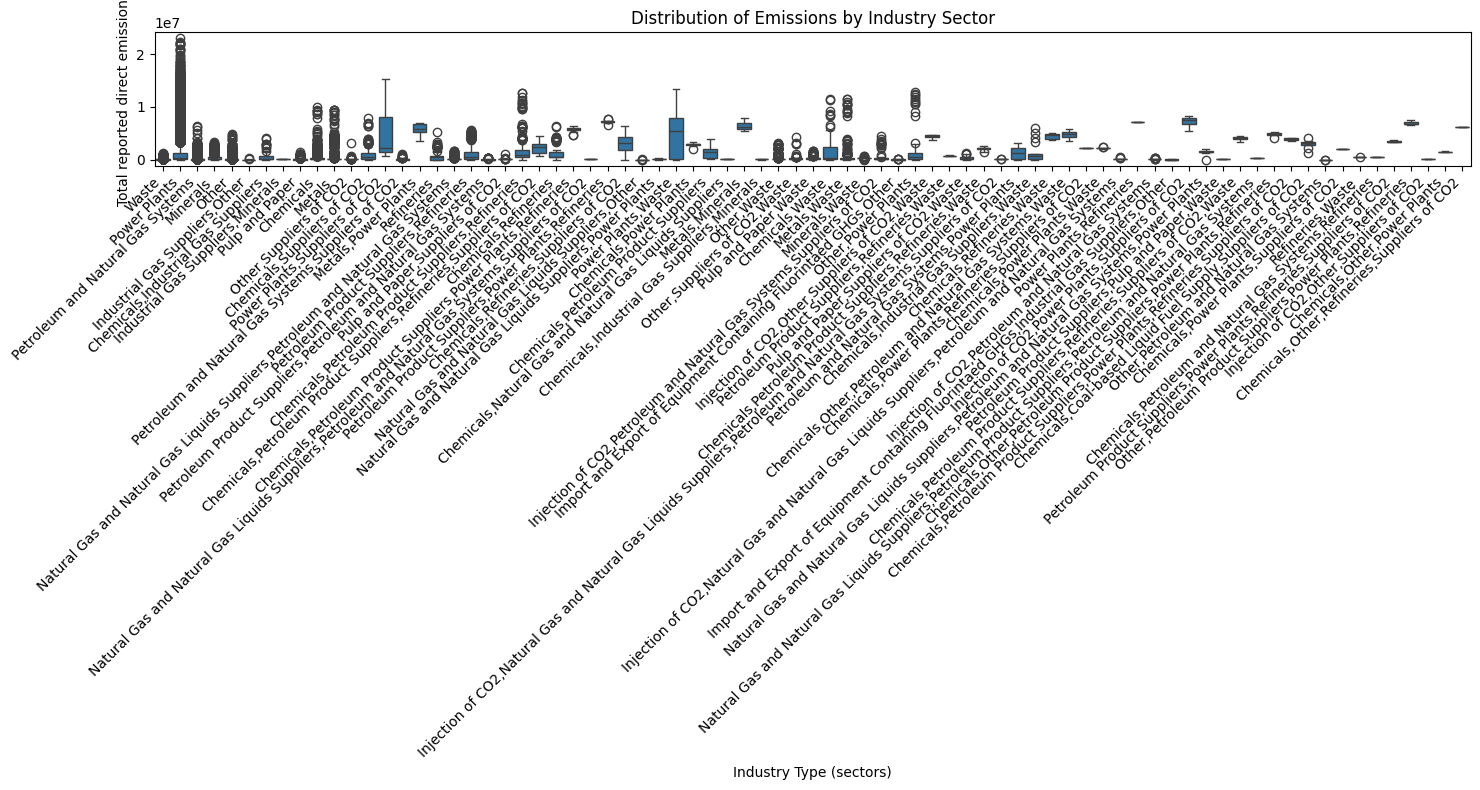


Sector Statistics:
                                                   Total reported direct emissions  \
                                                                             count   
Industry Type (sectors)                                                              
Chemicals                                                                     4726   
Chemicals,Coal-based Liquid Fuel Supply,Supplie...                              12   
Chemicals,Industrial Gas Suppliers                                             197   
Chemicals,Industrial Gas Suppliers,Minerals                                     13   
Chemicals,Industrial Gas Suppliers,Waste                                        17   
...                                                                            ...   
Pulp and Paper,Suppliers of CO2,Waste                                           73   
Pulp and Paper,Waste                                                          1096   
Refineries                        

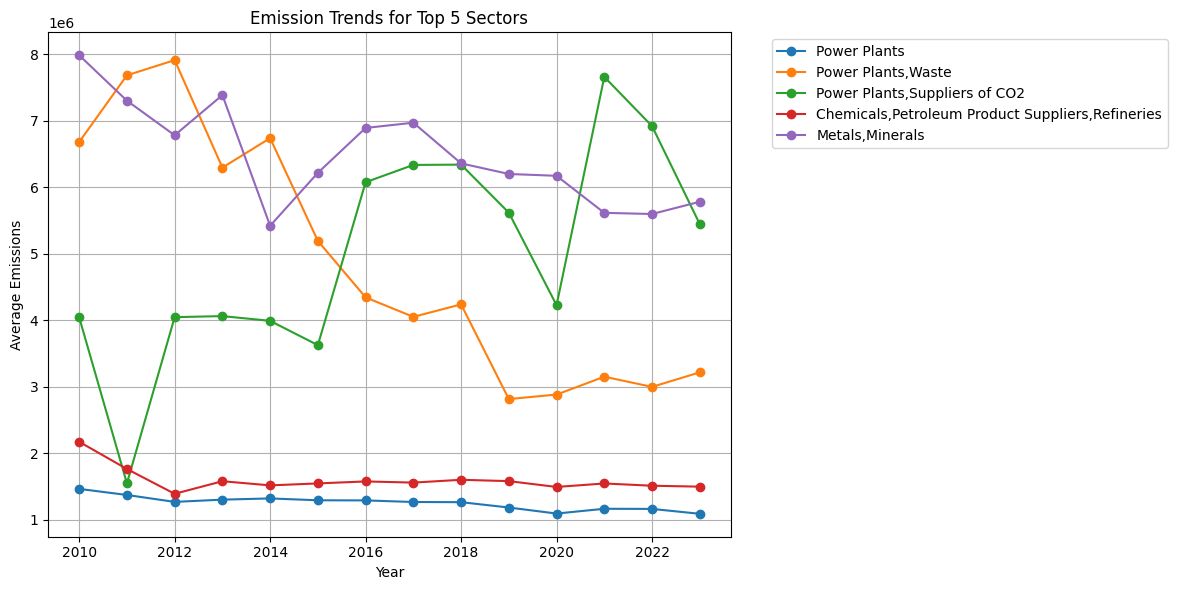

In [10]:
# Create dummy variables for Industry Type (sectors)
sector_dummies = pd.get_dummies(df_encoded['Industry Type (sectors)'], prefix='Sector')

# Add dummy columns to dataframe
df_with_sectors = pd.concat([df_encoded, sector_dummies], axis=1)

# Calculate correlations with emissions for each sector
sector_correlations = df_with_sectors[sector_dummies.columns].corrwith(df_with_sectors['Total reported direct emissions'])
sector_correlations = sector_correlations.sort_values(ascending=False)

# Plot sector correlations
plt.figure(figsize=(15, 10))
sns.barplot(x=sector_correlations.values, y=sector_correlations.index)
plt.title('Correlation of Industry Sectors with Total Emissions')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Print correlations
print("\nCorrelations with Total Emissions by Sector:")
for sector, corr in sector_correlations.items():
    print(f"{sector}: {corr:.3f}")

# Analyze sector distribution over time
sector_year_counts = df_encoded.groupby(['Year', 'Industry Type (sectors)']).size().unstack(fill_value=0)
print("\nNumber of facilities per sector over time:")
print(sector_year_counts)

# Plot sector distribution over time
plt.figure(figsize=(15, 8))
sector_year_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Industry Sectors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Facilities')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create boxplot for emissions by sector
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_encoded,
            x='Industry Type (sectors)',
            y='Total reported direct emissions')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Emissions by Industry Sector')
plt.tight_layout()
plt.show()

# Calculate and print summary statistics by sector
sector_stats = df_encoded.groupby('Industry Type (sectors)').agg({
    'Total reported direct emissions': ['count', 'mean', 'std', 'min', 'max'],
    'Year': ['min', 'max']
}).round(2)

print("\nSector Statistics:")
print(sector_stats)

# Analyze top emitting sectors by year
top_sectors_by_year = df_encoded.groupby(['Year', 'Industry Type (sectors)'])['Total reported direct emissions'].mean().unstack()
print("\nAverage emissions by sector and year:")
print(top_sectors_by_year)

# Plot trends for top 5 sectors
top_5_sectors = sector_correlations.head().index
plt.figure(figsize=(12, 6))
for sector in top_5_sectors:
    sector_name = sector.replace('Sector_', '')
    yearly_avg = df_with_sectors[df_encoded['Industry Type (sectors)'] == sector_name].groupby('Year')['Total reported direct emissions'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=sector_name)

plt.title('Emission Trends for Top 5 Sectors')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# State Analysis

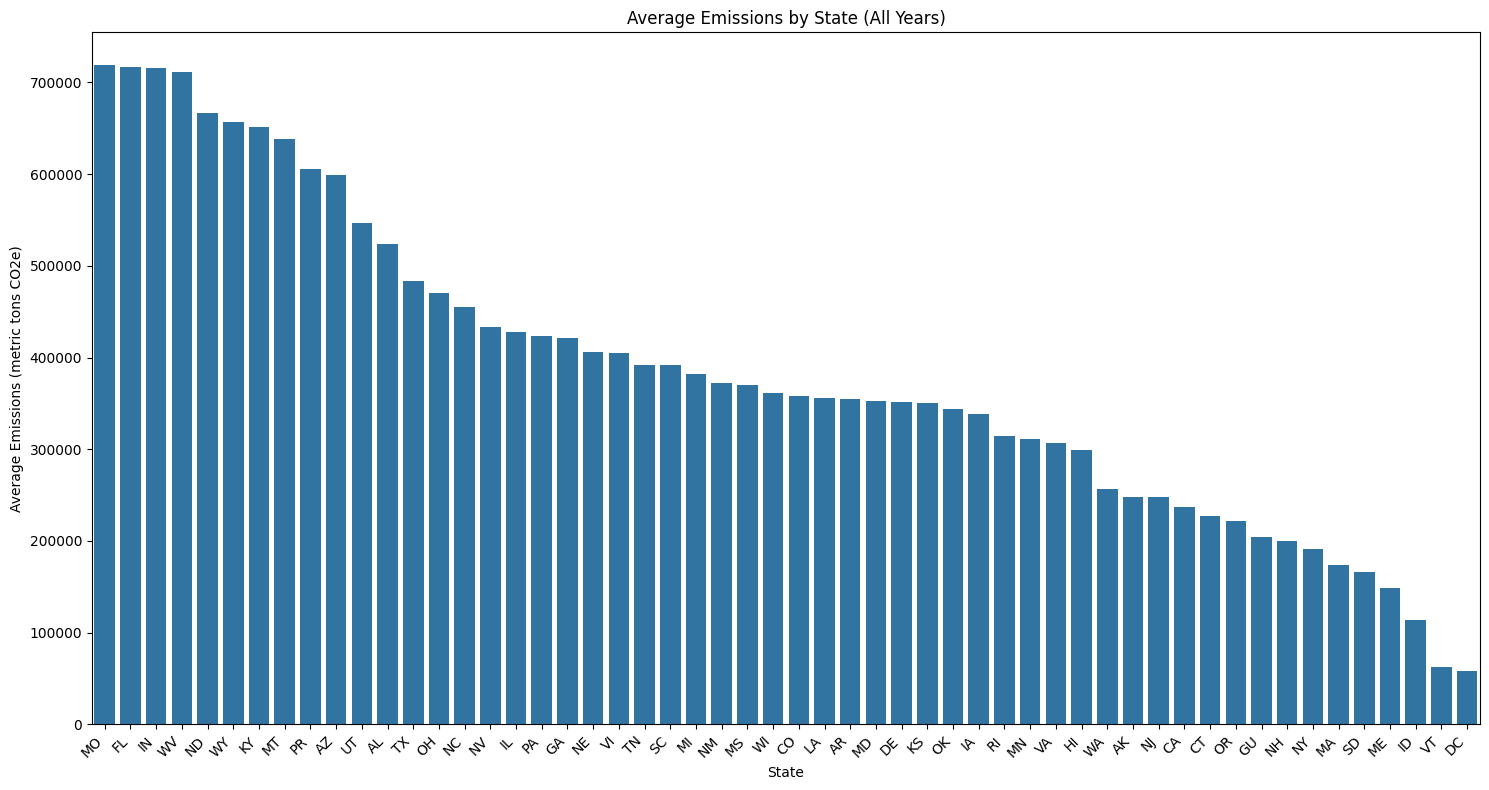


Top 10 States by Average Emissions:
State_Name          mean  count
        MO 718665.019430   1545
        FL 716305.576075   2503
        IN 716112.420876   2710
        WV 710833.061935   1595
        ND 667042.579662    788
        WY 656816.967264   1254
        KY 651456.741516   1972
        MT 638057.600798    446
        PR 605515.553202    353
        AZ 599125.699498   1241


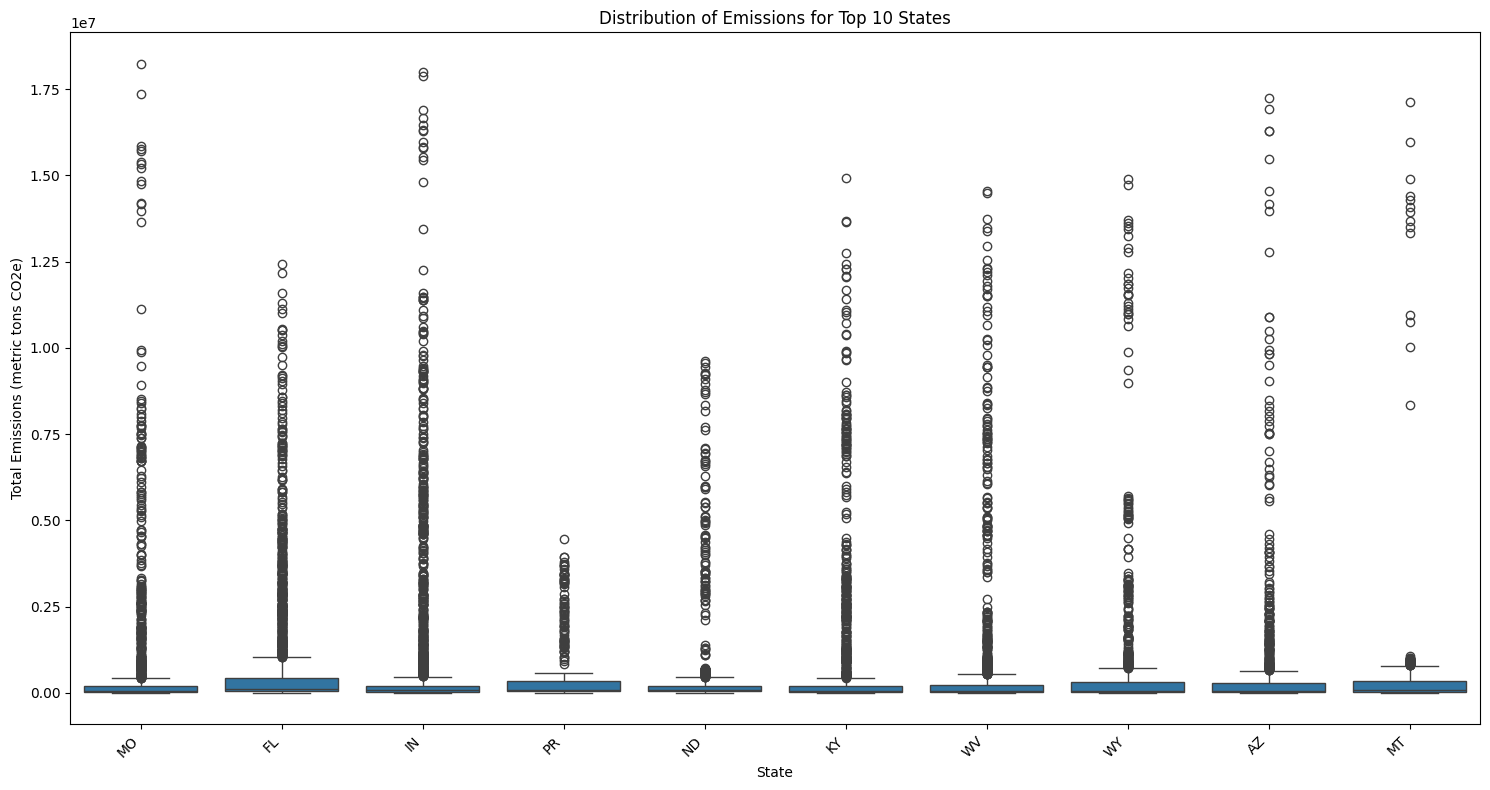


Correlation between State and Emissions: 0.011508106653368365


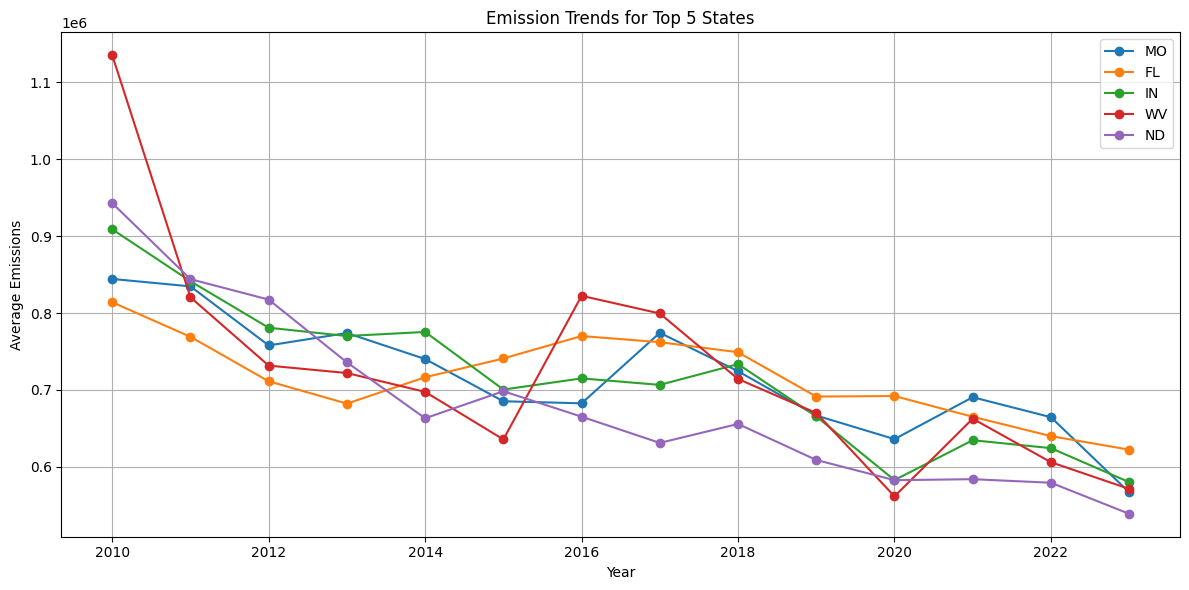

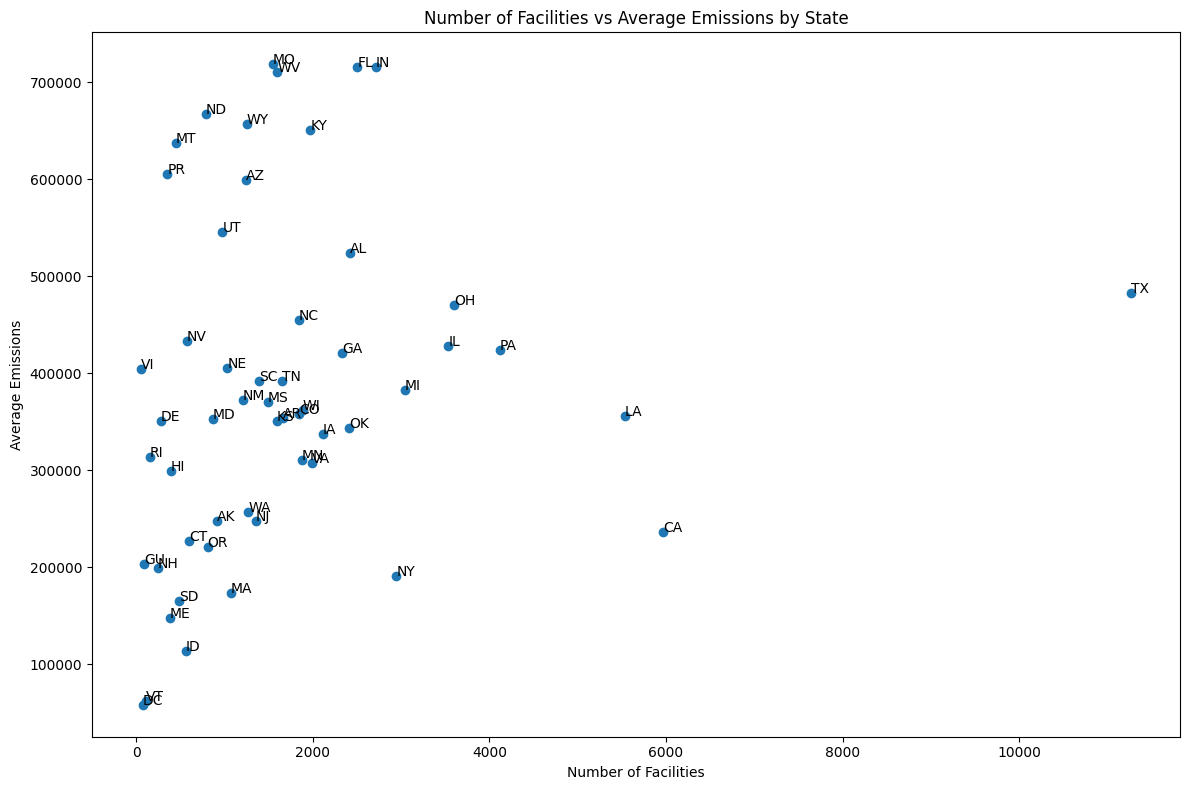


Year-over-year changes for top 5 states:

MO:
Year
2010      NaN
2011    -1.14
2012    -9.20
2013     2.13
2014    -4.37
2015    -7.42
2016    -0.39
2017    13.44
2018    -6.45
2019    -7.95
2020    -4.61
2021     8.57
2022    -3.76
2023   -14.69
Name: Total reported direct emissions, dtype: float64

FL:
Year
2010     NaN
2011   -5.52
2012   -7.52
2013   -4.08
2014    5.02
2015    3.41
2016    3.93
2017   -1.03
2018   -1.72
2019   -7.69
2020    0.10
2021   -3.90
2022   -3.78
2023   -2.75
Name: Total reported direct emissions, dtype: float64

IN:
Year
2010      NaN
2011    -7.43
2012    -7.19
2013    -1.38
2014     0.69
2015    -9.66
2016     2.08
2017    -1.18
2018     3.82
2019    -9.27
2020   -12.44
2021     8.90
2022    -1.63
2023    -7.08
Name: Total reported direct emissions, dtype: float64

WV:
Year
2010      NaN
2011   -27.73
2012   -10.82
2013    -1.32
2014    -3.39
2015    -8.86
2016    29.38
2017    -2.79
2018   -10.66
2019    -6.19
2020   -16.19
2021    17.98
2022    -8.54


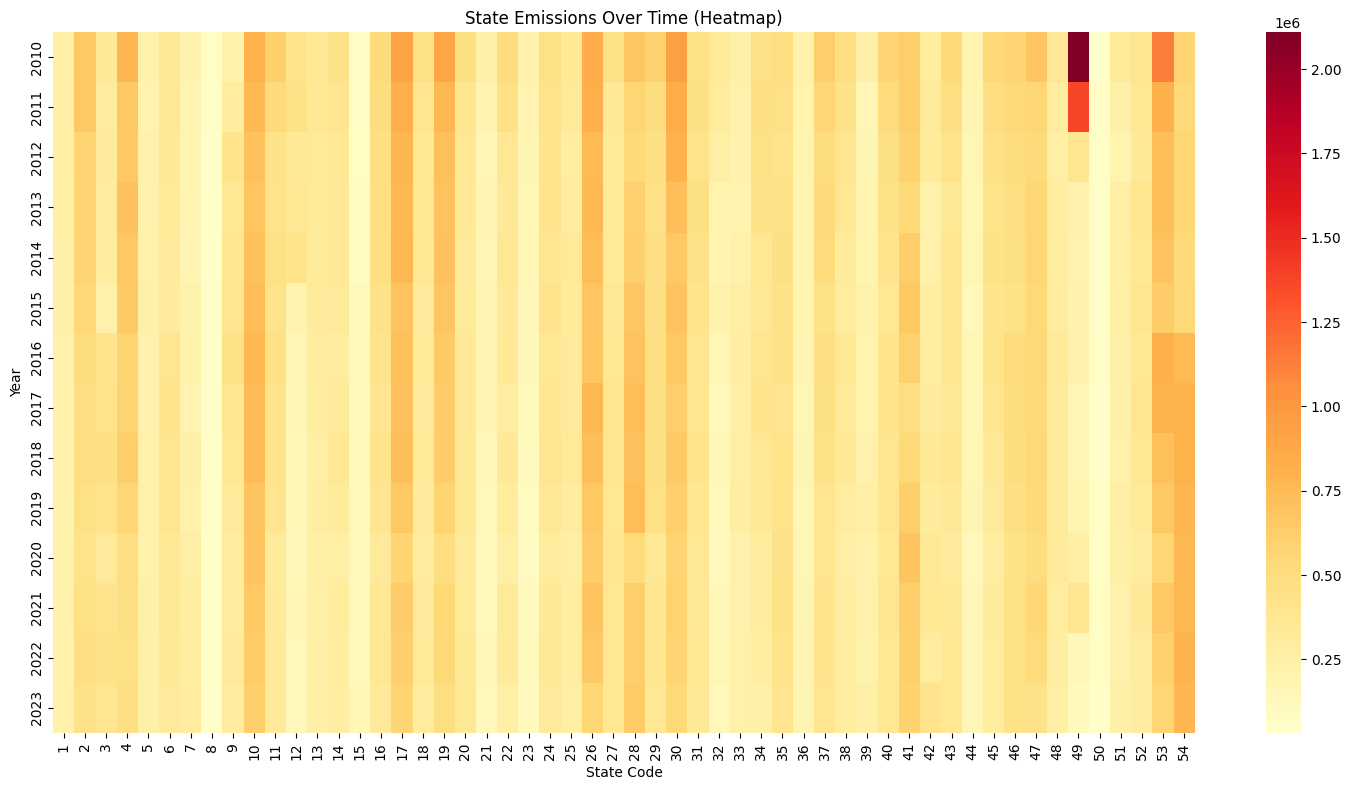

In [11]:
# Create reverse mapping for state names
reverse_state_mapping = {v: k for k, v in state_mapping.items()}

# Calculate correlation between state and emissions
state_correlation = df_encoded['State'].corr(df_encoded['Total reported direct emissions'])

# Calculate average emissions by state and year
state_year_emissions = df_encoded.groupby(['State', 'Year'])['Total reported direct emissions'].agg(['mean', 'count']).reset_index()
state_year_emissions['State_Name'] = state_year_emissions['State'].map(reverse_state_mapping)

# Calculate overall state statistics
state_emissions = df_encoded.groupby('State')['Total reported direct emissions'].agg(['mean', 'count', 'sum']).reset_index()
state_emissions['State_Name'] = state_emissions['State'].map(reverse_state_mapping)
state_emissions = state_emissions.sort_values('mean', ascending=False)

# Plot average emissions by state
plt.figure(figsize=(15, 8))
sns.barplot(data=state_emissions, x='State_Name', y='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Average Emissions by State (All Years)')
plt.xlabel('State')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.tight_layout()
plt.show()

# Print top 10 states by average emissions
print("\nTop 10 States by Average Emissions:")
print(state_emissions[['State_Name', 'mean', 'count']].head(10).to_string(index=False))

# Create boxplot for emissions distribution by state
plt.figure(figsize=(15, 8))
top_10_states = state_emissions.head(10)['State_Name'].tolist()
top_10_data = df_encoded[df_encoded['State'].map(reverse_state_mapping).isin(top_10_states)]
sns.boxplot(data=top_10_data,
            x=top_10_data['State'].map(reverse_state_mapping),
            y='Total reported direct emissions')
plt.title('Distribution of Emissions for Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print correlation and additional statistics
print("\nCorrelation between State and Emissions:", state_correlation)

# Analyze trends over time for top 5 states
plt.figure(figsize=(12, 6))
top_5_states = state_emissions.head()['State'].tolist()
for state in top_5_states:
    state_name = reverse_state_mapping[state]
    yearly_avg = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=state_name)

plt.title('Emission Trends for Top 5 States')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create scatter plot of facilities vs emissions
plt.figure(figsize=(12, 8))
plt.scatter(state_emissions['count'], state_emissions['mean'])
for i, row in state_emissions.iterrows():
    plt.annotate(row['State_Name'], (row['count'], row['mean']))
plt.xlabel('Number of Facilities')
plt.ylabel('Average Emissions')
plt.title('Number of Facilities vs Average Emissions by State')
plt.tight_layout()
plt.show()

# Calculate and display year-over-year changes
print("\nYear-over-year changes for top 5 states:")
for state in top_5_states:
    state_name = reverse_state_mapping[state]
    yearly_data = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].mean()
    yoy_change = yearly_data.pct_change() * 100
    print(f"\n{state_name}:")
    print(yoy_change.round(2))

# Create heatmap of state emissions over time
pivot_data = df_encoded.groupby(['Year', 'State'])['Total reported direct emissions'].mean().unstack()
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=False)
plt.title('State Emissions Over Time (Heatmap)')
plt.xlabel('State Code')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


Top 5 States by Total Emissions:
State_Name  Total reported direct emissions
        TX                     5.440393e+09
        LA                     1.970195e+09
        IN                     1.940665e+09
        FL                     1.792913e+09
        PA                     1.744374e+09


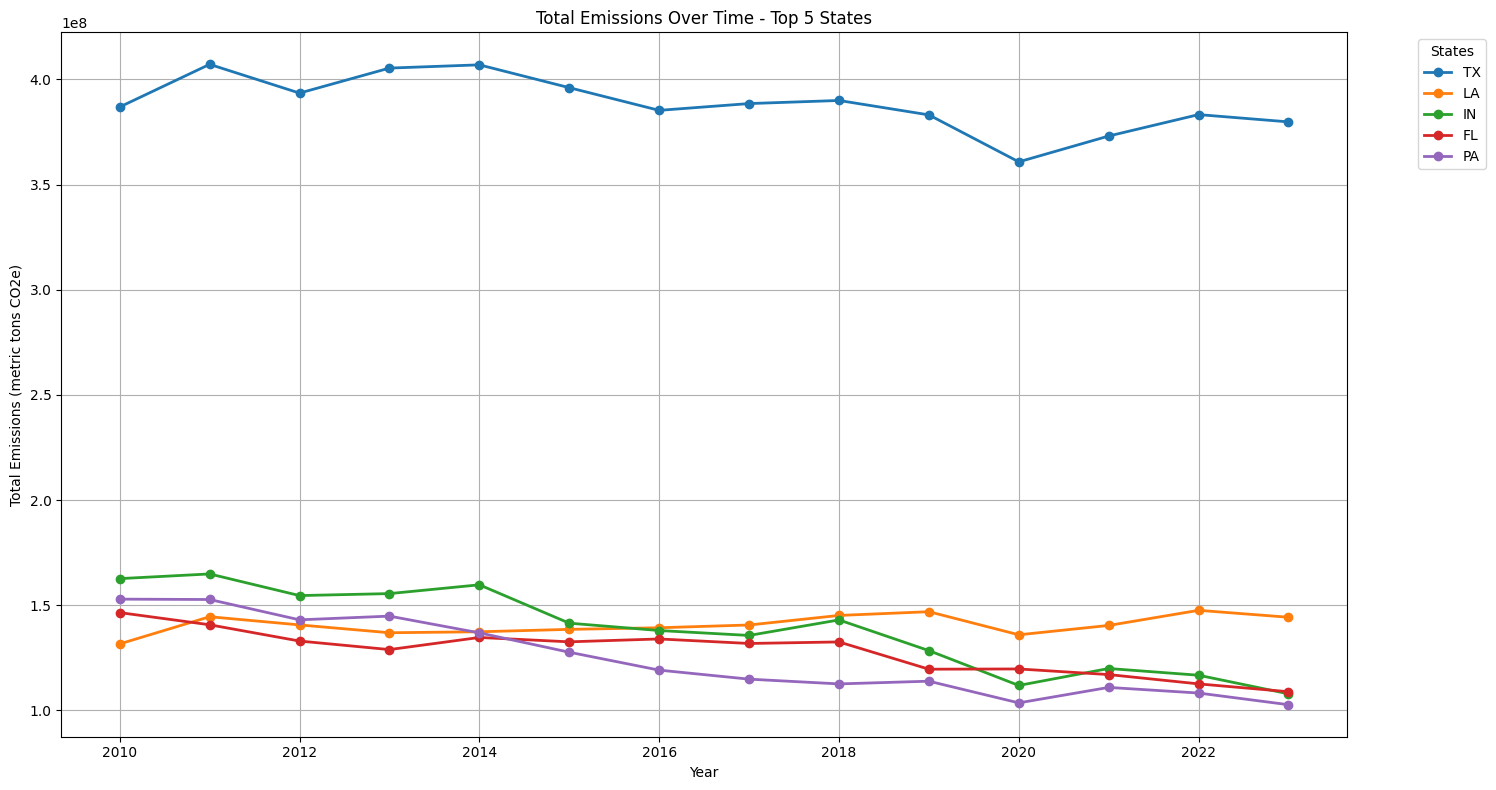


Detailed Analysis for TX:
Year  |  Total Emissions  |  Average Emissions  |  Number of Facilities
----------------------------------------------------------------------
2010  |  386,937,761  |  580,117  |  667
2011  |  407,202,901  |  550,274  |  740
2012  |  393,536,475  |  497,518  |  791
2013  |  405,426,478  |  492,022  |  824
2014  |  406,972,445  |  462,995  |  879
2015  |  396,113,457  |  439,638  |  901
2016  |  385,329,778  |  515,147  |  748
2017  |  388,554,433  |  506,590  |  767
2018  |  390,026,811  |  496,217  |  786
2019  |  383,173,484  |  472,470  |  811
2020  |  360,842,660  |  440,589  |  819
2021  |  373,118,565  |  447,384  |  834
2022  |  383,308,302  |  455,777  |  841
2023  |  379,849,251  |  444,268  |  855

Detailed Analysis for LA:
Year  |  Total Emissions  |  Average Emissions  |  Number of Facilities
----------------------------------------------------------------------
2010  |  131,640,876  |  463,524  |  284
2011  |  144,563,467  |  384,477  |  376
2012

<Figure size 1500x800 with 0 Axes>

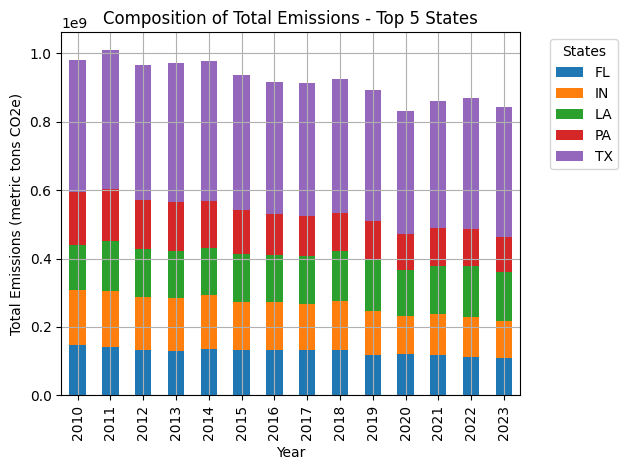


Percentage of Total US Emissions from Top 5 States:
2010: 30.68%
2011: 31.49%
2012: 31.55%
2013: 31.62%
2014: 31.64%
2015: 31.86%
2016: 32.66%
2017: 33.33%
2018: 33.23%
2019: 33.95%
2020: 34.63%
2021: 34.14%
2022: 34.68%
2023: 35.41%


In [12]:
# Calculate total emissions by state
state_total_emissions = df_encoded.groupby('State')['Total reported direct emissions'].sum().reset_index()
state_total_emissions['State_Name'] = state_total_emissions['State'].map(reverse_state_mapping)
state_total_emissions = state_total_emissions.sort_values('Total reported direct emissions', ascending=False)

# Get top 5 states by total emissions
top_5_states = state_total_emissions.head()
print("\nTop 5 States by Total Emissions:")
print(top_5_states[['State_Name', 'Total reported direct emissions']].to_string(index=False))

# Create time series for top 5 states
plt.figure(figsize=(15, 8))
for state in top_5_states['State']:
    state_name = reverse_state_mapping[state]
    yearly_emissions = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].sum()
    plt.plot(yearly_emissions.index, yearly_emissions.values, marker='o', label=state_name, linewidth=2)

plt.title('Total Emissions Over Time - Top 5 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create detailed analysis for top 5 states
for state in top_5_states['State']:
    state_name = reverse_state_mapping[state]
    state_data = df_encoded[df_encoded['State'] == state].groupby('Year').agg({
        'Total reported direct emissions': ['sum', 'mean', 'count']
    })

    print(f"\nDetailed Analysis for {state_name}:")
    print("Year  |  Total Emissions  |  Average Emissions  |  Number of Facilities")
    print("-" * 70)
    for year, row in state_data.iterrows():
        total = row[('Total reported direct emissions', 'sum')]
        avg = row[('Total reported direct emissions', 'mean')]
        count = row[('Total reported direct emissions', 'count')]
        print(f"{year}  |  {total:,.0f}  |  {avg:,.0f}  |  {count:.0f}")

# Calculate year-over-year changes for top 5 states
print("\nYear-over-Year Changes:")
for state in top_5_states['State']:
    state_name = reverse_state_mapping[state]
    yearly_emissions = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].sum()
    yoy_change = yearly_emissions.pct_change() * 100

    print(f"\n{state_name}:")
    print("Year  |  % Change")
    print("-" * 20)
    for year, change in yoy_change.items():
        if not np.isnan(change):
            print(f"{year}  |  {change:+.2f}%")

# Create stacked bar chart
plt.figure(figsize=(15, 8))
yearly_data = df_encoded[df_encoded['State'].isin(top_5_states['State'])].pivot_table(
    index='Year',
    columns='State',
    values='Total reported direct emissions',
    aggfunc='sum'
)
yearly_data.columns = [reverse_state_mapping[col] for col in yearly_data.columns]
yearly_data.plot(kind='bar', stacked=True)
plt.title('Composition of Total Emissions - Top 5 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and show percentage of total emissions
total_us_emissions = df_encoded.groupby('Year')['Total reported direct emissions'].sum()
top_5_emissions = df_encoded[df_encoded['State'].isin(top_5_states['State'])].groupby('Year')['Total reported direct emissions'].sum()
percentage = (top_5_emissions / total_us_emissions * 100).round(2)

print("\nPercentage of Total US Emissions from Top 5 States:")
for year, pct in percentage.items():
    print(f"{year}: {pct}%")

# Outlier Detection


Top 10 States by Total Emissions:
State_Name  Total reported direct emissions
        TX                     5.440393e+09
        LA                     1.970195e+09
        IN                     1.940665e+09
        FL                     1.792913e+09
        PA                     1.744374e+09
        OH                     1.693389e+09
        IL                     1.512000e+09
        CA                     1.414107e+09
        KY                     1.284673e+09
        AL                     1.268420e+09


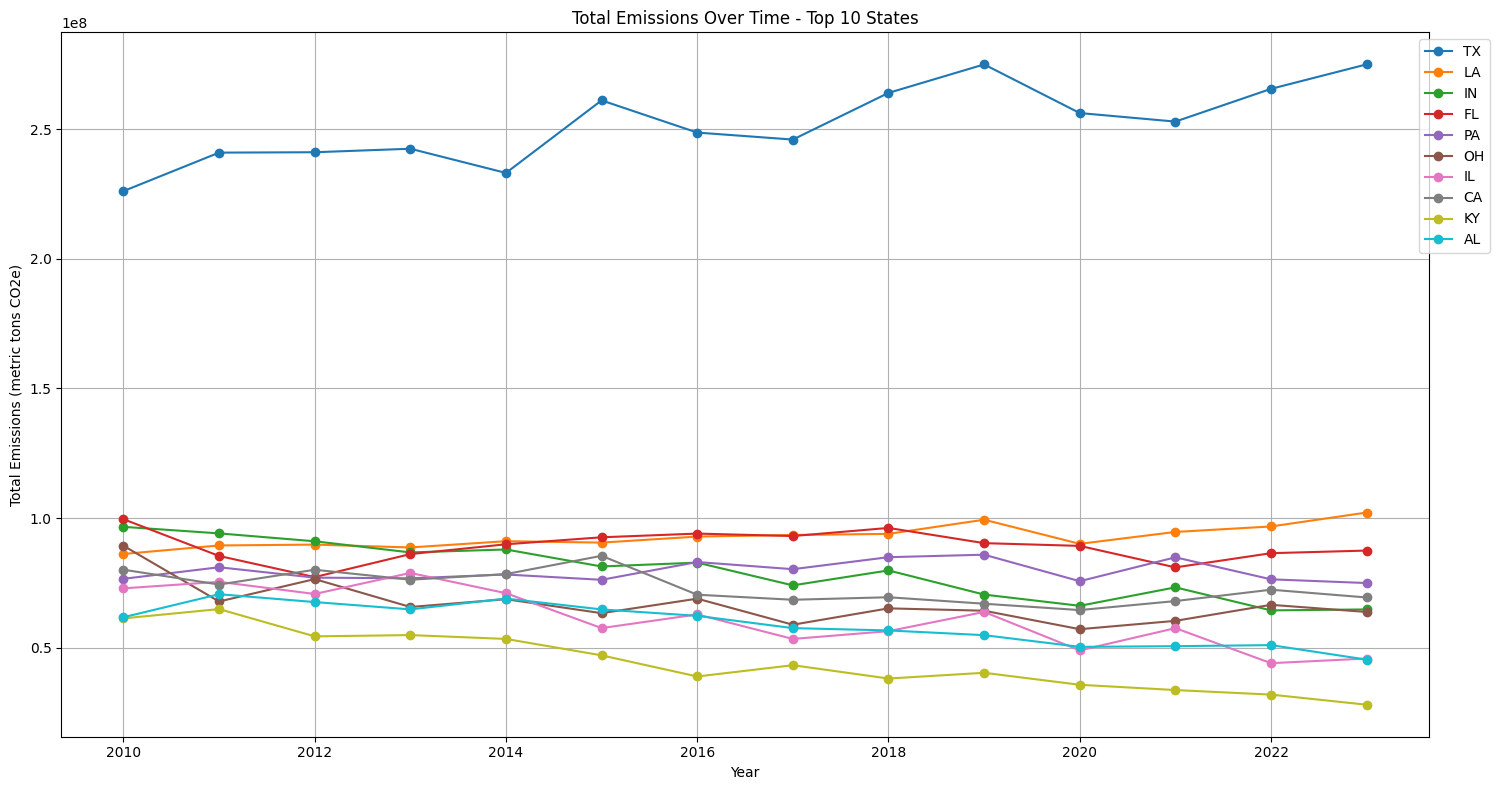

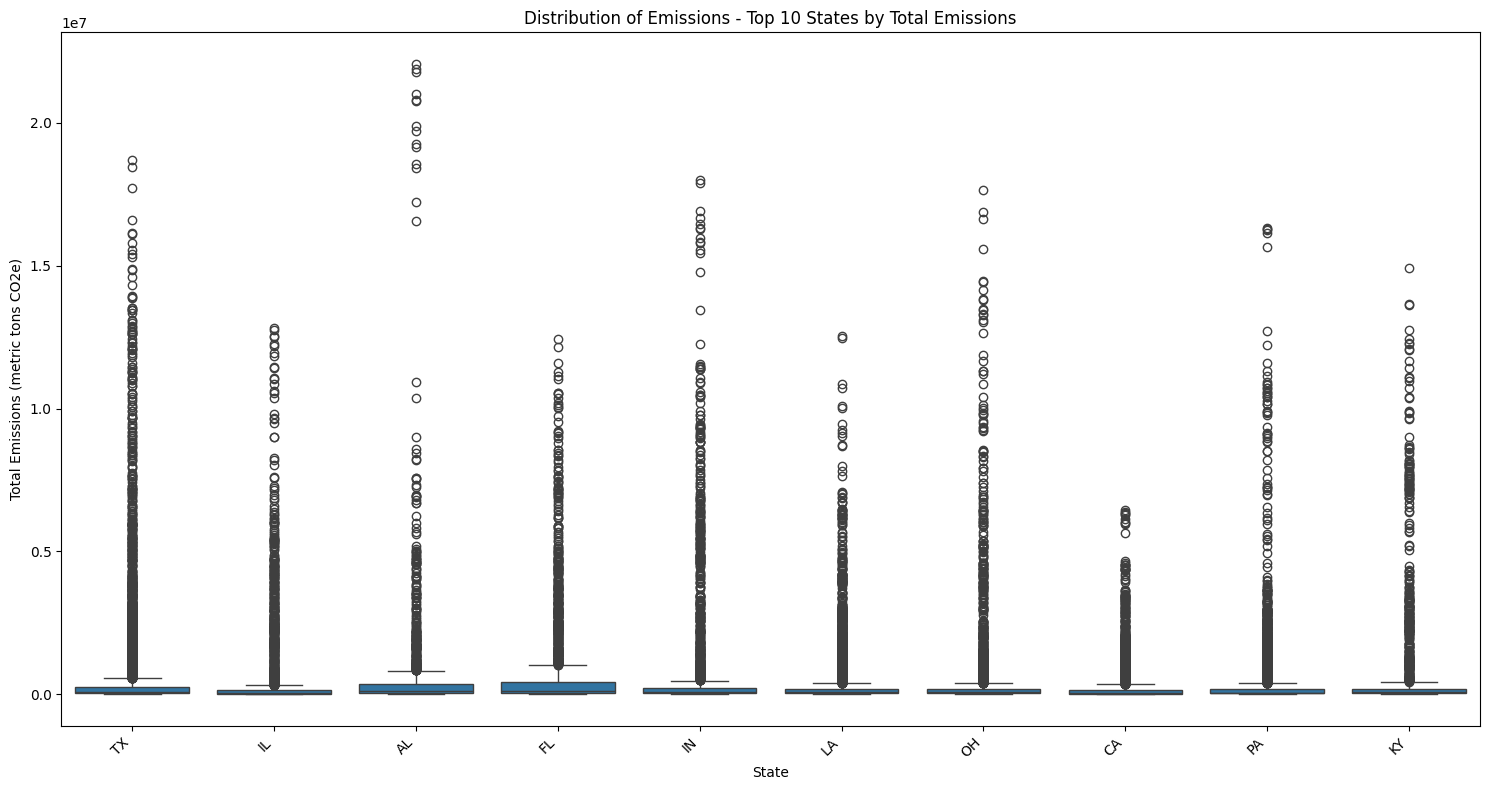


Significant Year-over-Year Changes in Total Emissions:

LA:
2011: 9.82% change

IN:
2020: -12.90% change

FL:
2019: -9.78% change

PA:
2020: -9.05% change

OH:
2012: -10.59% change
2015: -12.50% change

IL:
2020: -19.68% change

CA:
2016: -13.08% change

Summary Statistics for Top 10 States:

TX:
Total Emissions: 5,440,392,802
Mean: 483,032
Std Dev: 1,386,800
Min: 0
Max: 18,698,423
Number of Facilities: 11263

LA:
Total Emissions: 1,970,195,044
Mean: 355,888
Std Dev: 953,661
Min: 0
Max: 12,533,497
Number of Facilities: 5536

IN:
Total Emissions: 1,940,664,661
Mean: 716,112
Std Dev: 2,046,328
Min: 0
Max: 17,998,106
Number of Facilities: 2710

FL:
Total Emissions: 1,792,912,857
Mean: 716,306
Std Dev: 1,595,734
Min: 0
Max: 12,430,441
Number of Facilities: 2503

PA:
Total Emissions: 1,744,373,738
Mean: 423,906
Std Dev: 1,285,231
Min: 0
Max: 16,324,274
Number of Facilities: 4115

OH:
Total Emissions: 1,693,389,134
Mean: 470,125
Std Dev: 1,546,078
Min: 0
Max: 17,655,108
Number of Facilities

<Figure size 1500x800 with 0 Axes>

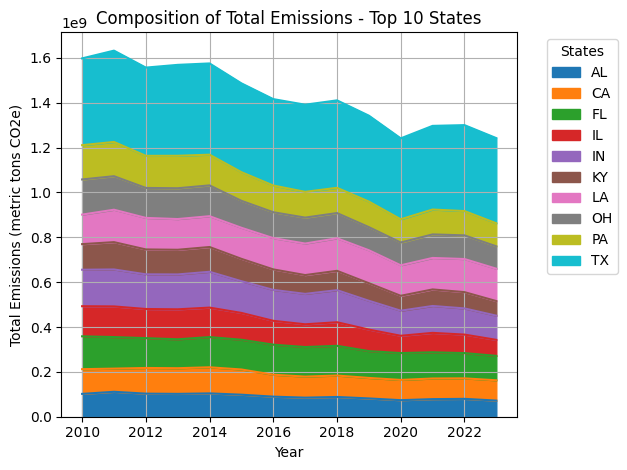

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total emissions by state
state_total_emissions = df_encoded.groupby('State')['Total reported direct emissions'].sum().reset_index()
state_total_emissions['State_Name'] = state_total_emissions['State'].map(reverse_state_mapping)
state_total_emissions = state_total_emissions.sort_values('Total reported direct emissions', ascending=False)

# Get top 10 states by total emissions
top_10_states = state_total_emissions.head(10)
print("\nTop 10 States by Total Emissions:")
print(top_10_states[['State_Name', 'Total reported direct emissions']].to_string(index=False))

# 1. State-level outlier detection for top 10
def analyze_state_outliers(df, top_states):
    state_outliers = {}
    for _, row in top_states.iterrows():
        state = row['State']
        state_name = row['State_Name']
        state_data = df[df['State'] == state]['Total reported direct emissions']

        z_scores = stats.zscore(state_data)
        outliers = state_data[abs(z_scores) > 3]

        if len(outliers) > 0:
            state_outliers[state_name] = len(outliers)

    print("\nNumber of outliers by state:")
    for state, count in sorted(state_outliers.items(), key=lambda x: x[1], reverse=True):
        print(f"{state}: {count} outliers")

    return state_outliers

# 2. Time series plot with outliers for top 10
plt.figure(figsize=(15, 8))
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]

    # Calculate yearly stats and outliers
    yearly_stats = state_data.groupby('Year')['Total reported direct emissions'].agg(['mean', 'std'])
    outliers = []

    for year in state_data['Year'].unique():
        year_data = state_data[state_data['Year'] == year]
        z_scores = (year_data['Total reported direct emissions'] - yearly_stats.loc[year, 'mean']) / yearly_stats.loc[year, 'std']
        year_outliers = year_data[abs(z_scores) > 3]
        outliers.extend(year_outliers['Total reported direct emissions'].tolist())

    # Plot regular points and outliers
    regular_data = state_data[~state_data['Total reported direct emissions'].isin(outliers)]
    plt.plot(regular_data.groupby('Year')['Total reported direct emissions'].sum(),
             marker='o', label=state_name)

plt.title('Total Emissions Over Time - Top 10 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Box plot for top 10 states
plt.figure(figsize=(15, 8))
top_10_data = df_encoded[df_encoded['State'].isin(top_10_states['State'])]
sns.boxplot(data=top_10_data,
            x=top_10_data['State'].map(reverse_state_mapping),
            y='Total reported direct emissions',
            showfliers=True)
plt.title('Distribution of Emissions - Top 10 States by Total Emissions')
plt.xlabel('State')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Year-over-year changes for top 10
print("\nSignificant Year-over-Year Changes in Total Emissions:")
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    yearly_totals = df_encoded[df_encoded['State'] == state].groupby('Year')['Total reported direct emissions'].sum()
    yoy_change = yearly_totals.pct_change() * 100

    # Identify significant changes (>2 standard deviations)
    change_std = yoy_change.std()
    significant_changes = yoy_change[abs(yoy_change) > 2 * change_std]

    if len(significant_changes) > 0:
        print(f"\n{state_name}:")
        for year, change in significant_changes.items():
            print(f"{year}: {change:.2f}% change")

# 5. Summary statistics for top 10
print("\nSummary Statistics for Top 10 States:")
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]['Total reported direct emissions']

    print(f"\n{state_name}:")
    print(f"Total Emissions: {state_data.sum():,.0f}")
    print(f"Mean: {state_data.mean():,.0f}")
    print(f"Std Dev: {state_data.std():,.0f}")
    print(f"Min: {state_data.min():,.0f}")
    print(f"Max: {state_data.max():,.0f}")
    print(f"Number of Facilities: {len(state_data)}")

# 6. Stacked area plot showing composition of total emissions
plt.figure(figsize=(15, 8))
pivot_data = df_encoded[df_encoded['State'].isin(top_10_states['State'])].pivot_table(
    index='Year',
    columns='State',
    values='Total reported direct emissions',
    aggfunc='sum'
)
pivot_data.columns = [reverse_state_mapping[col] for col in pivot_data.columns]
pivot_data.plot(kind='area', stacked=True)
plt.title('Composition of Total Emissions - Top 10 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.legend(title='States', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

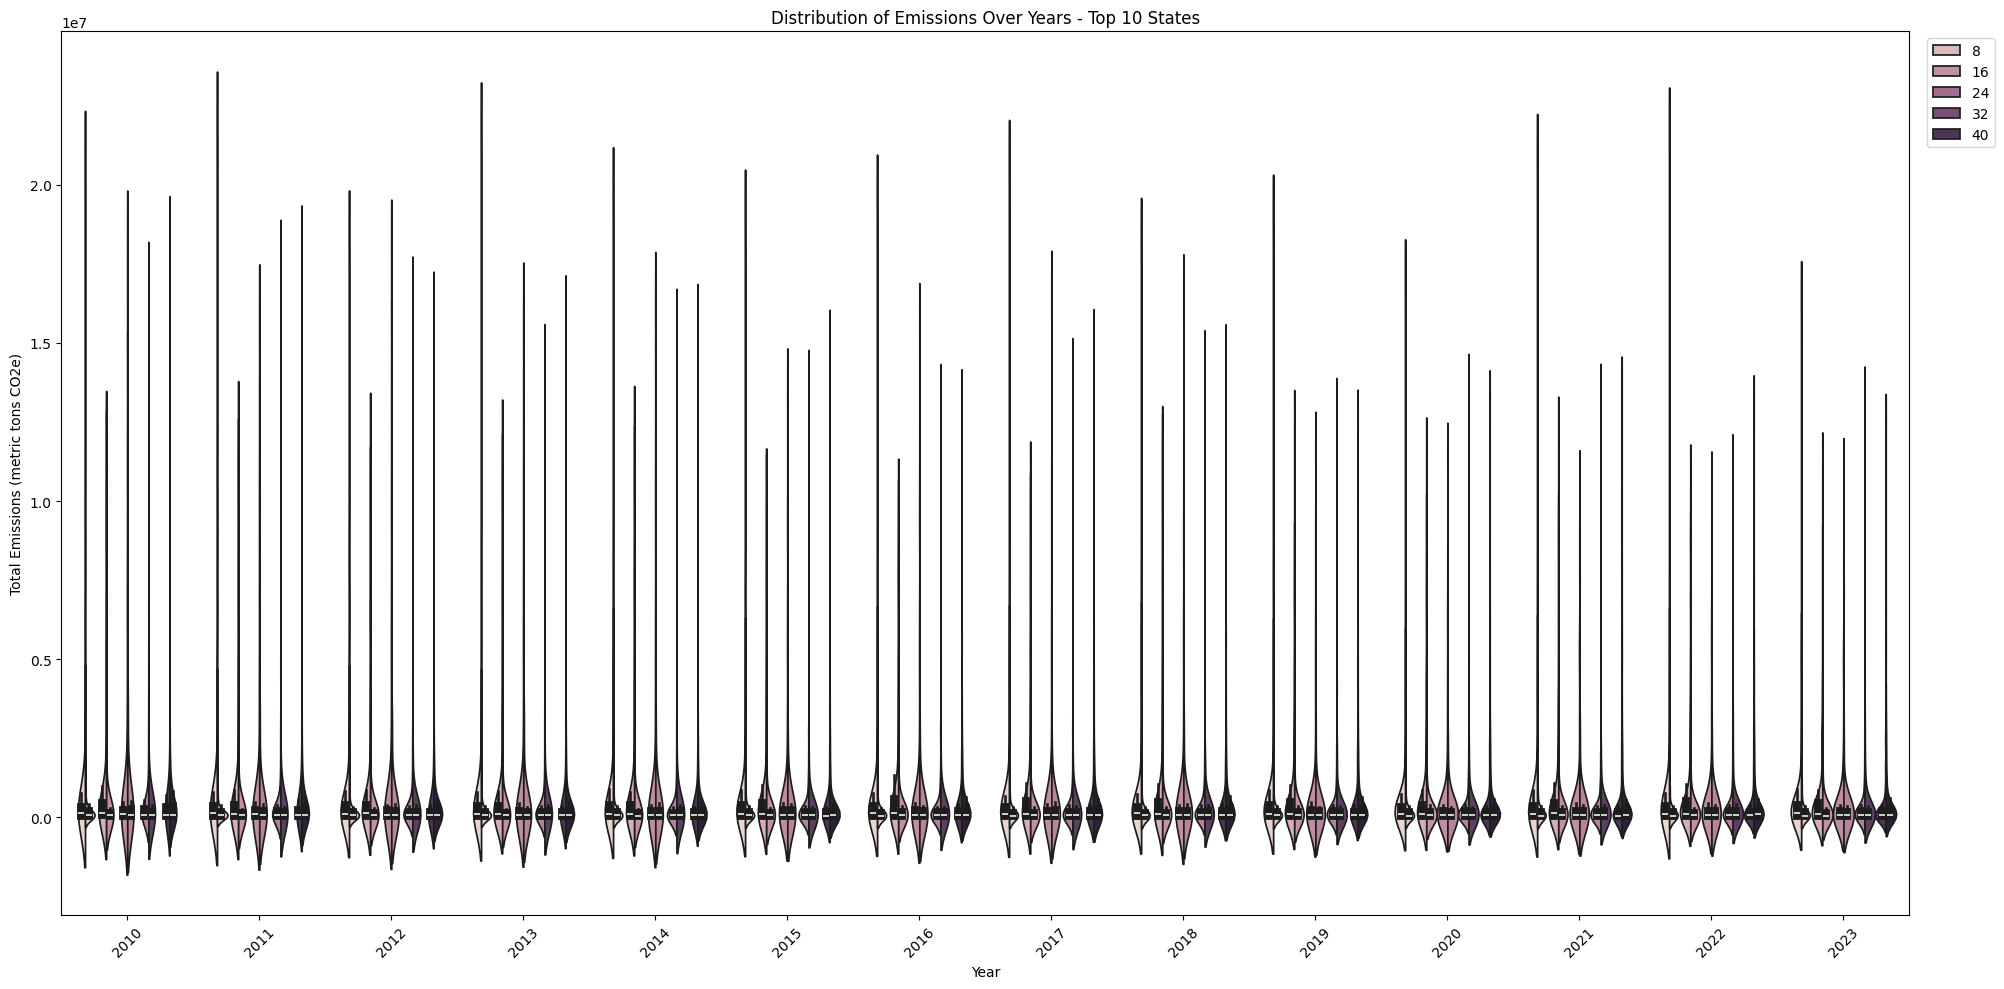

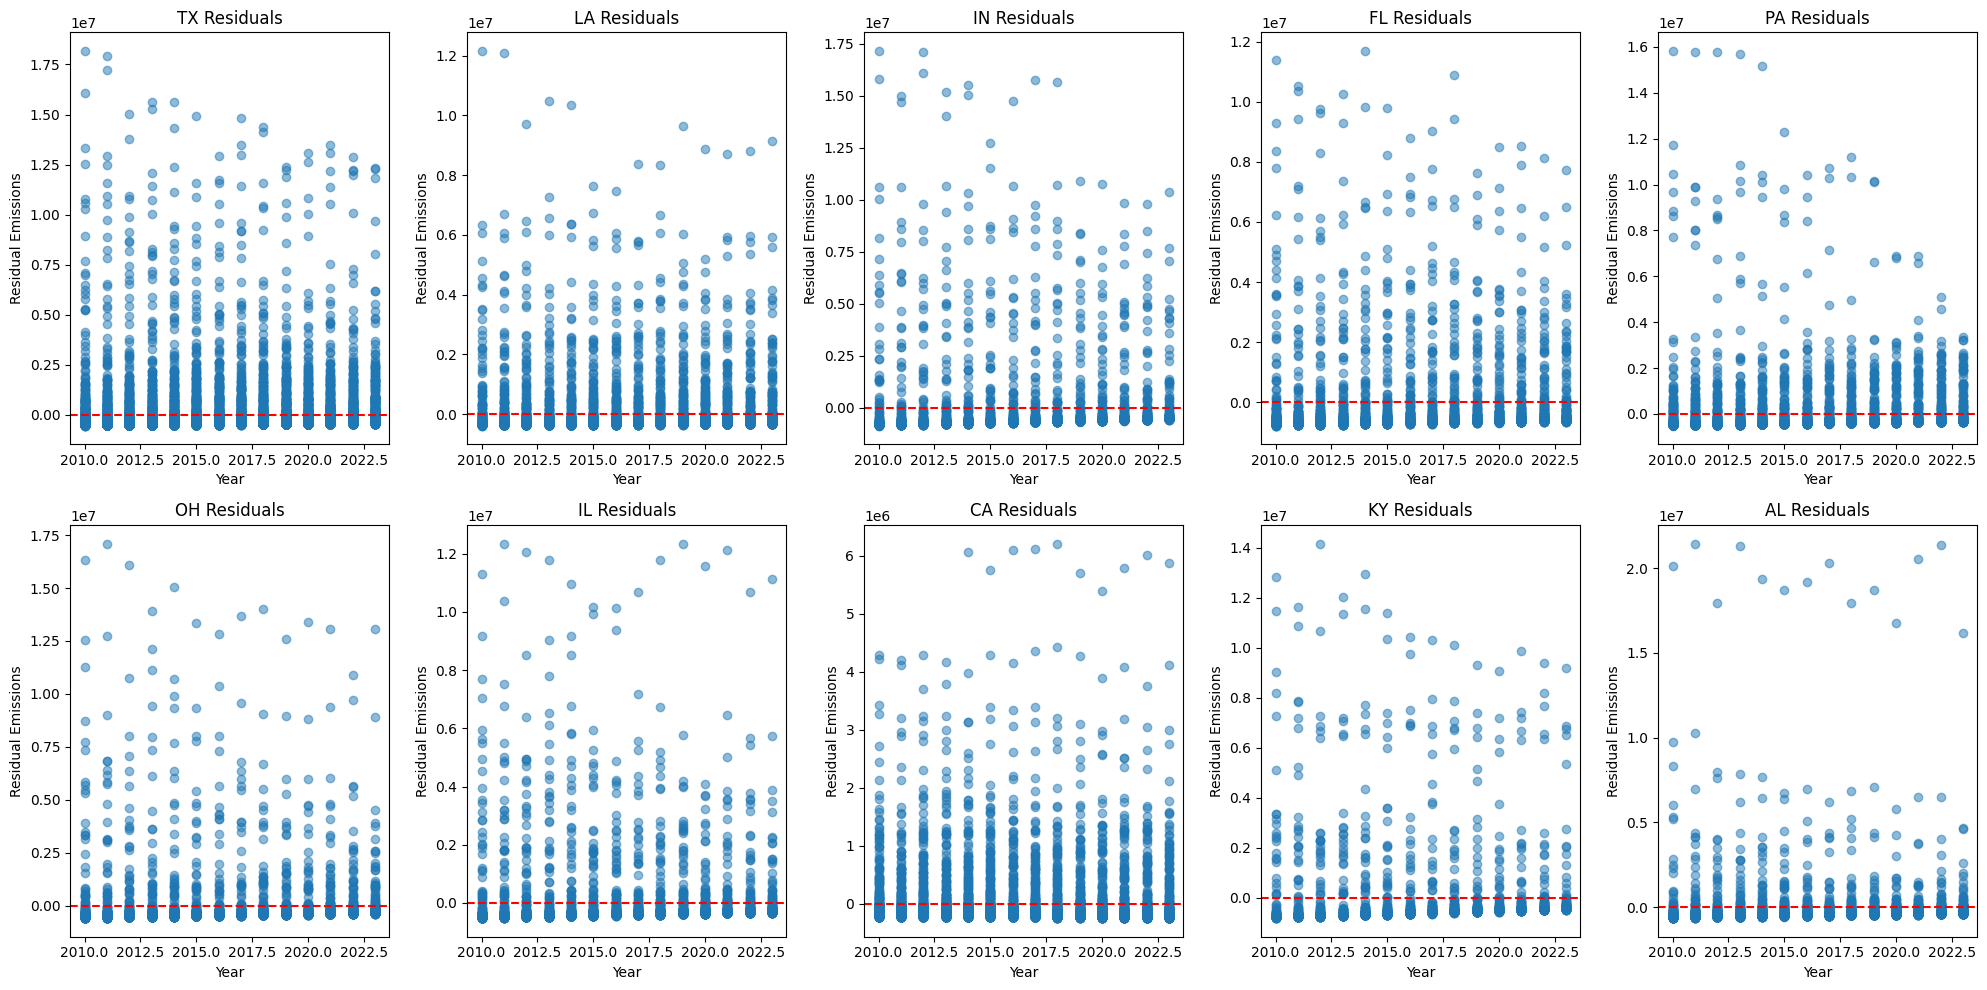

<ipython-input-14-818ee9ce797e>:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


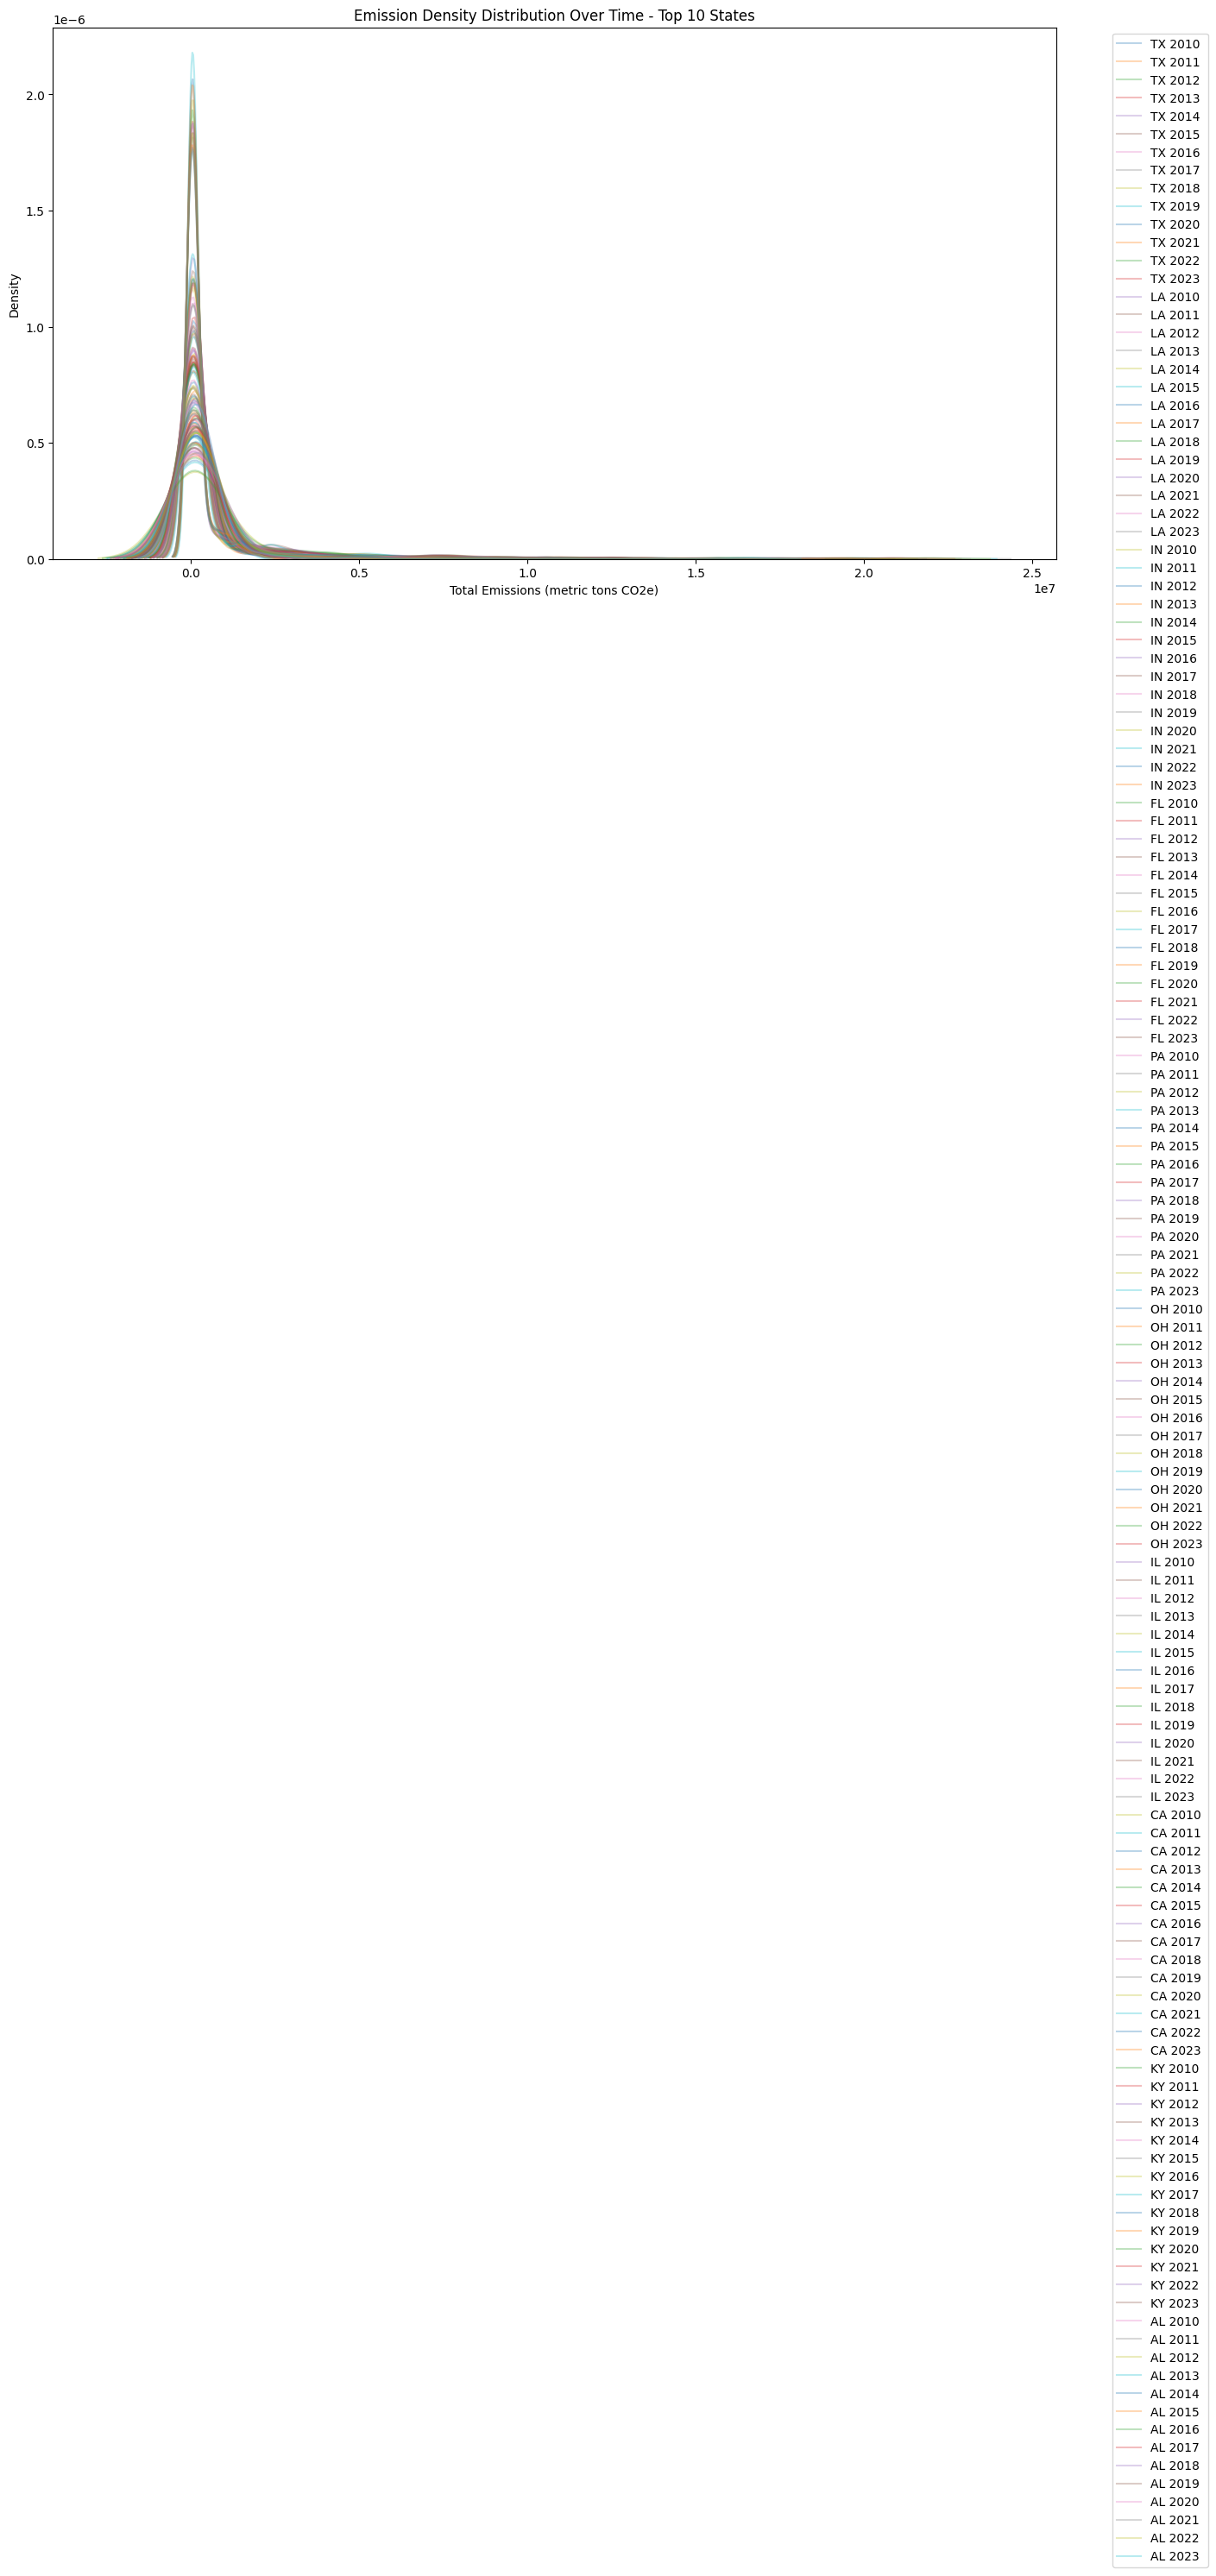

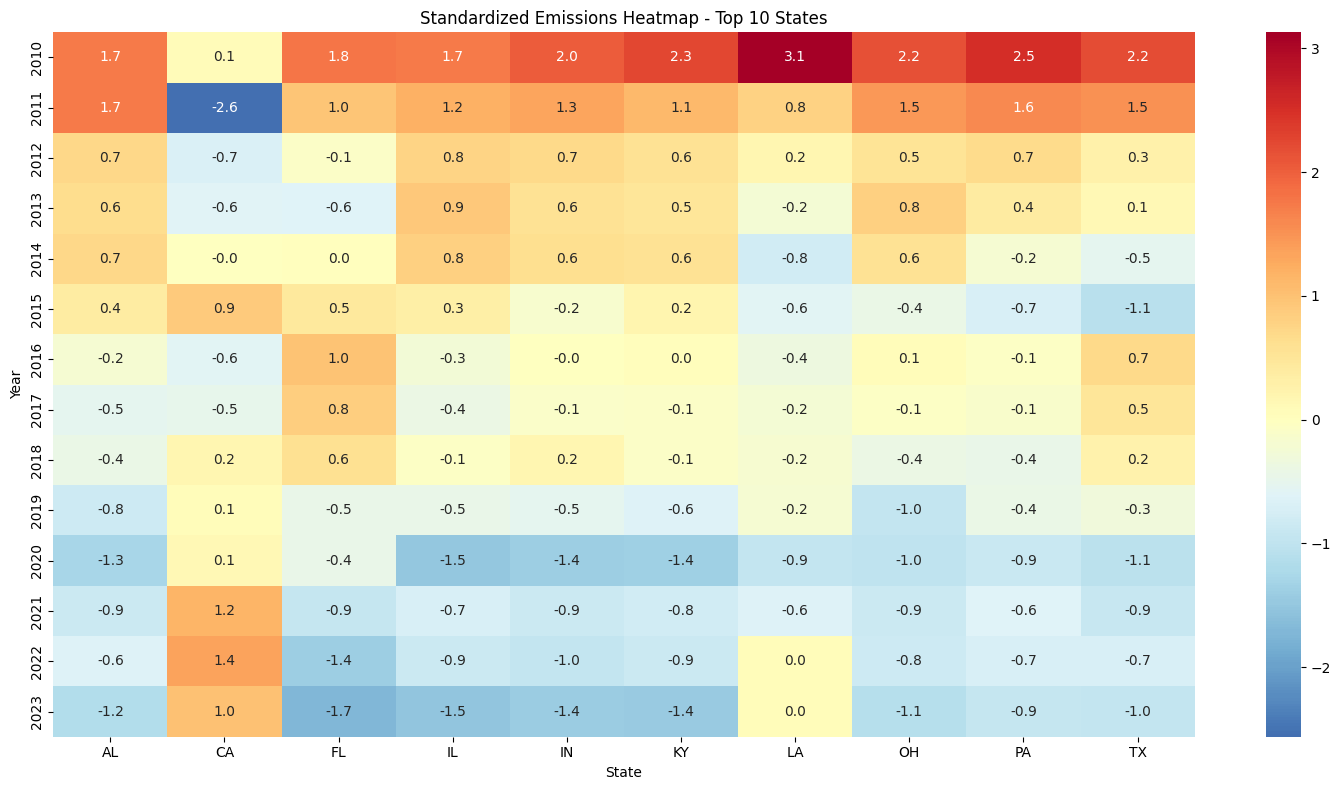


Statistical Summary of Deviations from Trend:

TX:
Mean deviation: 0
Std deviation: 1,386,449
Max positive deviation: 18,168,236
Max negative deviation: -530,187

LA:
Mean deviation: 0
Std deviation: 953,479
Max positive deviation: 12,154,578
Max negative deviation: -378,920

IN:
Mean deviation: 0
Std deviation: 2,044,186
Max positive deviation: 17,144,551
Max negative deviation: -853,556

FL:
Mean deviation: 0
Std deviation: 1,594,957
Max positive deviation: 11,691,280
Max negative deviation: -777,046

PA:
Mean deviation: -0
Std deviation: 1,284,138
Max positive deviation: 15,821,209
Max negative deviation: -502,895

OH:
Mean deviation: 0
Std deviation: 1,544,553
Max positive deviation: 17,098,495
Max negative deviation: -572,405

IL:
Mean deviation: -0
Std deviation: 1,295,075
Max positive deviation: 12,348,505
Max negative deviation: -515,616

CA:
Mean deviation: 0
Std deviation: 558,407
Max positive deviation: 6,214,706
Max negative deviation: -247,774

KY:
Mean deviation: 0
Std d

In [14]:
# Create violin plots to show distribution over years
plt.figure(figsize=(20, 10))
sns.violinplot(data=top_10_data,
               x='Year',
               y='Total reported direct emissions',
               hue='State',
               split=True)
plt.title('Distribution of Emissions Over Years - Top 10 States')
plt.xlabel('Year')
plt.ylabel('Total Emissions (metric tons CO2e)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Create residual plots
plt.figure(figsize=(20, 10))
for i, (_, row) in enumerate(top_10_states.iterrows(), 1):
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]

    # Calculate trend line
    X = state_data['Year'].values.reshape(-1, 1)
    y = state_data['Total reported direct emissions'].values
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    # Calculate residuals
    residuals = y - trend

    # Create subplot
    plt.subplot(2, 5, i)
    plt.scatter(X, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{state_name} Residuals')
    plt.xlabel('Year')
    plt.ylabel('Residual Emissions')

plt.tight_layout()
plt.show()

# Create density plots over time
plt.figure(figsize=(15, 8))
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]

    # Calculate kernel density estimate for each year
    years = state_data['Year'].unique()
    for year in years:
        year_data = state_data[state_data['Year'] == year]['Total reported direct emissions']
        sns.kdeplot(data=year_data, label=f'{state_name} {year}', alpha=0.3)

plt.title('Emission Density Distribution Over Time - Top 10 States')
plt.xlabel('Total Emissions (metric tons CO2e)')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Create heatmap of standardized emissions
plt.figure(figsize=(15, 8))
pivot_data = df_encoded[df_encoded['State'].isin(top_10_states['State'])].pivot_table(
    index='Year',
    columns='State',
    values='Total reported direct emissions',
    aggfunc='mean'
)

# Standardize the data
standardized_data = (pivot_data - pivot_data.mean()) / pivot_data.std()
standardized_data.columns = [reverse_state_mapping[col] for col in standardized_data.columns]

sns.heatmap(standardized_data,
            cmap='RdYlBu_r',
            center=0,
            annot=True,
            fmt='.1f')
plt.title('Standardized Emissions Heatmap - Top 10 States')
plt.xlabel('State')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Print statistical summary of deviations
print("\nStatistical Summary of Deviations from Trend:")
for _, row in top_10_states.iterrows():
    state = row['State']
    state_name = row['State_Name']
    state_data = df_encoded[df_encoded['State'] == state]

    # Calculate trend and residuals
    X = state_data['Year'].values.reshape(-1, 1)
    y = state_data['Total reported direct emissions'].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    residuals = y - trend

    print(f"\n{state_name}:")
    print(f"Mean deviation: {residuals.mean():,.0f}")
    print(f"Std deviation: {residuals.std():,.0f}")
    print(f"Max positive deviation: {residuals.max():,.0f}")
    print(f"Max negative deviation: {residuals.min():,.0f}")


Distribution Analysis for TX
     Total reported direct emissions                                        \
                                mean        median           std      skew   
Year                                                                         
2010                   580116.583490  79043.250000  1.737366e+06  6.127211   
2011                   550274.190922  81405.205000  1.694263e+06  6.446641   
2012                   497517.667068  73394.936000  1.454589e+06  6.010702   
2013                   492022.425243  69983.125000  1.503199e+06  6.214303   
2014                   462994.817715  65434.000000  1.428480e+06  6.287514   
2015                   439637.577417  63927.460000  1.270654e+06  6.123162   
2016                   515146.761846  80757.009000  1.380210e+06  5.487957   
2017                   506589.873012  76356.100000  1.464624e+06  6.036660   
2018                   496217.317308  79042.993000  1.367787e+06  6.192415   
2019                   472470.3871

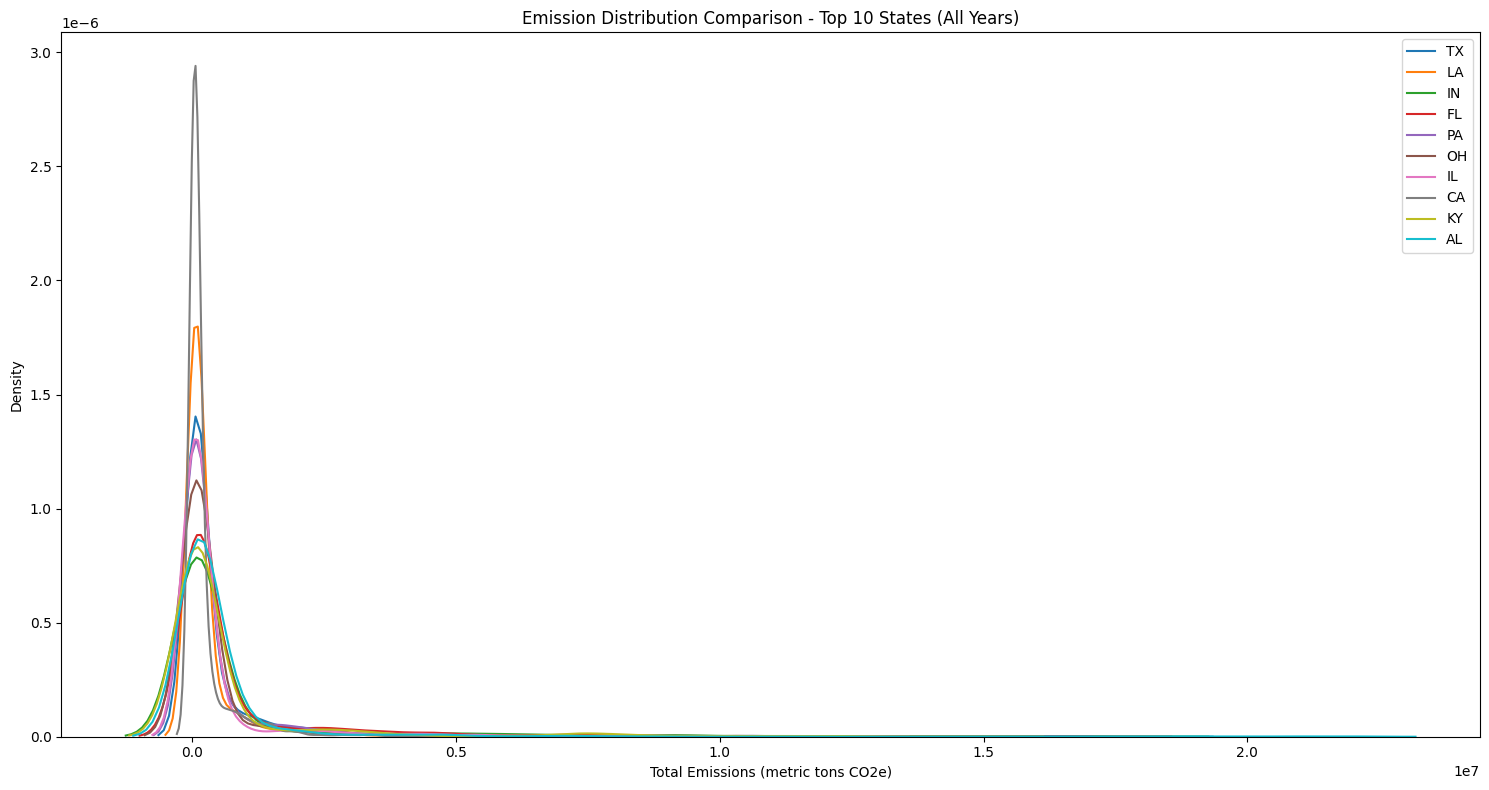

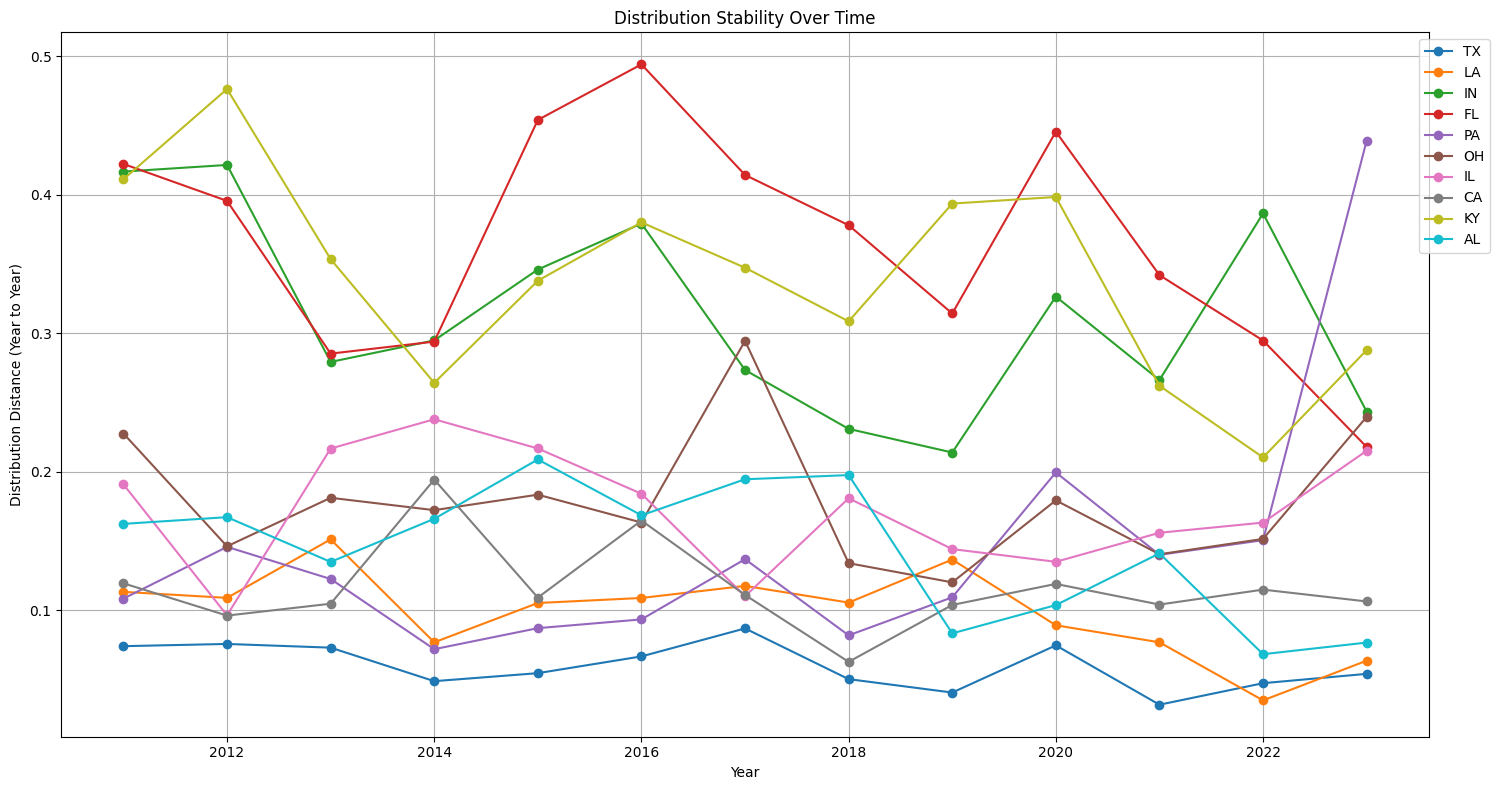

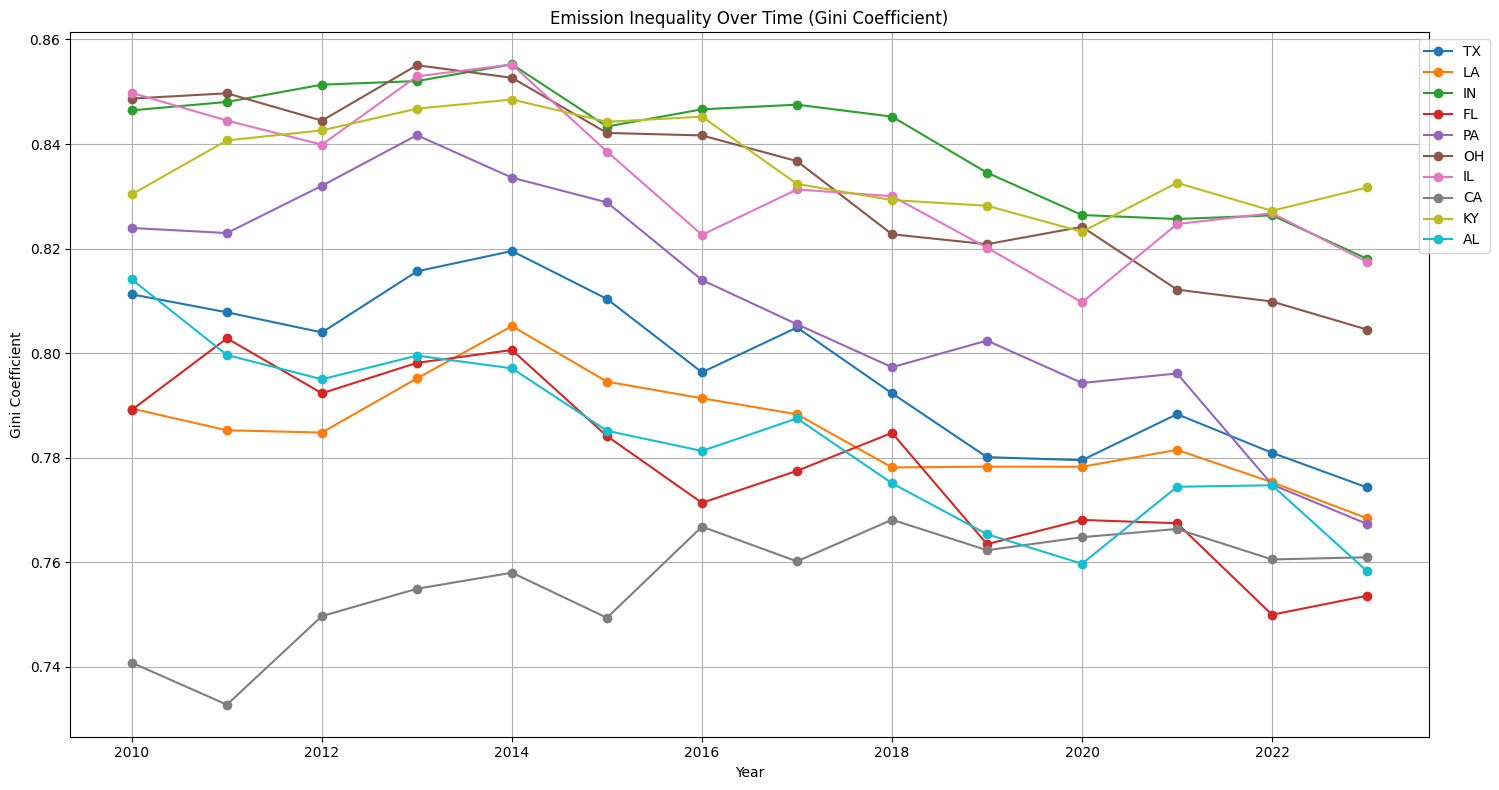

In [15]:
# 1. Analyze changes in distribution characteristics over time
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    print(f"\nDistribution Analysis for {state_name}")

    # Calculate statistics by year
    yearly_stats = df_encoded[df_encoded['State'] == state].groupby('Year').agg({
        'Total reported direct emissions': [
            'mean',
            'median',
            'std',
            'skew',
            lambda x: stats.kurtosis(x),  # Peakedness
            'count'
        ]
    })

    print(yearly_stats)

# 2. Compare distributions between states
plt.figure(figsize=(15, 8))
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    state_data = df_encoded[df_encoded['State'] == state]['Total reported direct emissions']

    # Calculate and plot kernel density estimate
    sns.kdeplot(data=state_data, label=state_name)

plt.title('Emission Distribution Comparison - Top 10 States (All Years)')
plt.xlabel('Total Emissions (metric tons CO2e)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Analyze distribution stability
def calculate_distribution_distance(dist1, dist2, bins=50):
    """Calculate Jensen-Shannon distance between two distributions"""
    hist1, _ = np.histogram(dist1, bins=bins, density=True)
    hist2, _ = np.histogram(dist2, bins=bins, density=True)

    # Add small constant to avoid log(0)
    hist1 = hist1 + 1e-10
    hist2 = hist2 + 1e-10

    # Normalize
    hist1 = hist1 / hist1.sum()
    hist2 = hist2 / hist2.sum()

    return stats.entropy(hist1, hist2)

# Calculate distribution stability over time
plt.figure(figsize=(15, 8))
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    distances = []
    years = sorted(df_encoded['Year'].unique())

    for i in range(len(years)-1):
        dist1 = df_encoded[(df_encoded['State'] == state) &
                          (df_encoded['Year'] == years[i])]['Total reported direct emissions']
        dist2 = df_encoded[(df_encoded['State'] == state) &
                          (df_encoded['Year'] == years[i+1])]['Total reported direct emissions']

        distance = calculate_distribution_distance(dist1, dist2)
        distances.append(distance)

    plt.plot(years[1:], distances, marker='o', label=state_name)

plt.title('Distribution Stability Over Time')
plt.xlabel('Year')
plt.ylabel('Distribution Distance (Year to Year)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Analyze concentration of emissions
def calculate_gini(array):
    """Calculate Gini coefficient of inequality"""
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    return ((np.sum((2 * index - len(array) - 1) * array)) /
            (len(array) * np.sum(array)))

# Calculate Gini coefficient over time for each state
plt.figure(figsize=(15, 8))
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    gini_coeffs = []
    years = sorted(df_encoded['Year'].unique())

    for year in years:
        emissions = df_encoded[(df_encoded['State'] == state) &
                             (df_encoded['Year'] == year)]['Total reported direct emissions']
        gini_coeffs.append(calculate_gini(emissions.values))

    plt.plot(years, gini_coeffs, marker='o', label=state_name)

plt.title('Emission Inequality Over Time (Gini Coefficient)')
plt.xlabel('Year')
plt.ylabel('Gini Coefficient')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 20 Plants by State



In [16]:
# Import for better display
from IPython.display import display, HTML

# Create a function to get top 20 facilities per state
def get_top_facilities_by_state(df, state_name, n=20):
    state_data = df[df['State'] == state_name].copy()

    # Group by facility and get the most recent year's data
    facilities = (state_data.sort_values('Year', ascending=False)
                 .groupby('Facility Id')
                 .first()
                 .reset_index())

    # Sort by emissions and get top n
    top_facilities = (facilities.sort_values('Total reported direct emissions', ascending=False)
                     .head(n))

    return top_facilities

# Get top 20 facilities for each state
all_top_facilities = []
for state in top_10_states['State']:
    state_name = reverse_state_mapping[state]
    top_facilities = get_top_facilities_by_state(df_encoded, state)
    top_facilities['State_Name'] = state_name
    all_top_facilities.append(top_facilities)

# Combine all results
top_facilities_df = pd.concat(all_top_facilities)

# Select and rename columns
columns_to_display = [
    'State_Name',
    'Facility Name',
    'Facility Id',
    'Year',
    'Total reported direct emissions',
    'Industry Type (sectors)',
    'City',
    'County',
    'Does the facility employ continuous emissions monitoring? '
]

formatted_top = top_facilities_df[columns_to_display].copy()
formatted_top.columns = [
    'State',
    'Facility Name',
    'Facility ID',
    'Year',
    'Total Emissions (CO2e)',
    'Industry Type',
    'City',
    'County',
    'Uses Continuous Monitoring'
]

# Format emissions numbers
formatted_top['Total Emissions (CO2e)'] = formatted_top['Total Emissions (CO2e)'].astype(float)  # Convert to float for sorting
formatted_top['Total Emissions (CO2e)'] = formatted_top['Total Emissions (CO2e)'].map('{:,.0f}'.format)

# Create scrollable table style
style = """
<style>
    .dataframe-div {
        max-height: 600px;
        overflow: auto;
        margin: 10px;
        border: 1px solid #ddd;
    }
    table {
        font-size: 12px;
        width: 100%;
    }
    th {
        background-color: #f2f2f2;
        position: sticky;
        top: 0;
    }
</style>
"""

# Display each state's data in a scrollable format
for state in formatted_top['State'].unique():
    print(f"\nTop 20 Facilities in {state} (Ordered from Lowest to Highest Emissions):")
    print("=" * 100)
    state_facilities = formatted_top[formatted_top['State'] == state].copy()

    # Convert emissions back to numeric for sorting
    state_facilities['Emissions_Numeric'] = state_facilities['Total Emissions (CO2e)'].str.replace(',', '').astype(float)

    # Sort by emissions (ascending) and drop helper column
    state_facilities = state_facilities.sort_values('Emissions_Numeric', ascending=True)
    state_facilities = state_facilities.drop('Emissions_Numeric', axis=1)

    # Create scrollable display
    display(HTML(style + f"""
        <div class="dataframe-div">
            {state_facilities.to_html(index=False)}
        </div>
    """))

    # Print summary statistics for the state
    state_data = df_encoded[df_encoded['State'] == state_facilities['State'].iloc[0]]
    print(f"\nSummary Statistics for {state}:")
    print(f"Total number of facilities: {len(state_data['Facility Id'].unique())}")
    print(f"Most common industry types:")
    print(state_data['Industry Type (sectors)'].value_counts().head(3))
    print("-" * 100)

# Additional summary statistics
print("\nIndustry Distribution in Top Facilities:")
print(formatted_top['Industry Type'].value_counts())

print("\nCities with Most Top Facilities:")
print(formatted_top['City'].value_counts().head(10))

print("\nMonitoring Systems Usage:")
print(formatted_top['Uses Continuous Monitoring'].value_counts())


Top 20 Facilities in TX (Ordered from Lowest to Highest Emissions):



Summary Statistics for TX:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in LA (Ordered from Lowest to Highest Emissions):



Summary Statistics for LA:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in IN (Ordered from Lowest to Highest Emissions):



Summary Statistics for IN:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in FL (Ordered from Lowest to Highest Emissions):



Summary Statistics for FL:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in PA (Ordered from Lowest to Highest Emissions):



Summary Statistics for PA:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in OH (Ordered from Lowest to Highest Emissions):



Summary Statistics for OH:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in IL (Ordered from Lowest to Highest Emissions):



Summary Statistics for IL:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in CA (Ordered from Lowest to Highest Emissions):



Summary Statistics for CA:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in KY (Ordered from Lowest to Highest Emissions):



Summary Statistics for KY:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Top 20 Facilities in AL (Ordered from Lowest to Highest Emissions):



Summary Statistics for AL:
Total number of facilities: 0
Most common industry types:
Series([], Name: count, dtype: int64)
----------------------------------------------------------------------------------------------------

Industry Distribution in Top Facilities:
Industry Type
Power Plants                                                                                    130
Petroleum Product Suppliers,Refineries                                                            9
Minerals                                                                                          7
Chemicals,Petroleum Product Suppliers,Refineries                                                  6
Metals                                                                                            6
Petroleum and Natural Gas Systems                                                                 5
Other                                                                                             5
Chemicals          

#

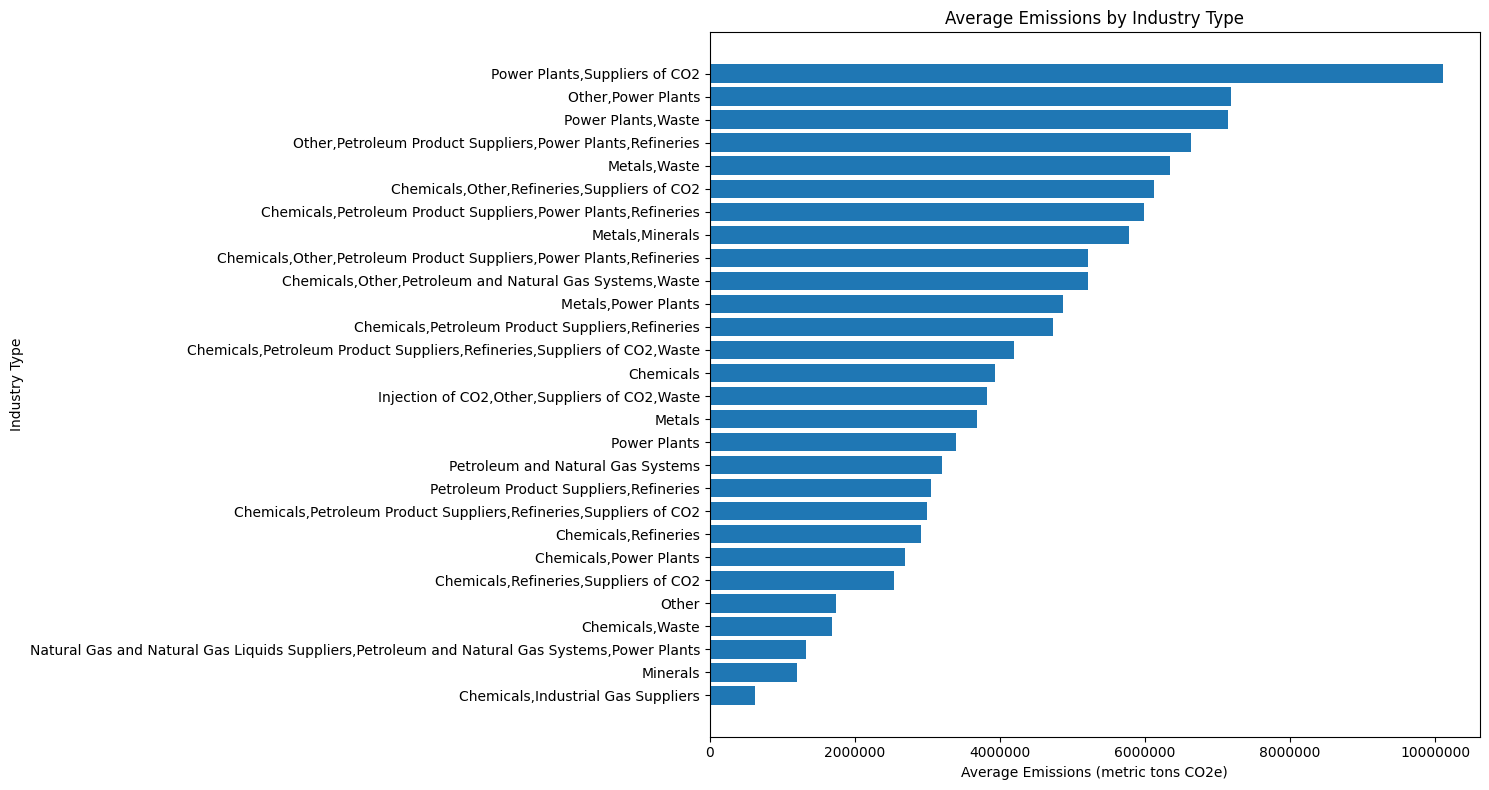

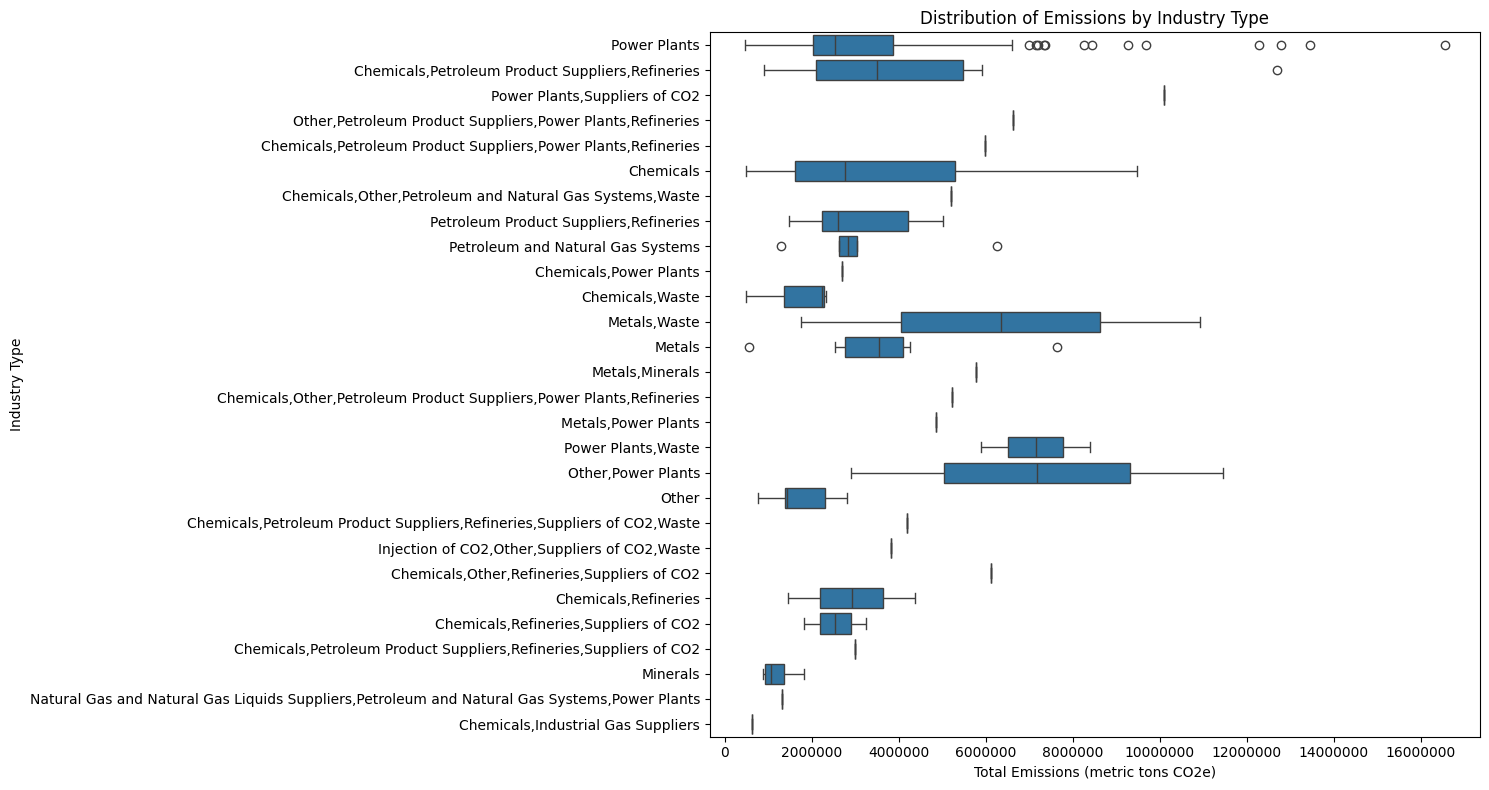

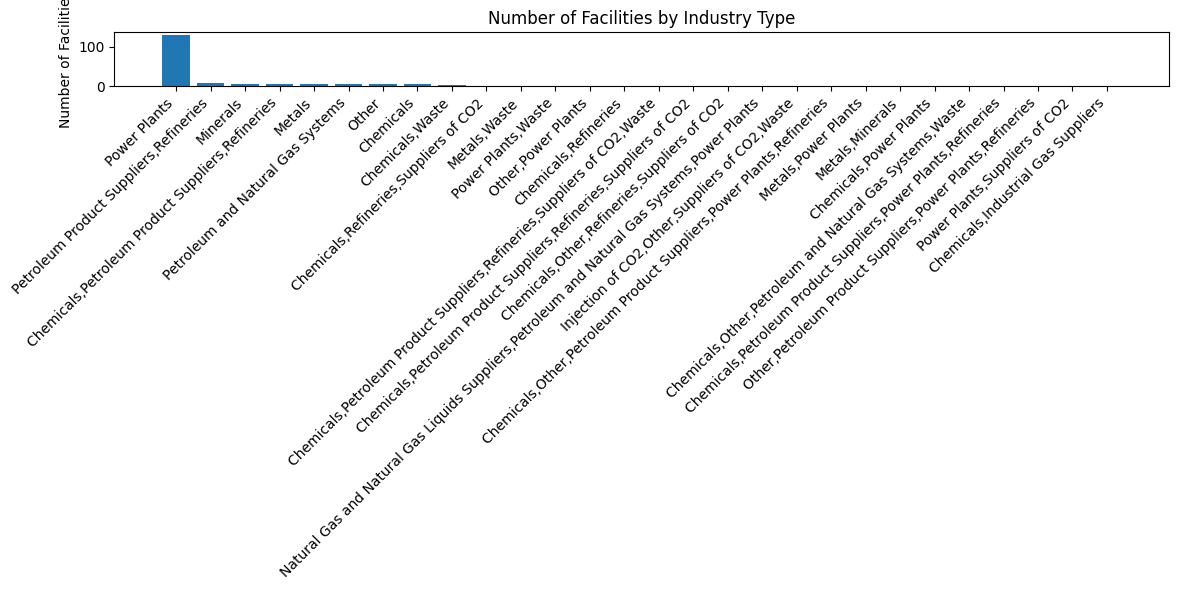

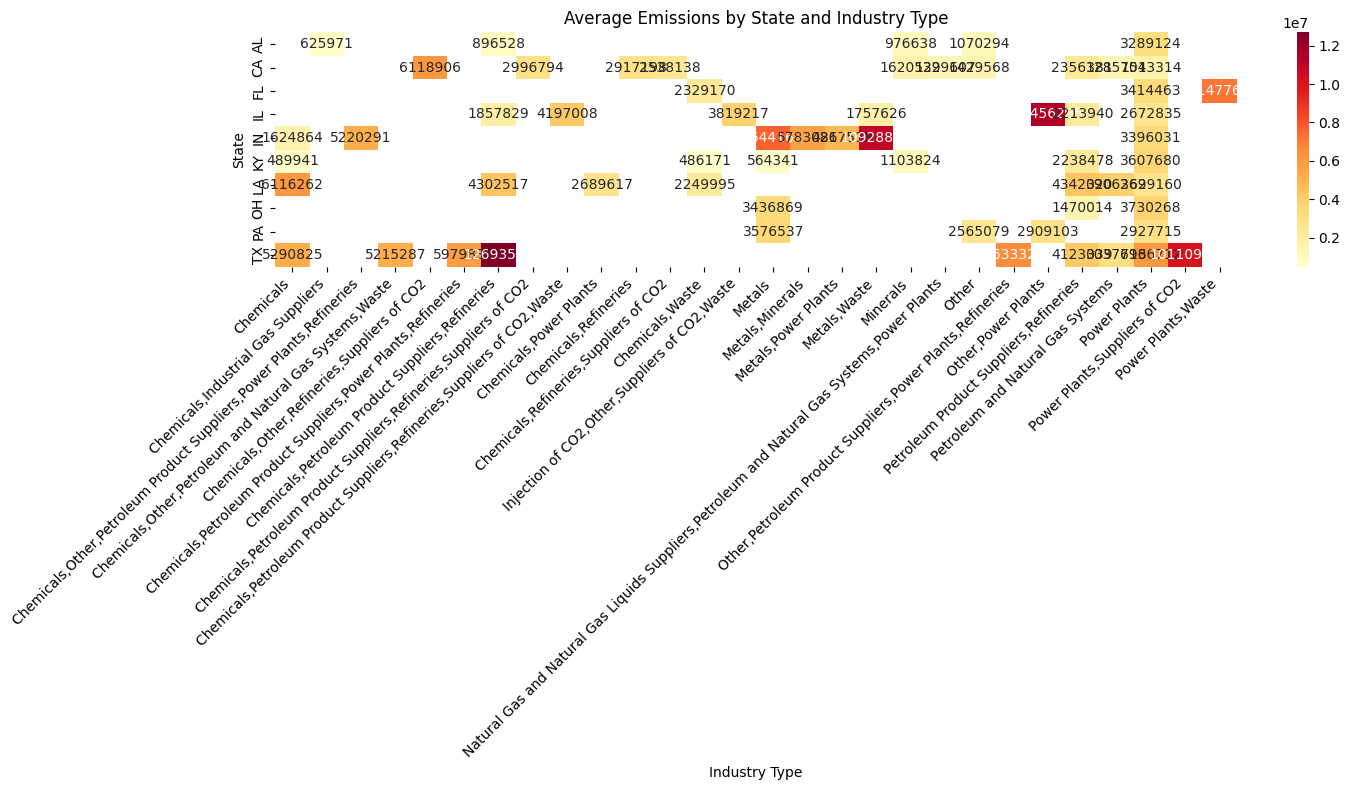


Summary Statistics by Industry Type:
                                                   Emissions_Numeric  \
                                                               count   
Industry Type                                                          
Chemicals                                                          5   
Chemicals,Industrial Gas Suppliers                                 1   
Chemicals,Other,Petroleum Product Suppliers,Pow...                 1   
Chemicals,Other,Petroleum and Natural Gas Syste...                 1   
Chemicals,Other,Refineries,Suppliers of CO2                        1   
Chemicals,Petroleum Product Suppliers,Power Pla...                 1   
Chemicals,Petroleum Product Suppliers,Refineries                   6   
Chemicals,Petroleum Product Suppliers,Refinerie...                 1   
Chemicals,Petroleum Product Suppliers,Refinerie...                 1   
Chemicals,Power Plants                                             1   
Chemicals,Refineries      

<ipython-input-17-aa72b456129a>:72: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

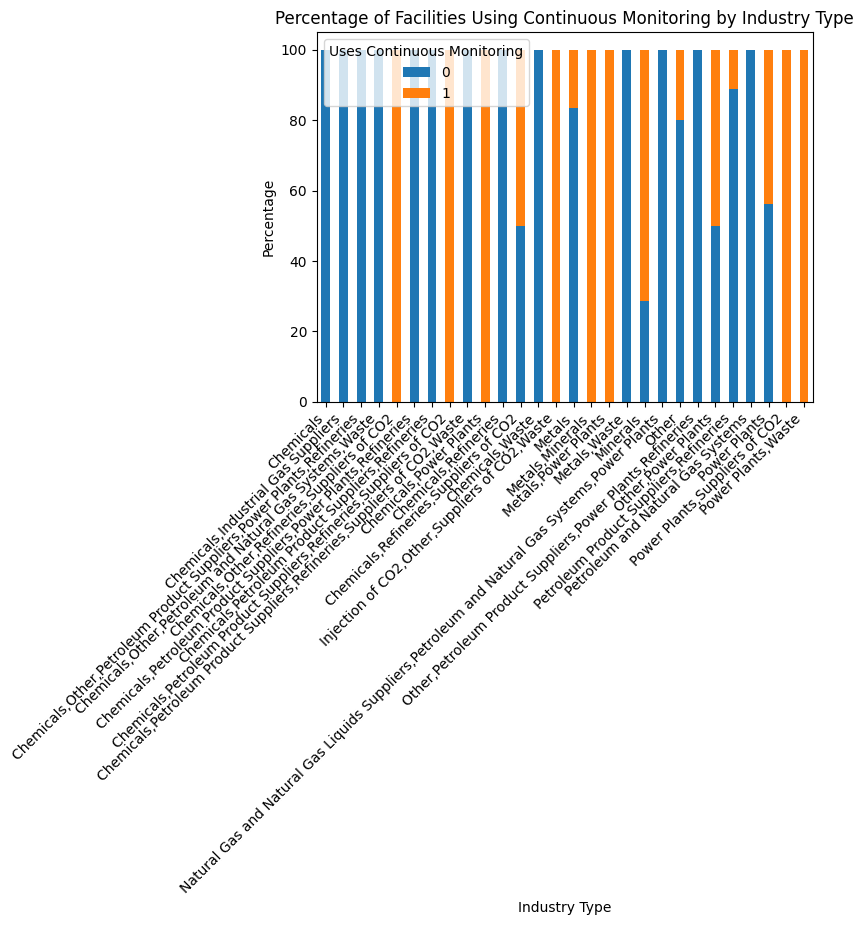


Top 5 Emitters by Industry Type:

Power Plants:
         Facility Name State Total Emissions (CO2e)
139  James H Miller Jr    AL             16,558,381
41       Gen J M Gavin    OH             13,451,174
693        Martin Lake    TX             12,787,949
694          Oak Grove    TX             12,278,594
100              Ghent    KY              9,677,872

Chemicals,Petroleum Product Suppliers,Refineries:
                                         Facility Name State  \
699                                 EXXONMOBIL Bt Site    TX   
309  EXXONMOBIL BATON ROUGE REFINERY AND CHEMICAL P...    LA   
238                        Norco Manufacturing Complex    LA   
337              Valero Refining - New Orleans, L.L.C.    LA   
16                                     Lemont Refinery    IL   

    Total Emissions (CO2e)  
699             12,693,547  
309              5,914,862  
238              4,143,881  
337              2,848,808  
16               1,857,829  

Power Plants,Suppliers of CO

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert emissions to numeric, removing commas
formatted_top['Emissions_Numeric'] = formatted_top['Total Emissions (CO2e)'].str.replace(',', '').astype(float)

# 1. Bar plot of average emissions by industry type
plt.figure(figsize=(15, 8))
industry_avg = formatted_top.groupby('Industry Type')['Emissions_Numeric'].mean().sort_values()
plt.barh(industry_avg.index, industry_avg.values)
plt.title('Average Emissions by Industry Type')
plt.xlabel('Average Emissions (metric tons CO2e)')
plt.ylabel('Industry Type')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# 2. Box plot showing distribution
plt.figure(figsize=(15, 8))
sns.boxplot(data=formatted_top,
            x='Emissions_Numeric',
            y='Industry Type',
            orient='h')
plt.title('Distribution of Emissions by Industry Type')
plt.xlabel('Total Emissions (metric tons CO2e)')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# 3. Facility count by industry type
plt.figure(figsize=(12, 6))
facility_counts = formatted_top['Industry Type'].value_counts()
plt.bar(facility_counts.index, facility_counts.values)
plt.title('Number of Facilities by Industry Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Facilities')
plt.tight_layout()
plt.show()

# 4. State and Industry Type Heatmap
plt.figure(figsize=(15, 8))
pivot_table = pd.pivot_table(formatted_top,
                            values='Emissions_Numeric',
                            index='State',
                            columns='Industry Type',
                            aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Emissions by State and Industry Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Print summary statistics by industry type
summary_stats = formatted_top.groupby('Industry Type').agg({
    'Emissions_Numeric': ['count', 'mean', 'std', 'min', 'max']
}).round(2)

print("\nSummary Statistics by Industry Type:")
print(summary_stats)

# 6. Continuous Monitoring Analysis by Industry
plt.figure(figsize=(12, 6))
monitoring_by_industry = pd.crosstab(formatted_top['Industry Type'],
                                    formatted_top['Uses Continuous Monitoring'],
                                    normalize='index') * 100
monitoring_by_industry.plot(kind='bar', stacked=True)
plt.title('Percentage of Facilities Using Continuous Monitoring by Industry Type')
plt.xlabel('Industry Type')
plt.ylabel('Percentage')
plt.legend(title='Uses Continuous Monitoring')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Top Emitters by Industry (Top 5 for each)
print("\nTop 5 Emitters by Industry Type:")
for industry in formatted_top['Industry Type'].unique():
    print(f"\n{industry}:")
    industry_data = formatted_top[formatted_top['Industry Type'] == industry]
    print(industry_data.nlargest(5, 'Emissions_Numeric')[['Facility Name', 'State', 'Total Emissions (CO2e)']])

# Looking into Monitoring Status
## First top 20, then overall


<ipython-input-18-40a0349231cf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=power_plants,


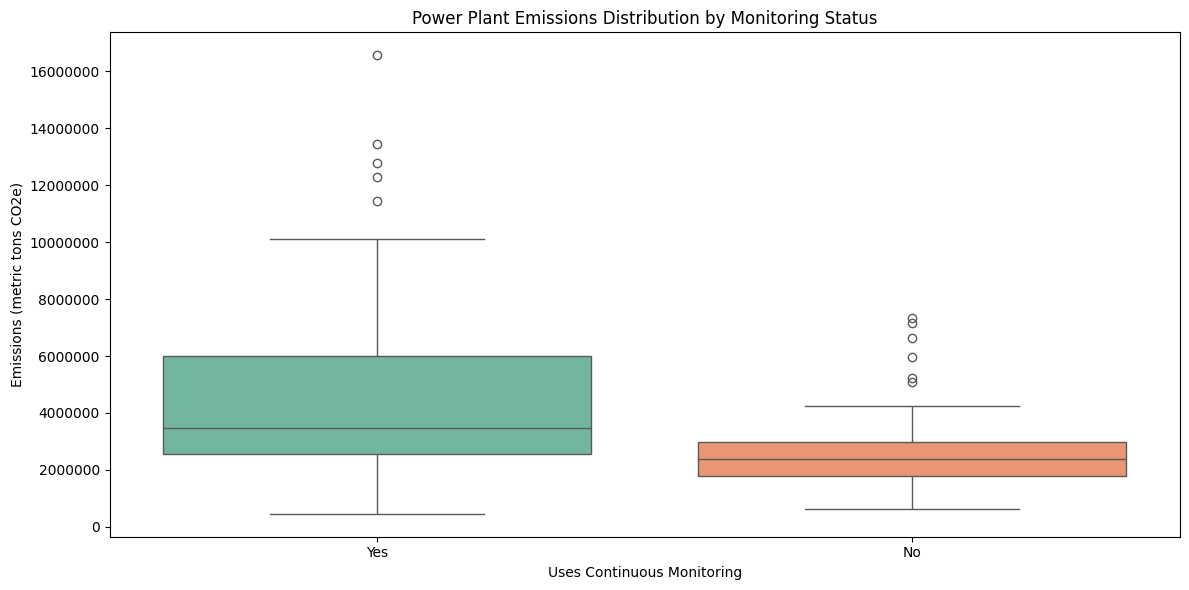

<ipython-input-18-40a0349231cf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=power_plants,


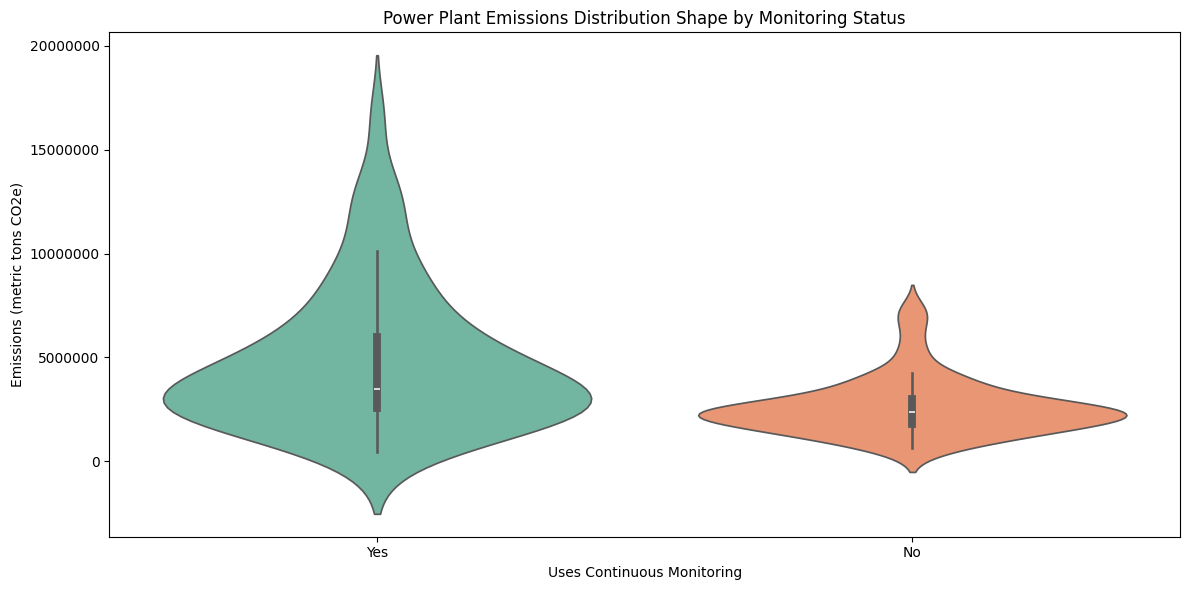

<Figure size 1500x800 with 0 Axes>

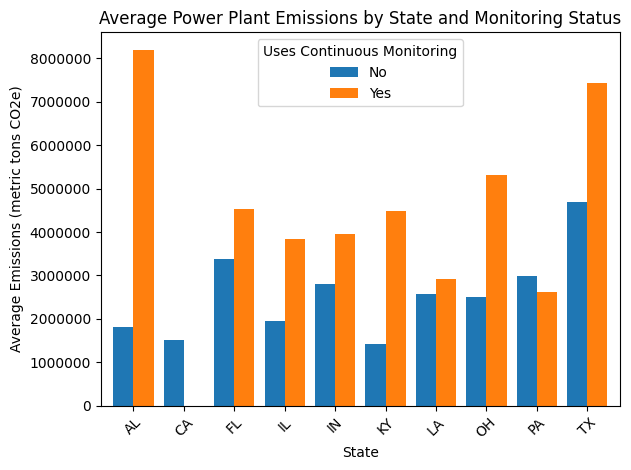


Statistical Summary of Power Plant Emissions by Monitoring Status:
                   count        mean     median         std       min  \
Monitoring_Status                                                       
No                    78  2607054.47  2381640.0  1367718.71  640818.0   
Yes                   63  4820896.49  3469290.0  3411065.83  461191.0   

                          max  
Monitoring_Status              
No                  7346998.0  
Yes                16558381.0  

t-test Results:
t-statistic: 5.2378
p-value: 0.0000


<Figure size 1200x600 with 0 Axes>

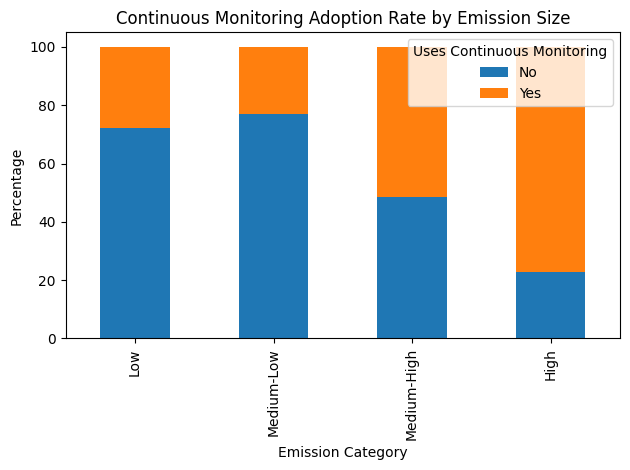


Monitoring Status Distribution:

Counts:
Monitoring_Status
No     78
Yes    63
Name: count, dtype: int64

Percentages:
Monitoring_Status
No     55.32
Yes    44.68
Name: proportion, dtype: float64 %

Top 10 Power Plants by Monitoring Status:

Power Plants No Continuous Monitoring:
                       Facility Name State Total Emissions (CO2e) Monitoring_Status
48    Hatfield's Ferry Power Station    PA              7,346,998                No
162        West County Energy Center    FL              7,147,924                No
495           Galveston Bay Refinery    TX              6,633,324                No
736     Exxonmobil Beaumont Refinery    TX              5,979,837                No
176         BP Whiting Business Unit    IN              5,220,291                No
17           Plant H. Allen Franklin    AL              5,078,422                No
25              Hines Energy Complex    FL              4,241,787                No
6    Hanging Rock Power Company, LLC    OH    

In [18]:
# Filter for power plants and create numeric emissions column
power_plants = formatted_top[formatted_top['Industry Type'].str.contains('Power Plants', na=False)].copy()
power_plants['Emissions_Numeric'] = power_plants['Total Emissions (CO2e)'].str.replace(',', '').astype(float)

# Convert monitoring status to Yes/No for clarity
power_plants['Monitoring_Status'] = power_plants['Uses Continuous Monitoring'].map({0: 'No', 1: 'Yes'})

# 1. Box plot comparing emissions by monitoring status
plt.figure(figsize=(12, 6))
sns.boxplot(data=power_plants,
            x='Monitoring_Status',
            y='Emissions_Numeric',
            palette='Set2')
plt.title('Power Plant Emissions Distribution by Monitoring Status')
plt.xlabel('Uses Continuous Monitoring')
plt.ylabel('Emissions (metric tons CO2e)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 2. Violin plot to show distribution shape
plt.figure(figsize=(12, 6))
sns.violinplot(data=power_plants,
               x='Monitoring_Status',
               y='Emissions_Numeric',
               palette='Set2')
plt.title('Power Plant Emissions Distribution Shape by Monitoring Status')
plt.xlabel('Uses Continuous Monitoring')
plt.ylabel('Emissions (metric tons CO2e)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 3. State-wise monitoring adoption and average emissions
plt.figure(figsize=(15, 8))
monitoring_by_state = pd.pivot_table(power_plants,
                                   values='Emissions_Numeric',
                                   index='State',
                                   columns='Monitoring_Status',
                                   aggfunc='mean')
monitoring_by_state.plot(kind='bar', width=0.8)
plt.title('Average Power Plant Emissions by State and Monitoring Status')
plt.xlabel('State')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.legend(title='Uses Continuous Monitoring')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Print statistical summary
print("\nStatistical Summary of Power Plant Emissions by Monitoring Status:")
monitoring_stats = power_plants.groupby('Monitoring_Status')['Emissions_Numeric'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
]).round(2)
print(monitoring_stats)

# 5. Perform t-test
monitoring_yes = power_plants[power_plants['Monitoring_Status'] == 'Yes']['Emissions_Numeric']
monitoring_no = power_plants[power_plants['Monitoring_Status'] == 'No']['Emissions_Numeric']
t_stat, p_value = stats.ttest_ind(monitoring_yes, monitoring_no)
print(f"\nt-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 6. Monitoring adoption rate by emission size
power_plants['Emission_Category'] = pd.qcut(power_plants['Emissions_Numeric'],
                                          q=4,
                                          labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
plt.figure(figsize=(12, 6))
monitoring_by_size = pd.crosstab(power_plants['Emission_Category'],
                                power_plants['Monitoring_Status'],
                                normalize='index') * 100
monitoring_by_size.plot(kind='bar', stacked=True)
plt.title('Continuous Monitoring Adoption Rate by Emission Size')
plt.xlabel('Emission Category')
plt.ylabel('Percentage')
plt.legend(title='Uses Continuous Monitoring')
plt.tight_layout()
plt.show()

# 7. Print counts and percentages
print("\nMonitoring Status Distribution:")
monitoring_counts = power_plants['Monitoring_Status'].value_counts()
monitoring_percentages = power_plants['Monitoring_Status'].value_counts(normalize=True) * 100
print("\nCounts:")
print(monitoring_counts)
print("\nPercentages:")
print(monitoring_percentages.round(2), "%")

# 8. Top 10 power plants in each monitoring category
print("\nTop 10 Power Plants by Monitoring Status:")
for status in ['No', 'Yes']:
    print(f"\nPower Plants {status} Continuous Monitoring:")
    top_plants = power_plants[power_plants['Monitoring_Status'] == status].nlargest(10, 'Emissions_Numeric')
    print(top_plants[['Facility Name', 'State', 'Total Emissions (CO2e)', 'Monitoring_Status']].to_string())

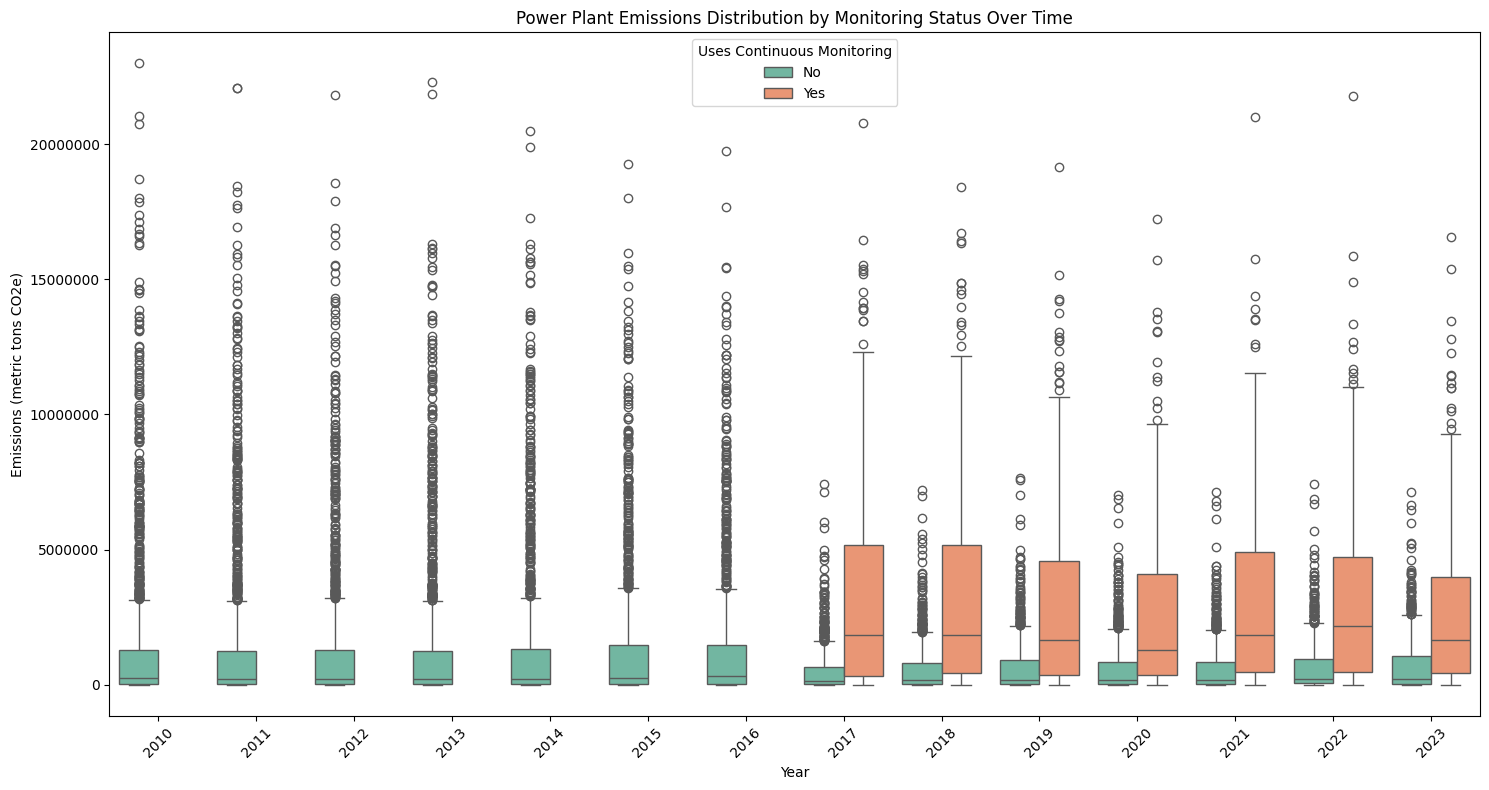

<Figure size 1200x600 with 0 Axes>

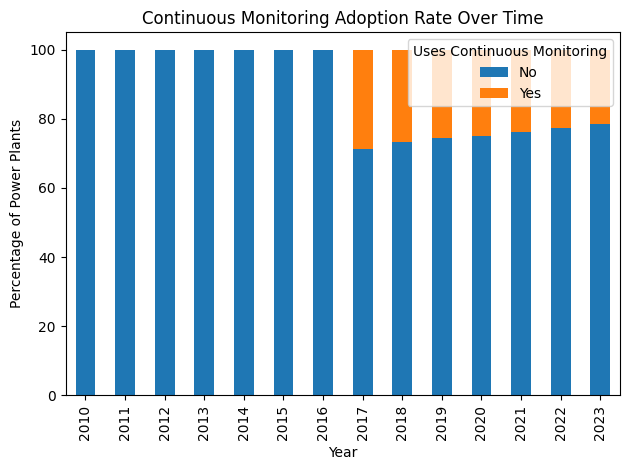

<Figure size 1200x600 with 0 Axes>

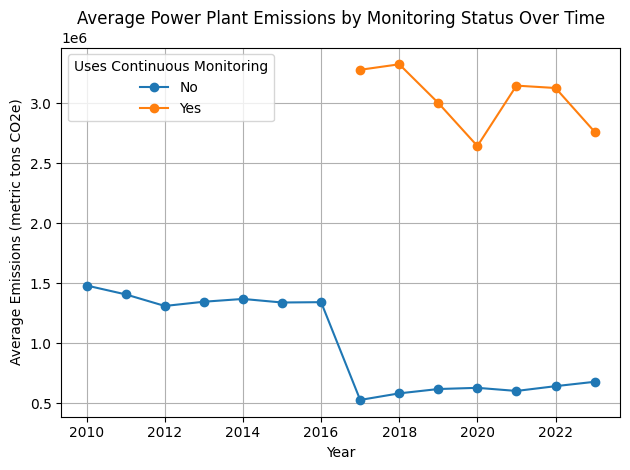

Streaming output truncated to the last 5000 lines.
72171  2020  Metro Nashville District Energy System     45                No
78702  2021  Metro Nashville District Energy System     45                No
85233  2022  Metro Nashville District Energy System     45                No
91711  2023  Metro Nashville District Energy System     45                No

Facility ID: 1003568
       Year                                      Facility Name  State  \
1463   2010  Colorado Energy Nations Company LLC (Golden Fa...      6   
7860   2011  Colorado Energy Nations Company LLC (Golden Fa...      6   
14798  2012  Colorado Energy Nations Company LLC (Golden Fa...      6   
21906  2013  Colorado Energy Nations Company LLC (Golden Fa...      6   
31830  2014              Molson Coors USA LLC - Golden Brewery      6   
39112  2015              Molson Coors USA LLC - Golden Brewery      6   
45984  2016              Molson Coors USA LLC - Golden Brewery      6   
52521  2017              Molson Coo

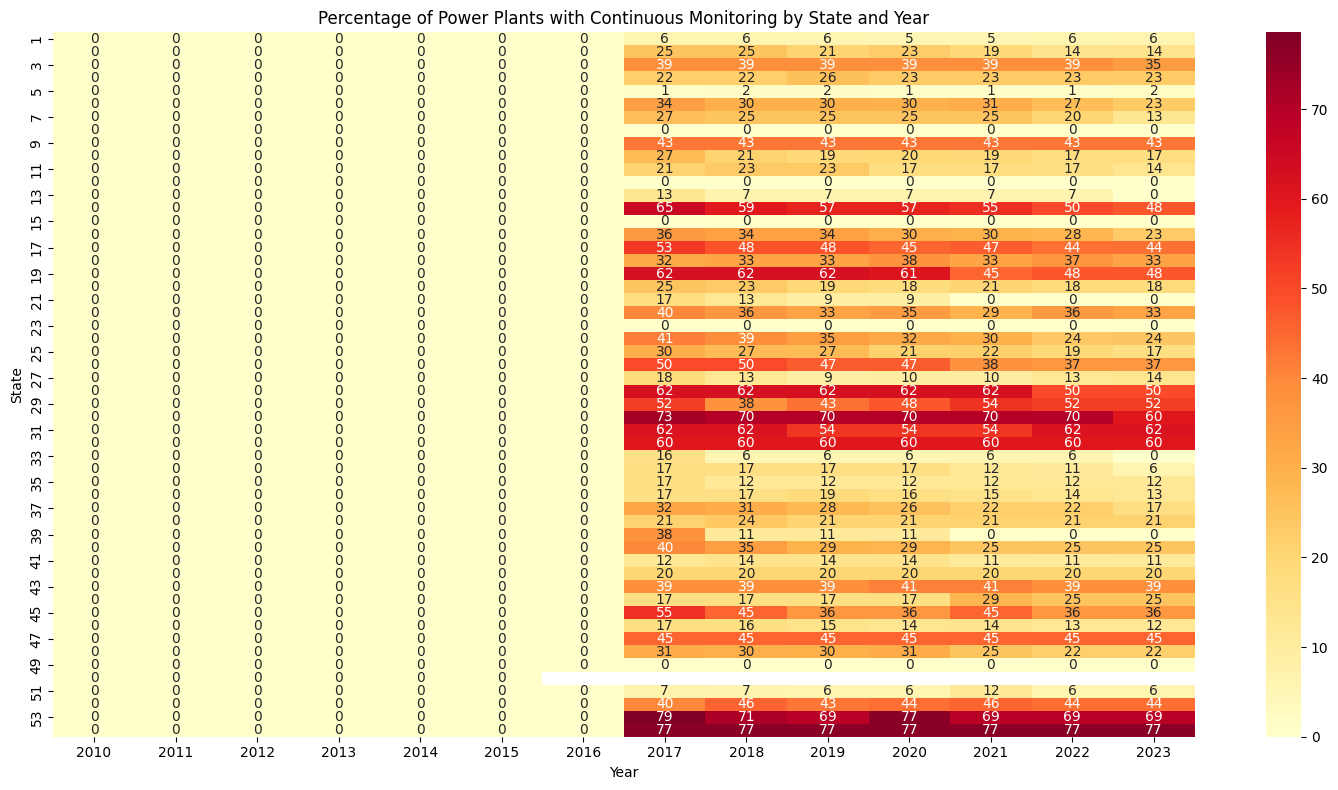


Overall Statistics:
Total number of power plant observations: 20281
Number of unique facilities: 1801

Monitoring Status Distribution (all years):
Monitoring_Status
No     88.4
Yes    11.6
Name: proportion, dtype: float64 %


In [19]:
# Get all power plant data from the original dataset
all_power_plants = df_encoded[df_encoded['Industry Type (sectors)'].str.contains('Power Plants', na=False)].copy()

# Create numeric emissions column and monitoring status
all_power_plants['Emissions_Numeric'] = all_power_plants['Total reported direct emissions']
all_power_plants['Monitoring_Status'] = all_power_plants['Does the facility employ continuous emissions monitoring? '].map({0: 'No', 1: 'Yes'})

# 1. Box plot comparing emissions by monitoring status and year
plt.figure(figsize=(15, 8))
sns.boxplot(data=all_power_plants,
            x='Year',
            y='Emissions_Numeric',
            hue='Monitoring_Status',
            palette='Set2')
plt.title('Power Plant Emissions Distribution by Monitoring Status Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (metric tons CO2e)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend(title='Uses Continuous Monitoring')
plt.tight_layout()
plt.show()

# 2. Monitoring adoption rate over time
plt.figure(figsize=(12, 6))
monitoring_trend = pd.crosstab(all_power_plants['Year'],
                              all_power_plants['Monitoring_Status'],
                              normalize='index') * 100
monitoring_trend.plot(kind='bar', stacked=True)
plt.title('Continuous Monitoring Adoption Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Power Plants')
plt.legend(title='Uses Continuous Monitoring')
plt.tight_layout()
plt.show()

# 3. Average emissions by monitoring status over time
plt.figure(figsize=(12, 6))
yearly_avg = all_power_plants.groupby(['Year', 'Monitoring_Status'])['Emissions_Numeric'].mean().unstack()
yearly_avg.plot(marker='o')
plt.title('Average Power Plant Emissions by Monitoring Status Over Time')
plt.xlabel('Year')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.legend(title='Uses Continuous Monitoring')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Print summary statistics by year
print("\nYearly Summary of Power Plant Monitoring Status:")
yearly_stats = all_power_plants.groupby('Year').agg({
    'Monitoring_Status': ['count', lambda x: (x == 'Yes').mean() * 100],
    'Emissions_Numeric': ['mean', 'median']
}).round(2)
yearly_stats.columns = ['Total Plants', '% Monitored', 'Mean Emissions', 'Median Emissions']
print(yearly_stats)

# 5. Consistency analysis - check if facilities change monitoring status
facility_monitoring = all_power_plants.pivot_table(
    index='Facility Id',
    columns='Year',
    values='Monitoring_Status',
    aggfunc='first'
)

# Check for facilities that changed monitoring status
changed_monitoring = facility_monitoring.apply(lambda x: len(x.unique()) > 1, axis=1)
facilities_changed = changed_monitoring[changed_monitoring].index

print("\nMonitoring Status Changes:")
print(f"Number of facilities that changed monitoring status: {len(facilities_changed)}")

if len(facilities_changed) > 0:
    print("\nFacilities that changed monitoring status:")
    for facility in facilities_changed:
        facility_data = all_power_plants[all_power_plants['Facility Id'] == facility]
        print(f"\nFacility ID: {facility}")
        print(facility_data[['Year', 'Facility Name', 'State', 'Monitoring_Status']].sort_values('Year'))

# 6. State-wise monitoring adoption over time
plt.figure(figsize=(15, 8))
state_monitoring = pd.crosstab([all_power_plants['State'], all_power_plants['Year']],
                              all_power_plants['Monitoring_Status'],
                              normalize='index') * 100
state_monitoring_pivot = state_monitoring.reset_index().pivot(index='State', columns='Year', values='Yes')

sns.heatmap(state_monitoring_pivot,
            cmap='YlOrRd',
            annot=True,
            fmt='.0f')
plt.title('Percentage of Power Plants with Continuous Monitoring by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# 7. Print overall statistics
print("\nOverall Statistics:")
print(f"Total number of power plant observations: {len(all_power_plants)}")
print(f"Number of unique facilities: {all_power_plants['Facility Id'].nunique()}")
print("\nMonitoring Status Distribution (all years):")
print(all_power_plants['Monitoring_Status'].value_counts(normalize=True).round(3) * 100, "%")

<Figure size 1500x800 with 0 Axes>

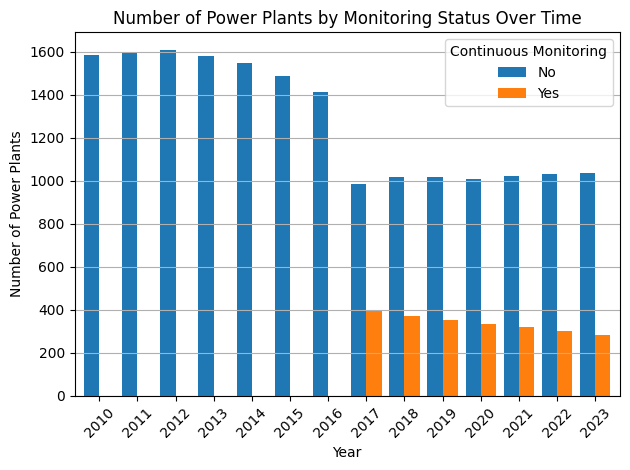

<Figure size 1500x800 with 0 Axes>

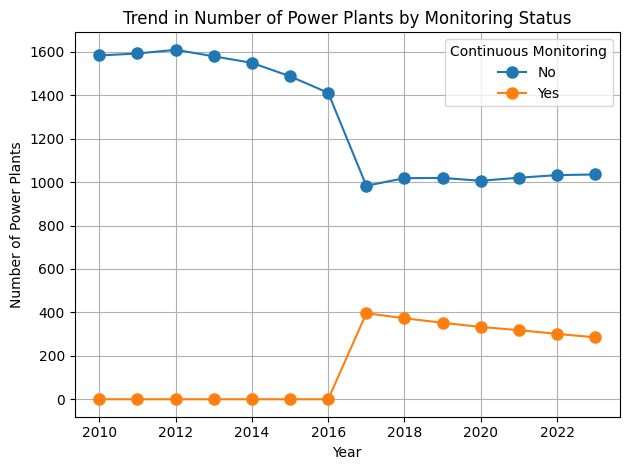

<Figure size 1500x800 with 0 Axes>

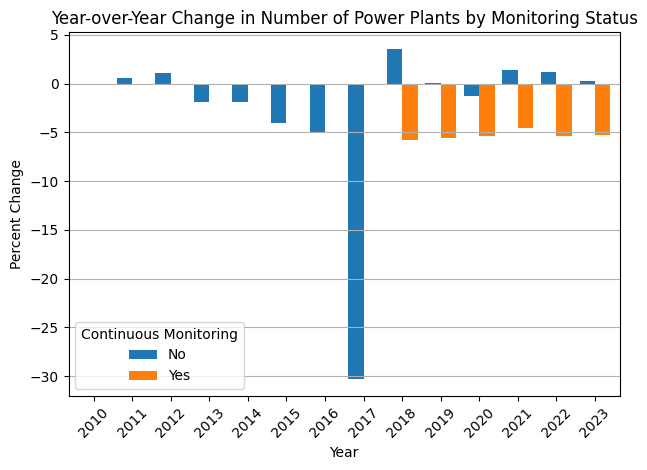


Yearly Statistics:

Number of Plants:
Monitoring_Status      No    Yes
Year                            
2010               1583.0    0.0
2011               1592.0    0.0
2012               1609.0    0.0
2013               1579.0    0.0
2014               1549.0    0.0
2015               1487.0    0.0
2016               1411.0    0.0
2017                983.0  396.0
2018               1018.0  373.0
2019               1019.0  352.0
2020               1006.0  333.0
2021               1020.0  318.0
2022               1032.0  301.0
2023               1035.0  285.0

Year-over-Year Change (%):
Monitoring_Status     No   Yes
Year                          
2010                 NaN   NaN
2011                0.57   NaN
2012                1.07   NaN
2013               -1.86   NaN
2014               -1.90   NaN
2015               -4.00   NaN
2016               -5.11   NaN
2017              -30.33   inf
2018                3.56 -5.81
2019                0.10 -5.63
2020               -1.28 -5.40
20

<Figure size 1500x800 with 0 Axes>

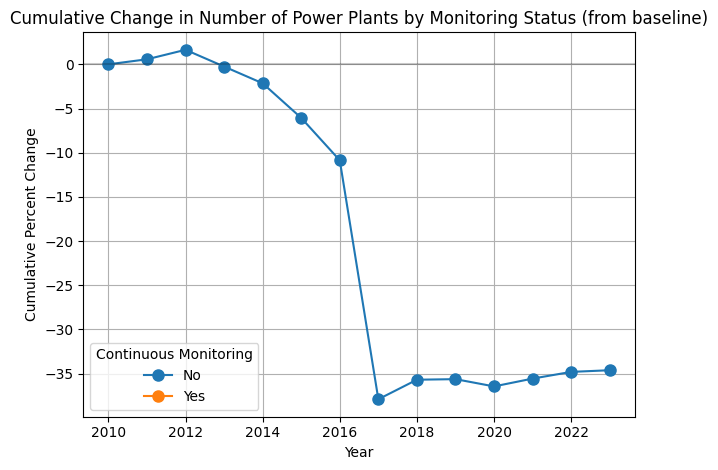


Comprehensive Summary:
      Total Plants  Monitored Plants  Non-Monitored Plants  Percent Monitored  \
Year                                                                            
2010        1583.0               0.0                1583.0               0.00   
2011        1592.0               0.0                1592.0               0.00   
2012        1609.0               0.0                1609.0               0.00   
2013        1579.0               0.0                1579.0               0.00   
2014        1549.0               0.0                1549.0               0.00   
2015        1487.0               0.0                1487.0               0.00   
2016        1411.0               0.0                1411.0               0.00   
2017        1379.0             396.0                 983.0              28.72   
2018        1391.0             373.0                1018.0              26.82   
2019        1371.0             352.0                1019.0              25.67   
2020

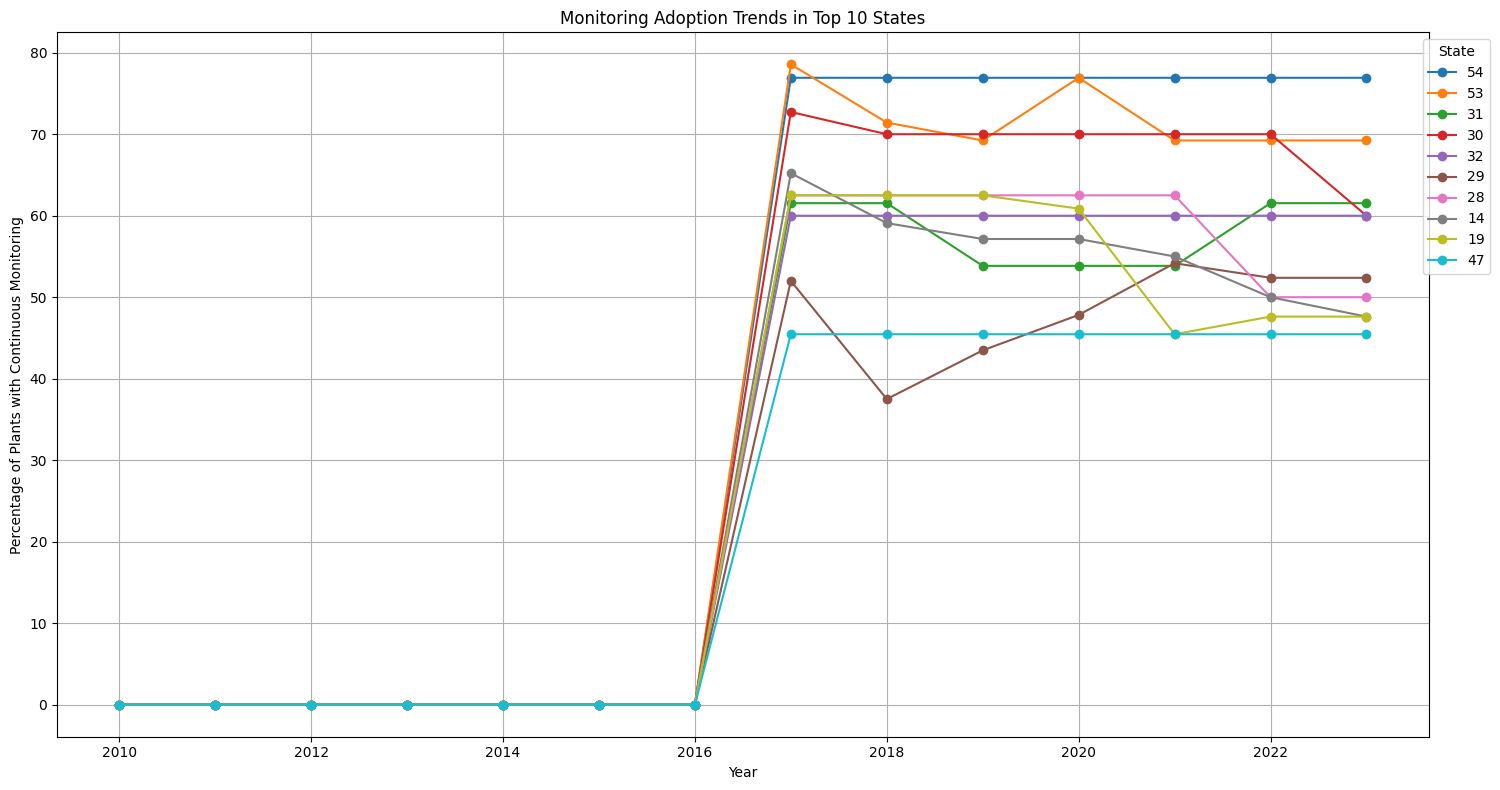

In [20]:
# Calculate yearly monitoring counts and create trend analysis
yearly_monitoring = all_power_plants.groupby(['Year', 'Monitoring_Status']).agg({
    'Facility Id': 'count'
}).reset_index()

# Pivot the data for plotting
monitoring_pivot = yearly_monitoring.pivot(
    index='Year',
    columns='Monitoring_Status',
    values='Facility Id'
).fillna(0)

# 1. Absolute numbers plot
plt.figure(figsize=(15, 8))
monitoring_pivot.plot(kind='bar', width=0.8)
plt.title('Number of Power Plants by Monitoring Status Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Continuous Monitoring')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line plot with markers
plt.figure(figsize=(15, 8))
monitoring_pivot.plot(kind='line', marker='o', markersize=8)
plt.title('Trend in Number of Power Plants by Monitoring Status')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Continuous Monitoring')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Calculate and display year-over-year changes
yoy_changes = monitoring_pivot.pct_change() * 100
plt.figure(figsize=(15, 8))
yoy_changes.plot(kind='bar', width=0.8)
plt.title('Year-over-Year Change in Number of Power Plants by Monitoring Status')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.legend(title='Continuous Monitoring')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Print detailed statistics
print("\nYearly Statistics:")
print("\nNumber of Plants:")
print(monitoring_pivot)

print("\nYear-over-Year Change (%):")
print(yoy_changes.round(2))

# 5. Calculate cumulative change from baseline
cumulative_change = ((monitoring_pivot / monitoring_pivot.iloc[0]) * 100) - 100
plt.figure(figsize=(15, 8))
cumulative_change.plot(kind='line', marker='o', markersize=8)
plt.title('Cumulative Change in Number of Power Plants by Monitoring Status (from baseline)')
plt.xlabel('Year')
plt.ylabel('Cumulative Percent Change')
plt.legend(title='Continuous Monitoring')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

# 6. Summary table with all metrics
summary_df = pd.DataFrame({
    'Total Plants': monitoring_pivot.sum(axis=1),
    'Monitored Plants': monitoring_pivot['Yes'],
    'Non-Monitored Plants': monitoring_pivot['No'],
    'Percent Monitored': (monitoring_pivot['Yes'] / monitoring_pivot.sum(axis=1) * 100).round(2),
    'YoY Change in Monitored (%)': yoy_changes['Yes'].round(2),
    'Cumulative Change in Monitored (%)': cumulative_change['Yes'].round(2)
})

print("\nComprehensive Summary:")
print(summary_df)

# 7. State-wise adoption trends
state_yearly_monitoring = all_power_plants.groupby(['State', 'Year', 'Monitoring_Status'])['Facility Id'].count().unstack(fill_value=0)
state_yearly_monitoring['Percent_Monitored'] = (state_yearly_monitoring['Yes'] /
                                              (state_yearly_monitoring['Yes'] + state_yearly_monitoring['No']) * 100)

# Plot top 10 states by current monitoring percentage
latest_year = state_yearly_monitoring.index.get_level_values('Year').max()
top_monitoring_states = state_yearly_monitoring.xs(latest_year, level='Year').nlargest(10, 'Percent_Monitored')

plt.figure(figsize=(15, 8))
for state in top_monitoring_states.index:
    state_data = state_yearly_monitoring.xs(state, level='State')['Percent_Monitored']
    plt.plot(state_data.index, state_data.values, marker='o', label=state)

plt.title('Monitoring Adoption Trends in Top 10 States')
plt.xlabel('Year')
plt.ylabel('Percentage of Plants with Continuous Monitoring')
plt.legend(title='State', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

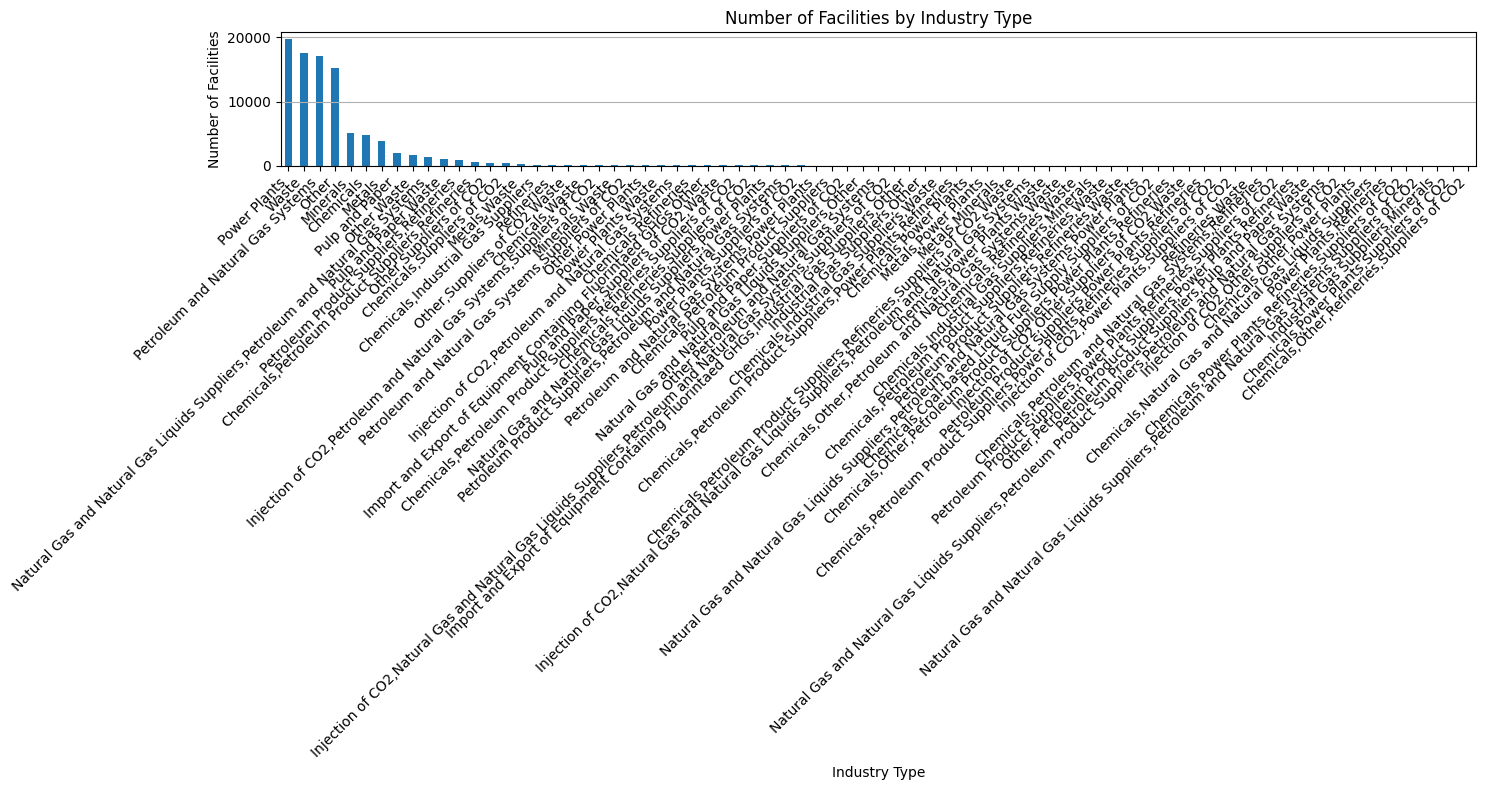

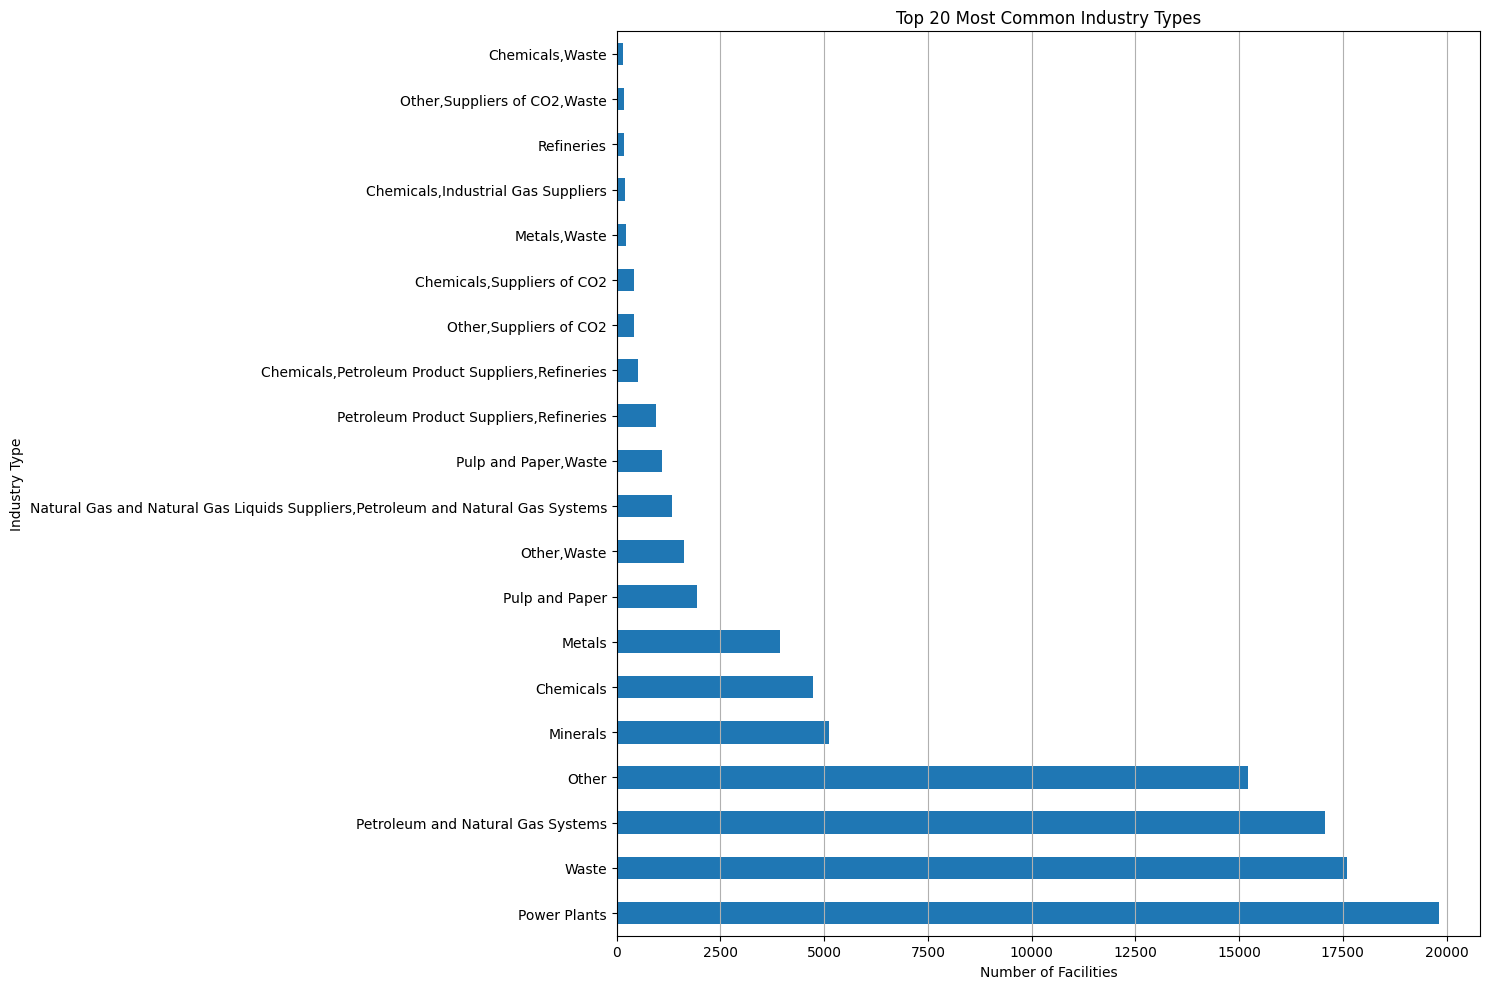

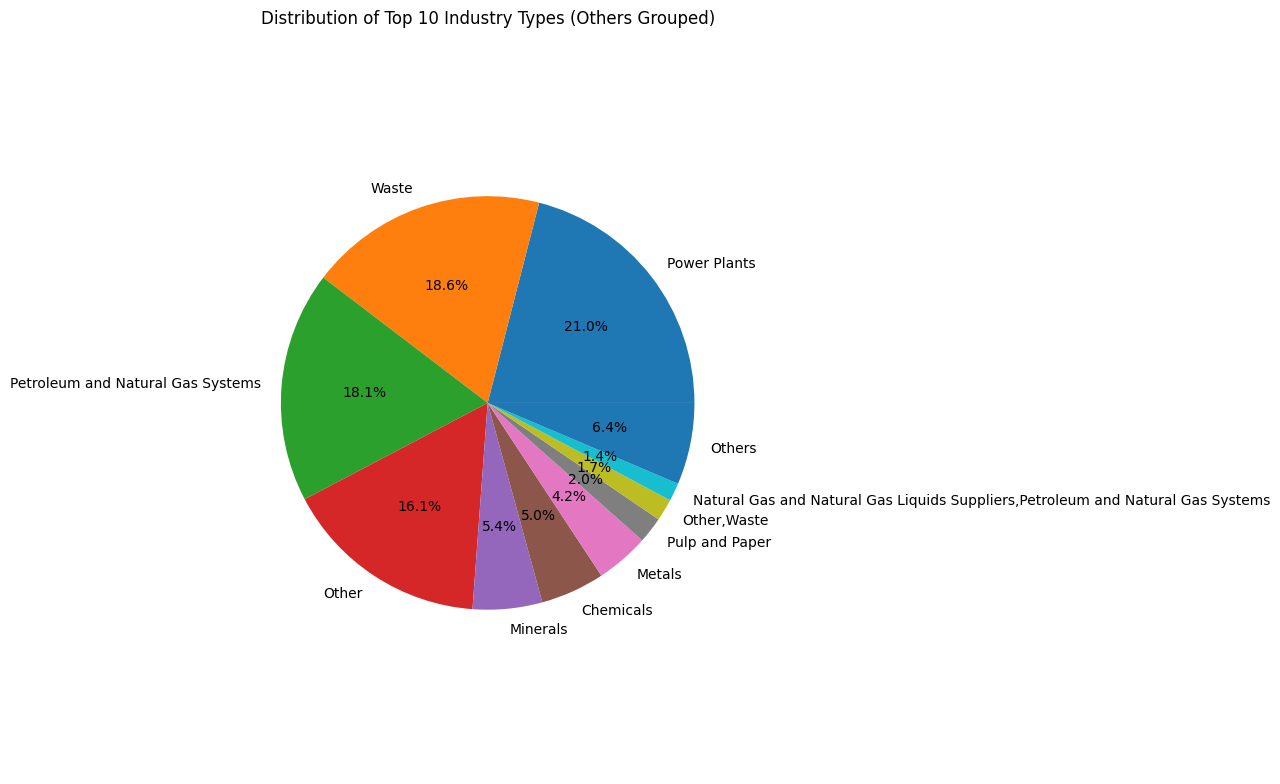


Industry Type Statistics:

Total number of unique industry types: 77

Top 20 Industry Types with Counts:
Power Plants: 19,814
Waste: 17,593
Petroleum and Natural Gas Systems: 17,062
Other: 15,210
Minerals: 5,126
Chemicals: 4,726
Metals: 3,927
Pulp and Paper: 1,934
Other,Waste: 1,624
Natural Gas and Natural Gas Liquids Suppliers,Petroleum and Natural Gas Systems: 1,335
Pulp and Paper,Waste: 1,096
Petroleum Product Suppliers,Refineries: 942
Chemicals,Petroleum Product Suppliers,Refineries: 512
Other,Suppliers of CO2: 429
Chemicals,Suppliers of CO2: 424
Metals,Waste: 223
Chemicals,Industrial Gas Suppliers: 197
Refineries: 185
Other,Suppliers of CO2,Waste: 184
Chemicals,Waste: 148

Top 20 Industry Types by Percentage:
Power Plants: 20.99%
Waste: 18.64%
Petroleum and Natural Gas Systems: 18.08%
Other: 16.12%
Minerals: 5.43%
Chemicals: 5.01%
Metals: 4.16%
Pulp and Paper: 2.05%
Other,Waste: 1.72%
Natural Gas and Natural Gas Liquids Suppliers,Petroleum and Natural Gas Systems: 1.41%
Pulp and 

<ipython-input-21-9f60b0f1b278>:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

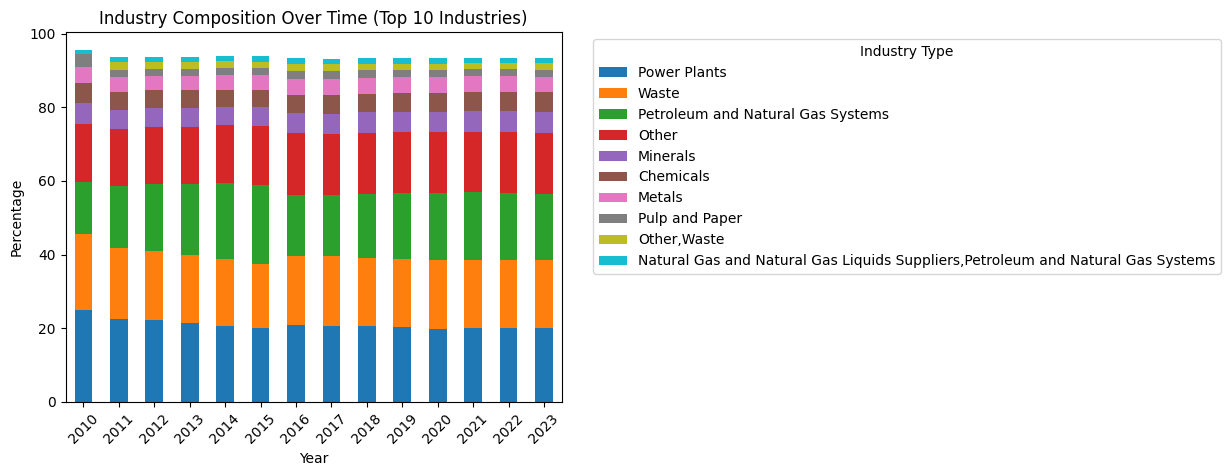


Detailed Summary of Industry Types:
                                                    Count  Percentage  \
Industry Type (sectors)                                                 
Power Plants                                        19814       20.99   
Waste                                               17593       18.64   
Petroleum and Natural Gas Systems                   17062       18.08   
Other                                               15210       16.12   
Minerals                                             5126        5.43   
Chemicals                                            4726        5.01   
Metals                                               3927        4.16   
Pulp and Paper                                       1934        2.05   
Other,Waste                                          1624        1.72   
Natural Gas and Natural Gas Liquids Suppliers,P...   1335        1.41   
Pulp and Paper,Waste                                 1096        1.16   
Petroleum Prod

In [21]:
# Get industry type counts from the original dataset
industry_counts = df_encoded['Industry Type (sectors)'].value_counts()

# 1. Simple bar plot of all industry types
plt.figure(figsize=(15, 8))
industry_counts.plot(kind='bar')
plt.title('Number of Facilities by Industry Type')
plt.xlabel('Industry Type')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Horizontal bar plot of top 20 industry types (might be more readable)
plt.figure(figsize=(15, 10))
industry_counts.head(20).plot(kind='barh')
plt.title('Top 20 Most Common Industry Types')
plt.xlabel('Number of Facilities')
plt.ylabel('Industry Type')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 3. Pie chart of top 10 industries (with others grouped)
plt.figure(figsize=(12, 8))
top_10_industries = industry_counts.head(10)
others = pd.Series({'Others': industry_counts[10:].sum()})
pie_data = pd.concat([top_10_industries, others])

plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Industry Types (Others Grouped)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 4. Print detailed statistics
print("\nIndustry Type Statistics:")
print(f"\nTotal number of unique industry types: {len(industry_counts)}")
print(f"\nTop 20 Industry Types with Counts:")
for industry, count in industry_counts.head(20).items():
    print(f"{industry}: {count:,}")

# 5. Percentage representation
industry_percentages = (industry_counts / len(df_encoded) * 100).round(2)
print(f"\nTop 20 Industry Types by Percentage:")
for industry, percentage in industry_percentages.head(20).items():
    print(f"{industry}: {percentage}%")

# 6. Stacked bar showing industry composition over time
plt.figure(figsize=(15, 8))
yearly_industry = pd.crosstab(df_encoded['Year'], df_encoded['Industry Type (sectors)'])
yearly_industry_pct = yearly_industry.div(yearly_industry.sum(axis=1), axis=0) * 100

# Select top 10 industries for clarity
top_10_industries = industry_counts.head(10).index
yearly_industry_pct[top_10_industries].plot(kind='bar', stacked=True)
plt.title('Industry Composition Over Time (Top 10 Industries)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Industry Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Create a summary DataFrame
summary_df = pd.DataFrame({
    'Count': industry_counts,
    'Percentage': industry_percentages,
    'Cumulative_Percentage': industry_percentages.cumsum()
})

print("\nDetailed Summary of Industry Types:")
print(summary_df.head(20))

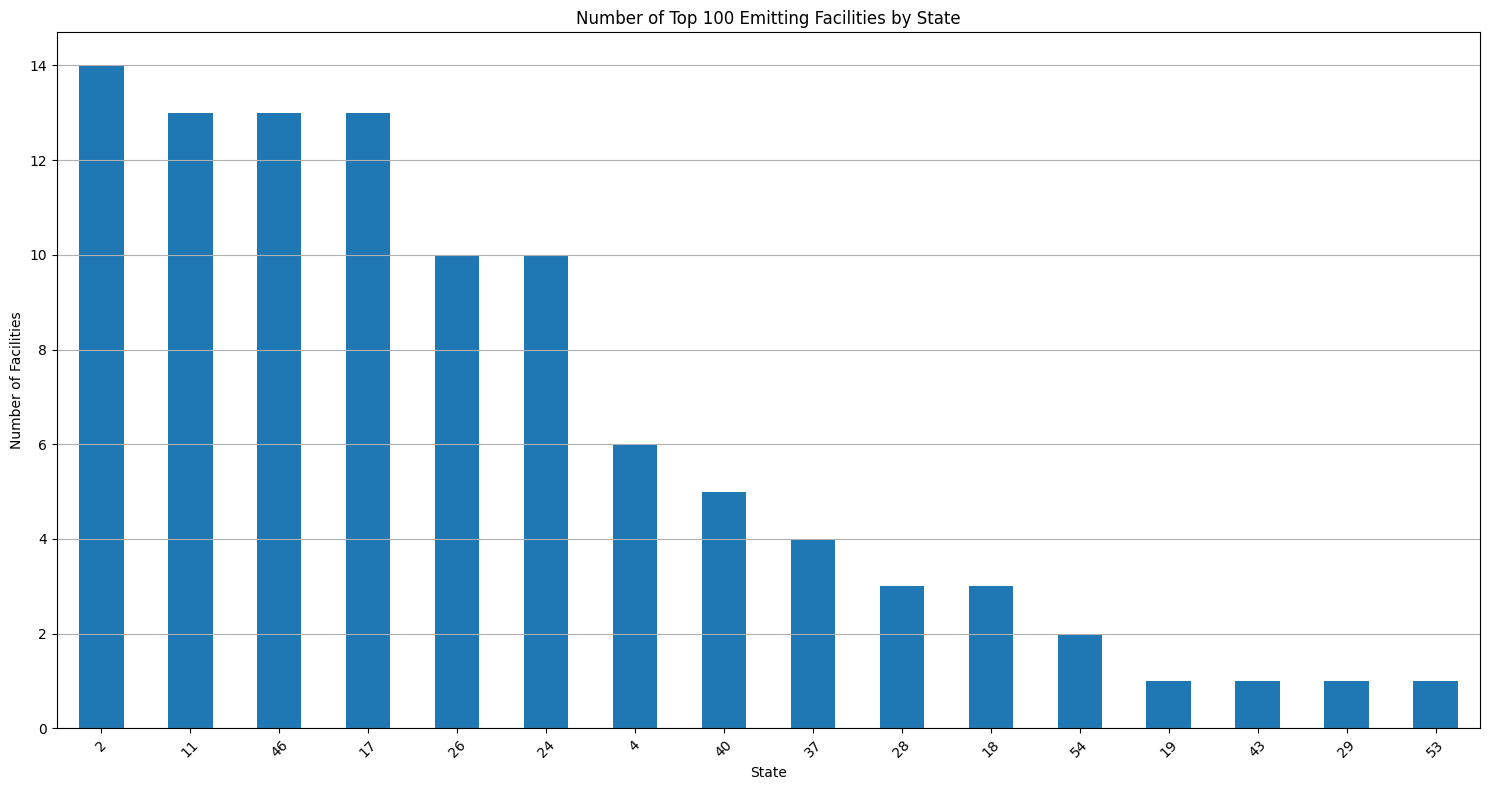

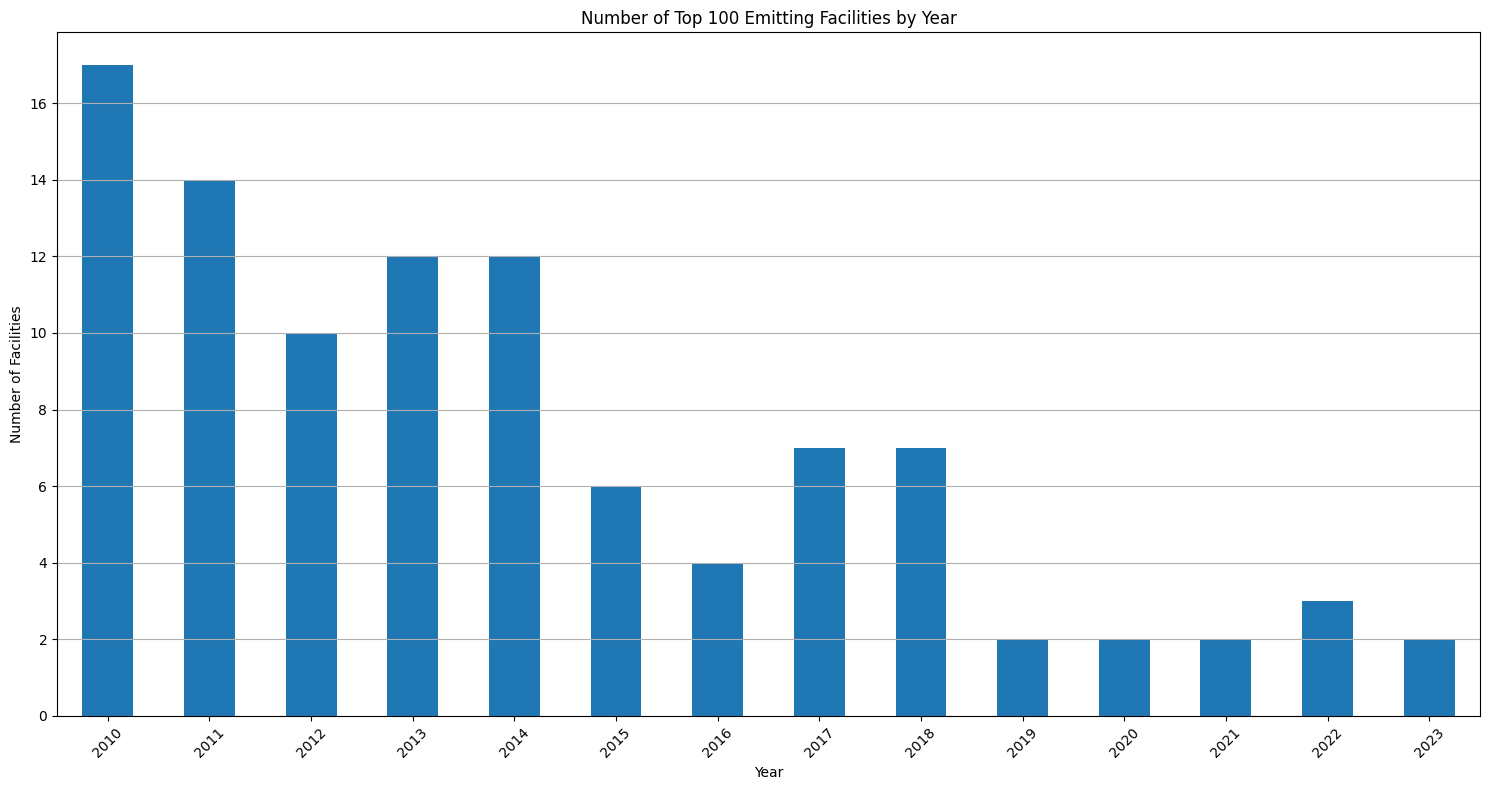

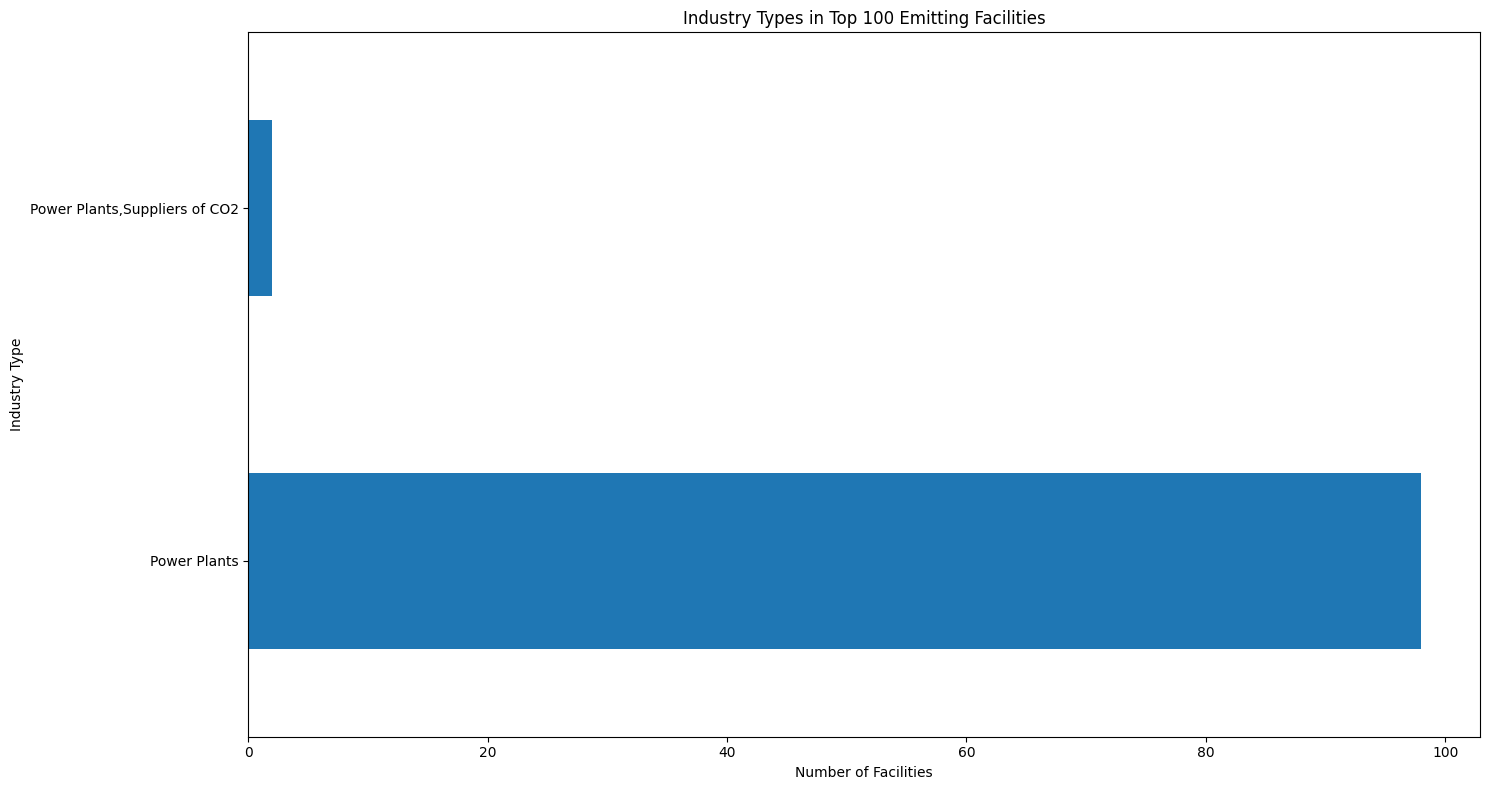


Top 100 Emitting Facilities:

Rankings by State:

11 (Total facilities in top 100: 13)
      Facility Name  Year     Emissions Industry Type (sectors) Monitoring_Status
5188        Scherer  2010  2.298500e+07            Power Plants                No
26136       Scherer  2013  2.229333e+07            Power Plants                No
11943       Scherer  2011  2.207365e+07            Power Plants                No
18976       Scherer  2012  2.181556e+07            Power Plants                No
798           Bowen  2010  2.103195e+07            Power Plants                No
33415       Scherer  2014  2.048246e+07            Power Plants                No
40682       Scherer  2015  1.799268e+07            Power Plants                No
47402       Scherer  2016  1.765699e+07            Power Plants                No
60531       Scherer  2018  1.669518e+07            Power Plants               Yes
28345         Bowen  2014  1.564227e+07            Power Plants                No
42867     

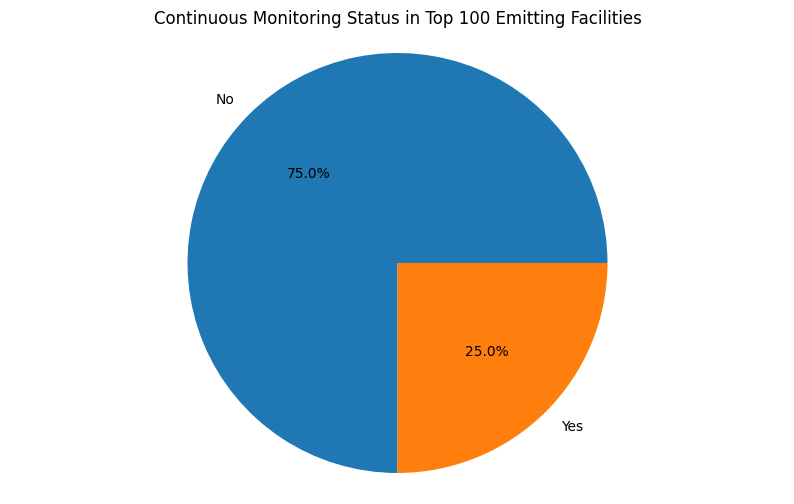

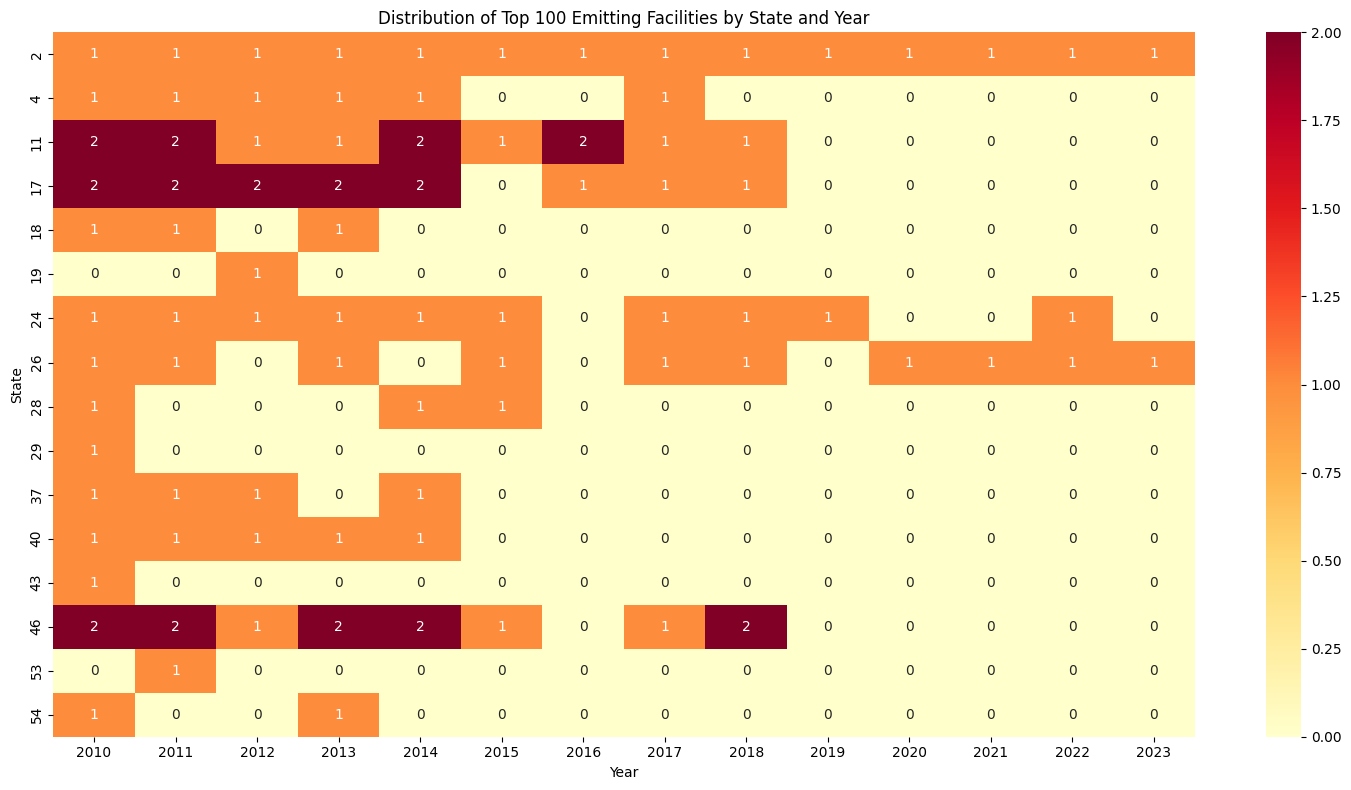

IndexError: invalid index to scalar variable.

In [23]:
# Create a dataframe with essential columns and sort by emissions
top_emitters = df_encoded[[
    'Facility Name',
    'State',
    'Year',
    'Total reported direct emissions',
    'Industry Type (sectors)',
    'City',
    'Does the facility employ continuous emissions monitoring? '
]].copy()

# Convert emissions to numeric and sort
top_emitters['Emissions'] = top_emitters['Total reported direct emissions']
top_emitters['Monitoring_Status'] = top_emitters['Does the facility employ continuous emissions monitoring? '].map({0: 'No', 1: 'Yes'})

# Get top 100 overall
top_100_overall = top_emitters.nlargest(100, 'Emissions')

# 1. Plot top 100 emissions by state
plt.figure(figsize=(15, 8))
state_counts = top_100_overall['State'].value_counts()
state_counts.plot(kind='bar')
plt.title('Number of Top 100 Emitting Facilities by State')
plt.xlabel('State')
plt.ylabel('Number of Facilities')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Plot top 100 by year
plt.figure(figsize=(15, 8))
year_counts = top_100_overall['Year'].value_counts().sort_index()
year_counts.plot(kind='bar')
plt.title('Number of Top 100 Emitting Facilities by Year')
plt.xlabel('Year')
plt.ylabel('Number of Facilities')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Industry type distribution in top 100
plt.figure(figsize=(15, 8))
industry_counts = top_100_overall['Industry Type (sectors)'].value_counts()
industry_counts.plot(kind='barh')
plt.title('Industry Types in Top 100 Emitting Facilities')
plt.xlabel('Number of Facilities')
plt.ylabel('Industry Type')
plt.tight_layout()
plt.show()

# 4. Print detailed rankings
print("\nTop 100 Emitting Facilities:")
print("\nRankings by State:")
for state in top_100_overall['State'].unique():
    state_facilities = top_100_overall[top_100_overall['State'] == state].sort_values('Emissions', ascending=False)
    print(f"\n{state} (Total facilities in top 100: {len(state_facilities)})")
    print(state_facilities[['Facility Name', 'Year', 'Emissions', 'Industry Type (sectors)', 'Monitoring_Status']].to_string())

# 5. Create summary table
summary_df = pd.DataFrame({
    'Total_Facilities': state_counts,
    'Average_Emissions': top_100_overall.groupby('State')['Emissions'].mean(),
    'Max_Emissions': top_100_overall.groupby('State')['Emissions'].max(),
    'Min_Emissions': top_100_overall.groupby('State')['Emissions'].min(),
    'Most_Common_Industry': top_100_overall.groupby('State')['Industry Type (sectors)'].agg(lambda x: x.mode().iloc[0])
})

print("\nSummary Statistics by State:")
print(summary_df)

# 6. Monitoring status in top 100
plt.figure(figsize=(10, 6))
monitoring_counts = top_100_overall['Monitoring_Status'].value_counts()
plt.pie(monitoring_counts, labels=monitoring_counts.index, autopct='%1.1f%%')
plt.title('Continuous Monitoring Status in Top 100 Emitting Facilities')
plt.axis('equal')
plt.show()

# 7. Create a heatmap of top emitters by state and year
pivot_table = pd.crosstab(top_100_overall['State'], top_100_overall['Year'])
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Distribution of Top 100 Emitting Facilities by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# 8. Export to Excel with multiple sheets
with pd.ExcelWriter('top_100_emitters_analysis.xlsx') as writer:
    # Overall rankings
    top_100_overall.sort_values('Emissions', ascending=False).to_excel(writer, sheet_name='Overall_Rankings', index=False)

    # State-wise rankings
    for state in top_100_overall['State'].unique():
        state_facilities = top_100_overall[top_100_overall['State'] == state].sort_values('Emissions', ascending=False)
        state_facilities.to_excel(writer, sheet_name=f'{state[:31]}', index=False)

    # Summary statistics
    summary_df.to_excel(writer, sheet_name='State_Summary')

print("\nDetailed analysis has been exported to 'top_100_emitters_analysis.xlsx'")

## Random Forest Modeling

In [24]:
# 1. One-hot encode Primary NAICS Code
# First create a new cell for encoding
naics_encoded = pd.get_dummies(df_encoded['Primary NAICS Code'], prefix='NAICS')

# Combine with original dataset
df_model = pd.concat([df_encoded, naics_encoded], axis=1)

# Print shape to see how many NAICS columns were created
print("Dataset shape after NAICS encoding:", df_model.shape)
print("\nNumber of unique NAICS codes:", len(naics_encoded.columns))

# Show first few NAICS columns
print("\nFirst few NAICS columns:")
print(list(naics_encoded.columns)[:5])

Dataset shape after NAICS encoding: (94378, 362)

Number of unique NAICS codes: 340

First few NAICS columns:
['NAICS_111419.0', 'NAICS_111930.0', 'NAICS_112111.0', 'NAICS_115114.0', 'NAICS_211111.0']


Reduced features from 5322 to 65
Best alpha: 10.0
Mean Squared Error: 1405948064429.22
R² Score: 0.19
Mean CV R2: 0.2169 (+/- 0.1112)


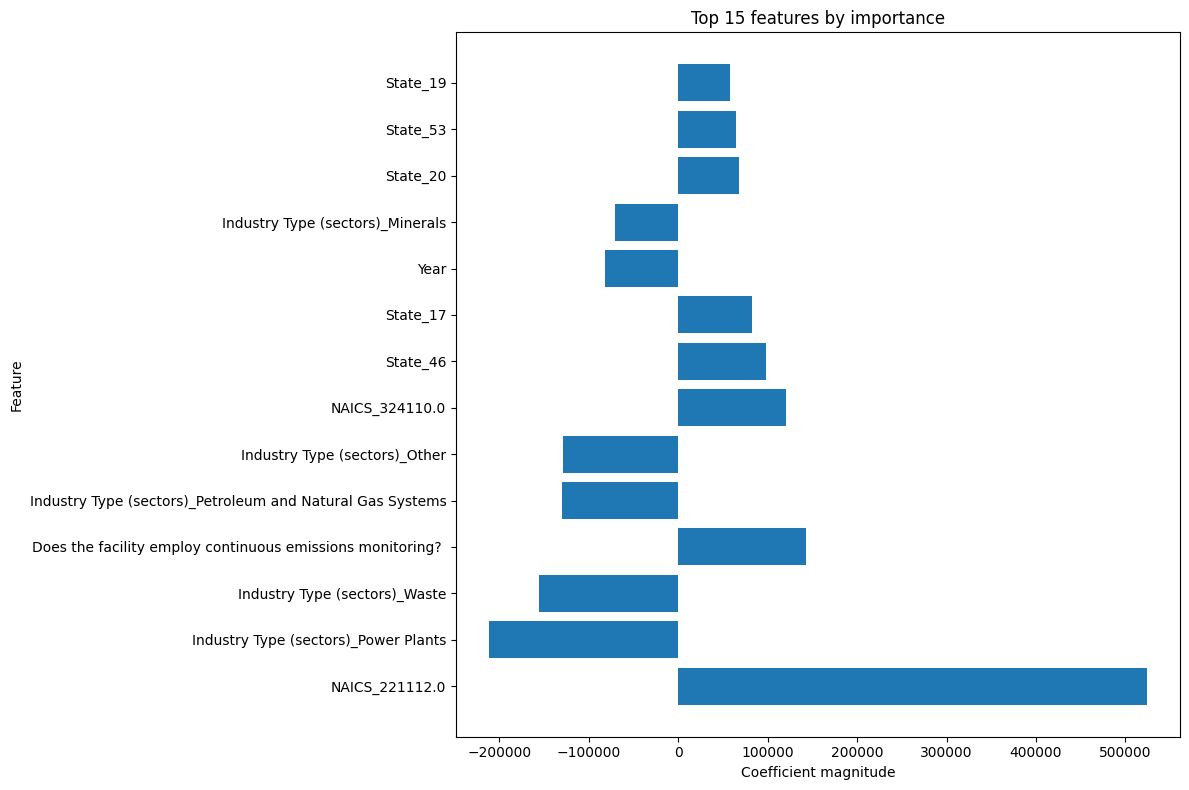

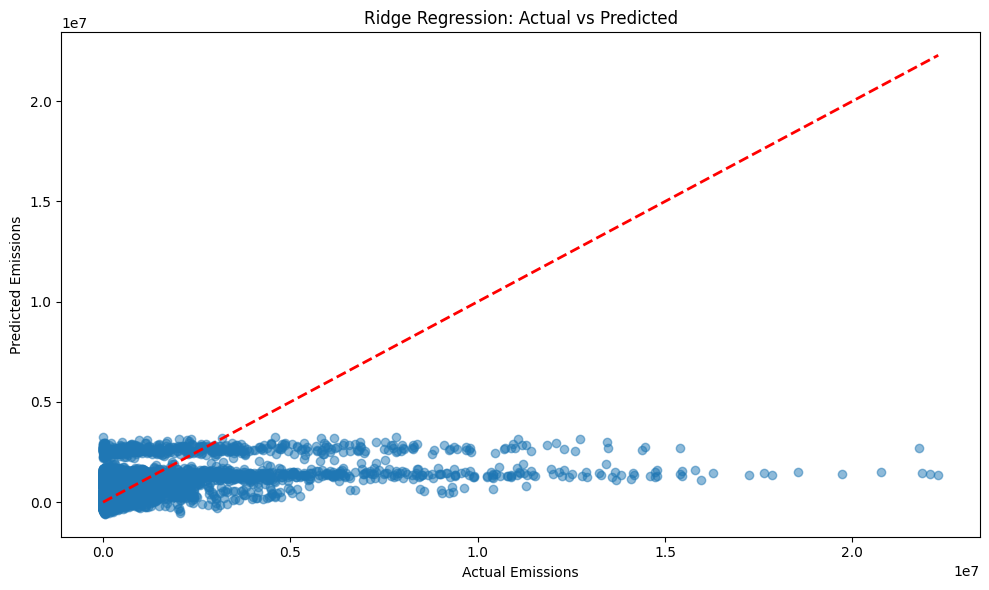


Top 10 facilities with largest prediction errors:
                   Facility Name  State Industry Type (sectors)        Actual  \
26136                    Scherer     11            Power Plants  2.229333e+07   
11943                    Scherer     11            Power Plants  2.207365e+07   
23663          James H Miller Jr      2            Power Plants  2.187070e+07   
3024           James H Miller Jr      2            Power Plants  2.075786e+07   
84479          James H Miller Jr      2            Power Plants  2.177544e+07   
45193          James H Miller Jr      2            Power Plants  1.973314e+07   
16537          James H Miller Jr      2            Power Plants  1.855696e+07   
3789                      Monroe     24            Power Plants  1.785501e+07   
8914               Gen J M Gavin     37            Power Plants  1.765511e+07   
32094  Navajo Generating Station      4            Power Plants  1.724845e+07   

          Predicted         Error  
26136  1.377612e+06  

KeyboardInterrupt: 

In [26]:
# Optimized Ridge Regression with all features but faster execution

import numpy as np
from sklearn.linear_model import RidgeCV, Ridge  # Using RidgeCV instead of GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# 1. Prepare the data with additional columns
features = ['Year', 'State', 'City', 'Industry Type (sectors)', 'Does the facility employ continuous emissions monitoring? ']
features.extend(yn_columns)
naics_columns = [col for col in df_model.columns if 'NAICS_' in col]
features.extend(naics_columns)

# Create X (features) and y (target)
X = df_model[features].copy()
y = df_model['Total reported direct emissions']

# Handle categorical features - convert to dummy variables
categorical_features = ['State', 'City', 'Industry Type (sectors)']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Remove low-variance features to reduce dimensionality
selector = VarianceThreshold(threshold=0.01)  # Remove features with low variance
X_reduced = selector.fit_transform(X)
# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print(f"Reduced features from {X.shape[1]} to {X_reduced.shape[1]}")

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Use RidgeCV instead of GridSearchCV (much faster)
alphas = np.logspace(-3, 3, 7)  # Fewer alphas to test
ridge_cv = RidgeCV(
    alphas=alphas,
    cv=3,  # Fewer CV folds
    scoring='r2'
)
ridge_cv.fit(X_train_scaled, y_train)

# Get the best alpha
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha}")

# 5. The model is already trained in RidgeCV
ridge = ridge_cv

# 6. Make predictions
y_pred = ridge.predict(X_test_scaled)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 7b. Calculate cross-validation scores
ridge_cv_scores = cross_val_score(
    ridge, X_reduced, y, cv=3, scoring='r2'  # Fewer CV folds
)
print(f"Mean CV R2: {ridge_cv_scores.mean():.4f} (+/- {ridge_cv_scores.std() * 2:.4f})")

# 8. Feature importance - need to map back to original feature names
coef = ridge.coef_
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coef
})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
top_features = coef_df.head(15)
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient magnitude')
plt.ylabel('Feature')
plt.title('Top 15 features by importance')
plt.tight_layout()
plt.show()


# 9. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Ridge Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()

# 10. Analyze prediction errors
errors = y_test - y_pred
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors,
    'Abs_Error': np.abs(errors)
})

# Join with original data to see which types of facilities have largest errors
test_indices = y_test.index
error_analysis = pd.merge(
    error_df,
    df_model.loc[test_indices, ['Facility Name', 'State', 'Industry Type (sectors)', 'Total reported direct emissions']],
    left_index=True,
    right_index=True
)

# Show top 10 facilities with largest absolute errors
print("\nTop 10 facilities with largest prediction errors:")
print(error_analysis.sort_values('Abs_Error', ascending=False).head(10)[
    ['Facility Name', 'State', 'Industry Type (sectors)', 'Actual', 'Predicted', 'Error']
])

# 11. Learning curves to check for overfitting
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    Ridge(alpha=best_alpha),
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('R² Score')
plt.title('Ridge Regression Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 12. Analyze performance by industry sector
industry_performance = error_analysis.groupby('Industry Type (sectors)').agg({
    'Error': ['mean', 'std'],
    'Abs_Error': 'mean',
    'Actual': 'count'
}).sort_values(('Abs_Error', 'mean'), ascending=False)

print("\nPrediction performance by industry sector:")
print(industry_performance.head(10))

# 13. Visualize errors by industry sector (top 10 by count)
top_industries = error_analysis['Industry Type (sectors)'].value_counts().nlargest(10).index
industry_errors = error_analysis[error_analysis['Industry Type (sectors)'].isin(top_industries)]

plt.figure(figsize=(12, 8))
import seaborn as sns
sns.boxplot(x='Industry Type (sectors)', y='Error', data=industry_errors)
plt.xticks(rotation=45, ha='right')
plt.title('Prediction Errors by Industry Sector')
plt.tight_layout()
plt.show()

Min value in target: -1196.25
Number of zeros in target: 498
Number of negative values in target: 1
Removed 499 rows with zero or negative emissions
Best alpha: 10.0
Mean Squared Error: 1615656097296.58
R² Score: 0.05


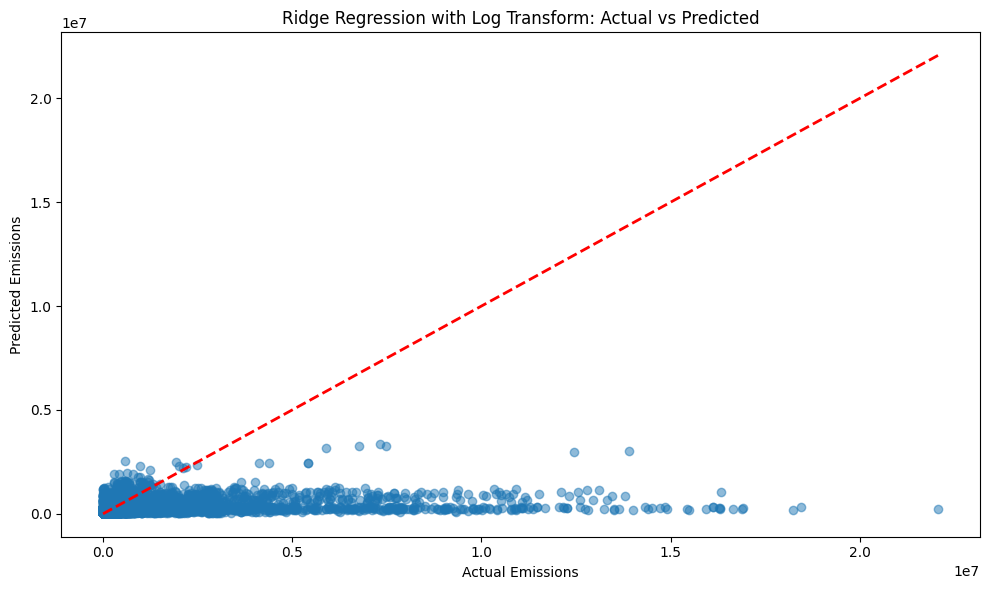

In [28]:
# Log-transform Ridge Regression with NaN handling
import numpy as np
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# First, check for zeros or negative values in the target
print(f"Min value in target: {y.min()}")
print(f"Number of zeros in target: {(y == 0).sum()}")
print(f"Number of negative values in target: {(y < 0).sum()}")

# Filter out rows with zero or negative emissions
valid_indices = y > 0
X_filtered = X_reduced[valid_indices]
y_filtered = y[valid_indices]

print(f"Removed {len(y) - len(y_filtered)} rows with zero or negative emissions")

# Now apply log transform
y_log = np.log(y_filtered)  # Simple log is safe now

# Split the data
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_filtered, y_log, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RidgeCV for faster cross-validation
alphas = np.logspace(-3, 3, 7)  # Fewer alphas for speed
ridge_cv = RidgeCV(
    alphas=alphas,
    cv=3,  # Fewer folds for speed
    scoring='r2'
)
ridge_cv.fit(X_train_scaled, y_train_log)

# Get best alpha
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Make predictions (in log space)
y_pred_log = ridge_cv.predict(X_test_scaled)

# Transform back to original scale
y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test_log)  # Convert test data back too

# Evaluate on original scale
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted on original scale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Ridge Regression with Log Transform: Actual vs Predicted')
plt.tight_layout()
plt.show()

In [6]:
# Gradient Boosting Regression - Complete standalone implementation
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. One-hot encode Primary NAICS Code
# First create a new cell for encoding
naics_encoded = pd.get_dummies(df_encoded['Primary NAICS Code'], prefix='NAICS')

# Combine with original dataset
df_model = pd.concat([df_encoded, naics_encoded], axis=1)

# Create model dataframe
df_model = df.copy()

# 1. Identify yes/no columns (columns with Y/N values)
yn_columns = []
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        unique_vals = df_model[col].dropna().unique()
        if set(unique_vals).issubset({'Y', 'N', 'y', 'n', 'Yes', 'No'}):
            yn_columns.append(col)
            # Convert to binary
            df_model[col] = df_model[col].map({'Y': 1, 'y': 1, 'Yes': 1, 'N': 0, 'n': 0, 'No': 0})

print(f"Found {len(yn_columns)} yes/no columns")

# 2. Create NAICS code dummies (if not already done)
if 'Primary NAICS Code' in df_model.columns:
    # Extract first 3 digits of NAICS code for broader categories
    df_model['NAICS_3digit'] = df_model['Primary NAICS Code'].astype(str).str[:3]
    naics_dummies = pd.get_dummies(df_model['NAICS_3digit'], prefix='NAICS')
    df_model = pd.concat([df_model, naics_dummies], axis=1)
    naics_columns = naics_dummies.columns.tolist()
else:
    # If NAICS dummies already exist
    naics_columns = [col for col in df_model.columns if 'NAICS_' in col]

# 3. Prepare features
features = []

# Add basic features if they exist
basic_features = ['State', 'City', 'Industry Type (sectors)']
for feature in basic_features:
    if feature in df_model.columns:
        features.append(feature)

# Add yes/no columns
features.extend(yn_columns)

# Add NAICS columns
features.extend(naics_columns)

print(f"Using {len(features)} features")

# 4. Create X (features) and y (target)
X = df_model[features].copy()
y = df_model['Total reported direct emissions']

# 5. Handle categorical features - convert to dummy variables
categorical_features = [f for f in ['State', 'City', 'Industry Type (sectors)'] if f in X.columns]
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# 6. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train Gradient Boosting model
print("Training Gradient Boosting model...")
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,  # Use 80% of samples for each tree (faster)
    random_state=42
)
gbr.fit(X_train_scaled, y_train)

# 9. Make predictions
y_pred = gbr.predict(X_test_scaled)

# 10. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 11. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.tight_layout()
plt.show()

# 12. Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbr.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot top 15 features by importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 features by importance in Gradient Boosting')
plt.tight_layout()
plt.show()

NameError: name 'df_encoded' is not defined